In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time as tm
import uproot
%matplotlib widget

    # tic-toc functions for timing
def tic():
    # Initialize clock for timing
    global startTime_for_tictoc
    startTime_for_tictoc = tm.perf_counter_ns()
    return

def toc():
    # report time since last tic() initialization in seconds
    if 'startTime_for_tictoc' in globals():
        global most_recent_toc
        if most_recent_toc > startTime_for_tictoc: print("Toc Warning: Tic not reset.",end="  ")
        most_recent_toc = tm.perf_counter_ns()
        print (f"Elapsed time is {(tm.perf_counter_ns() - startTime_for_tictoc)*1e-9:.3f} seconds.")
    else:
        print ("Toc Error: start time not set")
    return

def tocms():
    # report time since last tic() initialization in ms
    if 'startTime_for_tictoc' in globals():
        global most_recent_toc
        if most_recent_toc > startTime_for_tictoc: print("Toc Warning: Tic not reset.",end="  ")
        most_recent_toc = tm.perf_counter_ns()
        print (f"Elapsed time is {(tm.perf_counter_ns() - startTime_for_tictoc)*1e-6:.3f} milliseconds.")
    else:
        print ("Toc Error: start time not set")
    return
global most_recent_toc
most_recent_toc = -666


## Initial Tests

In [ ]:
tic()
inputfile=uproot.open("CW_empty_1.root")

#opticalpowers = inputfile[inputfile.keys()[-1]].a
opticalpowers_e1 = np.array([])
labels_e1 = []
ADCcounts_e1 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_e1 = []
means_e1 = np.array([])
stdevs_e1 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_e1 = np.append(opticalpowers_e1, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_e1 = np.append(opticalpowers_e1, float(inputfile[key].title[-10:-5]))
    labels_e1.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_e1.append(inputfile[key].values())
    means_e1 = np.append(means_e1, sum(Probabilities_e1[-1]*ADCcounts_e1))
    stdevs_e1 = np.append(stdevs_e1, np.sqrt(sum(Probabilities_e1[-1]*(ADCcounts_e1-means_e1[-1])**2)))
    
    print("mean: ",means_e1[-1], ", st.dev: ",stdevs_e1[-1])
tocms()

In [ ]:
plt.close()
fig,ax = plt.subplots(1,1,figsize=(12,7.25))

ax.set_title("340 nm LED, Empty REFLECT", size=16)
ax.set_xlabel("ADC counts / 4 ns", size=12)
ax.set_ylabel("Probability", size=12)

myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

for graphnum in range(len(Probabilities_e1)):
    ax.errorbar(ADCcounts_e1, Probabilities_e1[graphnum], #yerr=DarkWarmData[:,2]*2,
                fmt='--', linewidth=1, elinewidth=2, label=labels_e1[graphnum], color=myrainbow[graphnum%6])

ax.legend(loc='upper right')
ax.set_xlim(0,800)
plt.grid()
plt.show()

In [ ]:
inputfile=uproot.open("CW_blackfoil.root")

opticalpowers_b = np.array([])
labels_b = []
ADCcounts_b = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_b = []
means_b = []
stdevs_b = []
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_b = np.append(opticalpowers_b, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_b = np.append(opticalpowers_b, float(inputfile[key].title[-10:-5]))
    labels_b.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_b.append(inputfile[key].values())
    
    means_b.append(sum(Probabilities_b[-1]*ADCcounts_b))
    stdevs_b.append(np.sqrt(sum(Probabilities_b[-1]*(ADCcounts_b-means_b[-1])**2)))
    
    print("mean: ",means_b[-1], ", st.dev: ",stdevs_b[-1])

In [ ]:
plt.close()
fig,ax = plt.subplots(1,1,figsize=(12,7.25))

ax.set_title("340 nm LED, REFLECT with black foil", size=16)
ax.set_xlabel("ADC counts / 4 ns", size=12)
ax.set_ylabel("Probability", size=12)

myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

for graphnum in range(len(Probabilities_b)):
    ax.errorbar(ADCcounts_b, Probabilities_b[graphnum], #yerr=DarkWarmData[:,2]*2,
                fmt='--', linewidth=1, elinewidth=2, label=labels_b[graphnum], color=myrainbow[graphnum%6])

ax.legend(loc='upper right')
ax.set_xlim(0,800)
plt.grid()
plt.show()

In [ ]:
inputfile=uproot.open("CW_empty_2.root")

opticalpowers_e2 = np.array([])
labels_e2 = []
ADCcounts_e2 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_e2 = []
means_e2 = []
stdevs_e2 = []
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_e2 = np.append(opticalpowers_e2, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_e2 = np.append(opticalpowers_e2, float(inputfile[key].title[-10:-5]))
    labels_e2.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_e2.append(inputfile[key].values())
    
    means_e2.append(sum(Probabilities_e2[-1]*ADCcounts_e2))
    stdevs_e2.append(np.sqrt(sum(Probabilities_e2[-1]*(ADCcounts_e2-means_e2[-1])**2)))

In [ ]:
plt.close()
fig,ax = plt.subplots(1,1,figsize=(12,7.25))

ax.set_title("340 nm LED, Empty REFLECT (day 2)", size=16)
ax.set_xlabel("ADC counts / 4 ns", size=12)
ax.set_ylabel("Probability", size=12)

myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

for graphnum in range(len(Probabilities_e2)):
    ax.errorbar(ADCcounts_e2, Probabilities_e2[graphnum], #yerr=DarkWarmData[:,2]*2,
                fmt='--', linewidth=1, elinewidth=2, label=labels_e2[graphnum], color=myrainbow[graphnum%6])

ax.legend(loc=(0.75,0.25))
ax.set_xlim(0,800)
plt.grid()
plt.show()

In [ ]:
tic()
inputfile=uproot.open("DM searches/REFLECT/CW_empty_3.root")
verbose = False
opticalpowers_e3 = np.array([])
labels_e3 = []
ADCcounts_e3 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_e3 = []
means_e3 = np.array([])
stdevs_e3 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_e3 = np.append(opticalpowers_e3, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_e3 = np.append(opticalpowers_e3, float(inputfile[key].title[-10:-5]))
    labels_e3.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_e3.append(inputfile[key].values())
    means_e3 = np.append(means_e3, sum(Probabilities_e3[-1]*ADCcounts_e3))
    stdevs_e3 = np.append(stdevs_e3, np.sqrt(sum(Probabilities_e3[-1]*(ADCcounts_e3-means_e3[-1])**2)))
    
    if (verbose): print("mean: ",means_e3[-1], ", st.dev: ",stdevs_e3[-1])
tocms()

plt.close()
fig,ax = plt.subplots(1,1,figsize=(12,7.25))

ax.set_title("340 nm LED, Empty REFLECT, Empty", size=16)
ax.set_xlabel("ADC counts / 4 ns", size=12)
ax.set_ylabel("Probability", size=12)

myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

for graphnum in range(len(Probabilities_e3)):
    ax.errorbar(ADCcounts_e3, Probabilities_e3[graphnum], #yerr=DarkWarmData[:,2]*2,
                fmt='--', linewidth=1, elinewidth=2, label=labels_e3[graphnum], color=myrainbow[graphnum%6])

ax.legend(loc='upper right')
ax.set_xlim(0,1000)
plt.grid()
plt.show()

In [ ]:
tic()
inputfile=uproot.open("CW_empty_4.root")
verbose = False
opticalpowers_e4 = np.array([])
labels_e4 = []
ADCcounts_e4 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_e4 = []
means_e4 = np.array([])
stdevs_e4 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_e4 = np.append(opticalpowers_e4, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_e4 = np.append(opticalpowers_e4, float(inputfile[key].title[-10:-5]))
    labels_e4.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_e4.append(inputfile[key].values())
    means_e4 = np.append(means_e4, sum(Probabilities_e4[-1]*ADCcounts_e4))
    stdevs_e4 = np.append(stdevs_e4, np.sqrt(sum(Probabilities_e4[-1]*(ADCcounts_e4-means_e4[-1])**2)))
    
    if (verbose): print("mean: ",means_e4[-1], ", st.dev: ",stdevs_e4[-1])
tocms()

plt.close()
fig,ax = plt.subplots(1,1,figsize=(12,7.25))

ax.set_title("340 nm LED, Empty REFLECT, Empty", size=16)
ax.set_xlabel("ADC counts / 4 ns", size=12)
ax.set_ylabel("Probability", size=12)

myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

for graphnum in range(len(Probabilities_e4)):
    ax.errorbar(ADCcounts_e4, Probabilities_e4[graphnum], #yerr=DarkWarmData[:,2]*2,
                fmt='--', linewidth=1, elinewidth=2, label=labels_e4[graphnum], color=myrainbow[graphnum%6])

ax.legend(loc='upper right')
ax.set_xlim(0,1000)
plt.grid()
plt.show()

In [ ]:
opticalpowers_bnew = np.array([-666.0]*len(opticalpowers_b))
means_bnew = np.array([-666.0]*len(opticalpowers_b))
stdevs_bnew = np.array([-666.0]*len(opticalpowers_b))
for i in range(len(opticalpowers_b)):
    if (i<9):
        opticalpowers_bnew[i] = opticalpowers_b[i]
        means_bnew[i] = means_b[i]
        stdevs_bnew[i] = stdevs_b[i]
    elif (i == 9):
        opticalpowers_bnew[i] = opticalpowers_b[-1]
        means_bnew[i] = means_b[-1]
        stdevs_bnew[i] = stdevs_b[-1]
    else:
        opticalpowers_bnew[i] = opticalpowers_b[i-1]
        means_bnew[i] = means_b[i-1]
        stdevs_bnew[i] = stdevs_b[i-1]
opticalpowers_bnew,means_bnew,stdevs_bnew

In [ ]:
plt.close()
fig,ax = plt.subplots(1,1,figsize=(12,7.25))

ax.set_title("REFLECT Calibration Test, 340 nm LED", size=16)
ax.set_xlabel("LED Drive Current (mA)", size=12)
ax.set_ylabel("SiPM Average Intensity", size=12)

myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

xshift = 1

#ax.errorbar(opticalpowers_e1+0*xshift, means_e1, yerr=stdevs_e1,
#            fmt='--', linewidth=1, elinewidth=2, label="Bare PTFE", color="red")
ax.errorbar(opticalpowers_e2+1*xshift, means_e2, yerr=stdevs_e2,
            fmt='--', linewidth=1, elinewidth=2, label="Bare PTFE", color="steelblue")
#ax.errorbar(opticalpowers_e3-1*xshift, means_e3, yerr=stdevs_e3,
#            fmt='--', linewidth=1, elinewidth=2, label="Empty, day 3?", color="gold")
ax.errorbar(opticalpowers_e4+2*xshift, means_e4, yerr=stdevs_e4,
            fmt='--', linewidth=1, elinewidth=2, label="Stability Check", color="cornflowerblue")
ax.errorbar(opticalpowers_bnew+2*xshift, means_bnew, yerr=stdevs_bnew,
            fmt='--', linewidth=1, elinewidth=2, label="Black foil absorber", color="darkblue")

ax.legend(loc='upper left')
#ax.set_xlim(0,800)
plt.grid()
plt.show()

## Fiber Position Tests

In [21]:
plt.close()
fig,ax = plt.subplots(1,1,figsize=(12,7.25))

ax.set_title("REFLECT sample tests, 340 nm LED", size=16)
ax.set_xlabel("LED Drive Current (mA)", size=12)
ax.set_ylabel("ADC Count Average / 4 ns (counts)", size=12)

myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

xshift = 0.5
#inputfilenames =  ["CW_empty_4.root", "CW_empty_1.root" ,"fiberpos_0cm.root","fiberpos_0cm_2.root","fiberpos_1cm.root","fiberpos_1cm_2.root","fiberpos_2cm.root","fiberpos_3cm.root","fiberpos_4cm.root","fiberpos_4cm_2.root","fiberpos_5cm.root","fiberpos_5cm_2.root"]
#inputfilelabels = ["Bare PTFE, day 4","Bare PTFE, day 1","0 cm"             ,"0 cm take 2"        ,"1 cm"             ,"1 cm take 2"        ,"2 cm"             ,"3 cm"             ,"4 cm"             ,"4 cm take 2"        ,"5 cm"             ,"5 cm take 2"        ]

ax.errorbar(optical_powers[2]-3*xshift, means[2], yerr=stdevs[2],
            fmt='--', linewidth=1, elinewidth=2, label=inputfilelabels[2], color="red")
ax.errorbar(optical_powers[3]-2*xshift, means[3], yerr=stdevs[3],
            fmt='--', linewidth=1, elinewidth=2, label=inputfilelabels[3], color="red")
ax.errorbar(optical_powers[4]+0*xshift, means[4], yerr=stdevs[4],
            fmt='--', linewidth=1, elinewidth=2, label=inputfilelabels[4], color="orange")
ax.errorbar(optical_powers[5]-1*xshift, means[5], yerr=stdevs[5],
            fmt='--', linewidth=1, elinewidth=2, label=inputfilelabels[5], color="orange")
ax.errorbar(optical_powers[6]+0*xshift, means[6], yerr=stdevs[6],
            fmt='--', linewidth=1, elinewidth=2, label=inputfilelabels[6], color="gold")
ax.errorbar(optical_powers[7]+1*xshift, means[7], yerr=stdevs[7],
            fmt='--', linewidth=1, elinewidth=2, label=inputfilelabels[7], color="green")
ax.errorbar(optical_powers[8]+2*xshift, means[8], yerr=stdevs[8],
            fmt='--', linewidth=1, elinewidth=2, label=inputfilelabels[8], color="darkblue")
ax.errorbar(optical_powers[9]+3*xshift, means[9], yerr=stdevs[9],
            fmt='--', linewidth=1, elinewidth=2, label=inputfilelabels[9], color="darkblue")
ax.errorbar(optical_powers[10]+4*xshift, means[10], yerr=stdevs[10],
            fmt='--', linewidth=1, elinewidth=2, label=inputfilelabels[10], color="purple")
ax.errorbar(optical_powers[11]+4*xshift, means[11], yerr=stdevs[11],
            fmt='--', linewidth=1, elinewidth=2, label=inputfilelabels[11], color="purple")

ax.errorbar(optical_powers[0]+0*xshift, means[0], yerr=stdevs[0],
            fmt='--', linewidth=3, elinewidth=2, label=inputfilelabels[0], color="black")
ax.errorbar(optical_powers[1]-1*xshift, means[1], yerr=stdevs[1],
            fmt='--', linewidth=3, elinewidth=2, label=inputfilelabels[1], color="black")

ax.legend(loc='upper left')
#ax.set_xlim(0,800)
plt.grid()
plt.show()

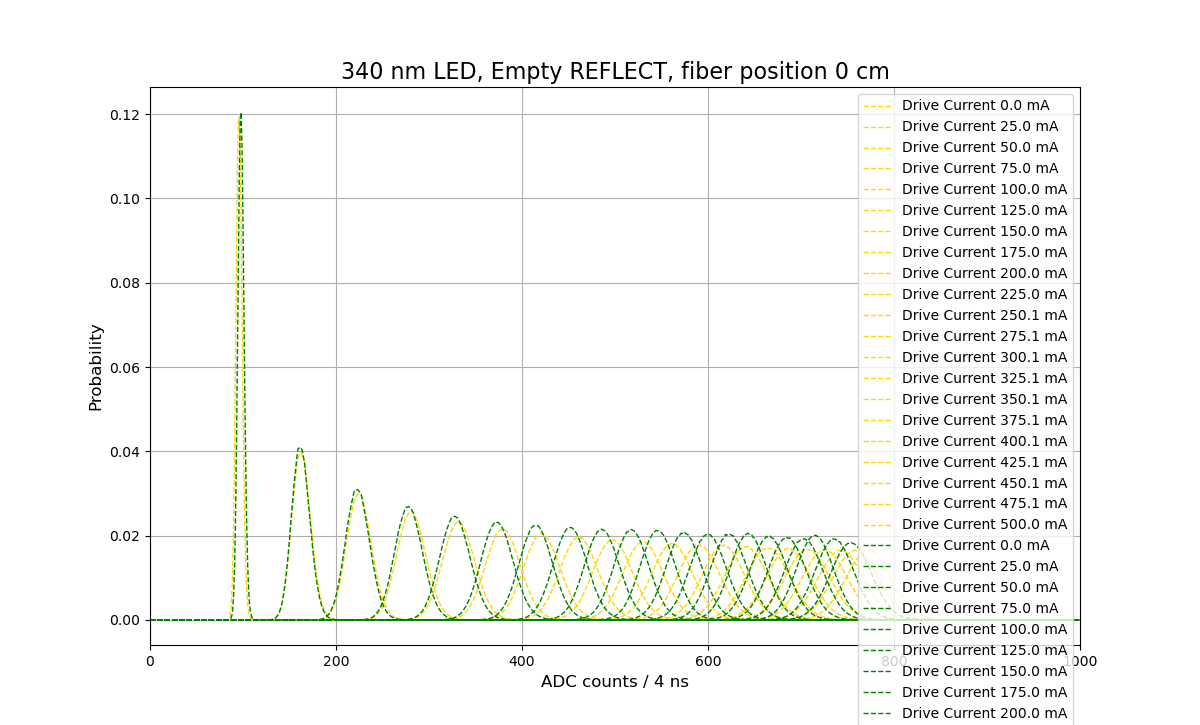

In [17]:
plt.close()
fig,ax = plt.subplots(1,1,figsize=(12,7.25))

ax.set_title("340 nm LED, Empty REFLECT, fiber position 0 cm", size=16)
ax.set_xlabel("ADC counts / 4 ns", size=12)
ax.set_ylabel("Probability", size=12)

myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]
'''
for graphnum in range(len(Probabilities_0cm)):
    ax.errorbar(ADCcounts_0cm, Probabilities_0cm[graphnum], #yerr=DarkWarmData[:,2]*2,
                fmt='--', linewidth=1, elinewidth=2, color=myrainbow[0])
    
for graphnum in range(len(Probabilities_0cm_2)):
    ax.errorbar(ADCcounts_0cm_2, Probabilities_0cm_2[graphnum], #yerr=DarkWarmData[:,2]*2,
                fmt='--', linewidth=1, elinewidth=2, color=myrainbow[0])
   
for graphnum in range(len(Probabilities_1cm)):
    ax.errorbar(ADCcounts_1cm, Probabilities_1cm[graphnum], #yerr=DarkWarmData[:,2]*2,
                fmt='--', linewidth=1, elinewidth=2, label=labels_1cm[graphnum], color=myrainbow[0])
    '''
mytestnumbers = [2,3] #4,5
for test in mytestnumbers:
    for graphnum in range(len(Probabilities[test])):
        ax.errorbar(ADCcounts[test], Probabilities[test][graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=optical_labels[test][graphnum], color=myrainbow[test%6])

ax.legend(loc='upper right')
ax.set_xlim(0,1000)
plt.grid()
plt.show()

In [18]:
inputfilenames =  ["CW_empty_4.root", "CW_empty_1.root" ,"fiberpos_0cm.root","fiberpos_0cm_2.root","fiberpos_1cm.root","fiberpos_1cm_2.root","fiberpos_2cm.root","fiberpos_3cm.root","fiberpos_4cm.root","fiberpos_4cm_2.root","fiberpos_5cm.root","fiberpos_5cm_2.root"]
inputfilelabels = ["Bare PTFE, day 4","Bare PTFE, day 1","0 cm"             ,"0 cm take 2"        ,"1 cm"             ,"1 cm take 2"        ,"2 cm"             ,"3 cm"             ,"4 cm"             ,"4 cm take 2"        ,"5 cm"             ,"5 cm take 2"        ]

In [12]:
optical_powers = [-666]*len(inputfilenames)
optical_labels = [-666]*len(inputfilenames)
ADCcounts      = [-666]*len(inputfilenames)
Probabilities  = [-666]*len(inputfilenames)
means          = [-666]*len(inputfilenames)
stdevs         = [-666]*len(inputfilenames)

verbose = False
for i,file in enumerate(inputfilenames):
    print(f"Loading data from {file}...")
    tic()
    inputfile=uproot.open(file)
    optical_powers[i] = np.array([-666.0]*len(inputfile.keys()[1:-1]))
    optical_labels[i] = [-666]*len(inputfile.keys()[1:-1])
    ADCcounts[i] = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
    Probabilities[i] = [-666]*len(inputfile.keys()[1:-1])
    means[i] = np.array([-666.0]*len(inputfile.keys()[1:-1]))
    stdevs[i] = np.array([-666.0]*len(inputfile.keys()[1:-1]))
    
    for j,key in enumerate(inputfile.keys()[1:-1]):
        #print(inputfile[key].title[-10:-5])
        if j==0: optical_powers[i][j] = float(inputfile[key].title[-8:-5])
        else: optical_powers[i][j] = float(inputfile[key].title[-10:-5])
        optical_labels[i][j] = inputfile[key].title[19:-5]+" mA"
        Probabilities[i][j] = inputfile[key].values()
        means[i][j] = sum(Probabilities[i][j]*ADCcounts[i])
        stdevs[i][j] = np.sqrt(sum(Probabilities[i][j]*(ADCcounts[i]-means[i][j])**2))

        if (verbose): print("mean: ",means[i][j], ", st.dev: ",stdevs[i][j])
    if (verbose): 
        print("")
        plt.clf()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title(f"340 nm LED, {inputfilelabels[i]}", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities[i])):
            ax.errorbar(ADCcounts[i], Probabilities[i][graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=optical_labels[i][graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1000)
        plt.grid()
        plt.show()
    tocms()

Loading data from CW_empty_4.root...
Elapsed time is 49.316 milliseconds.
Loading data from CW_empty_1.root...
Elapsed time is 38.213 milliseconds.
Loading data from fiberpos_0cm.root...
Elapsed time is 51.783 milliseconds.
Loading data from fiberpos_0cm_2.root...
Elapsed time is 63.263 milliseconds.
Loading data from fiberpos_1cm.root...
Elapsed time is 72.989 milliseconds.
Loading data from fiberpos_1cm_2.root...
Elapsed time is 49.145 milliseconds.
Loading data from fiberpos_2cm.root...
Elapsed time is 40.157 milliseconds.
Loading data from fiberpos_3cm.root...
Elapsed time is 45.902 milliseconds.
Loading data from fiberpos_4cm.root...
Elapsed time is 45.245 milliseconds.
Loading data from fiberpos_4cm_2.root...
Elapsed time is 35.734 milliseconds.
Loading data from fiberpos_5cm.root...
Elapsed time is 14.241 milliseconds.
Loading data from fiberpos_5cm_2.root...
Elapsed time is 48.393 milliseconds.


## Lumirror / Cryogenic Tests

In [ ]:
plt.close()
width = 10
fig,ax = plt.subplots(1,1,figsize=(width,width/((1+np.sqrt(5))/2)))

ax.set_title("REFLECT sample tests, 340 nm, warm", size=20)
ax.set_xlabel("LED Drive Current (mA)", size=16)
ax.set_ylabel("ADC Count Average / 4 ns (counts)", size=16)

myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

xshift = 0.5

ax.errorbar(opticalpowers_e_w-1*xshift, means_e_w, yerr=stdevs_e_w,
            fmt='--', linewidth=1, elinewidth=2, label="empty, warm", color="red")
ax.errorbar(opticalpowers_b_w-0*xshift, means_b_w, yerr=stdevs_b_w,
            fmt='--', linewidth=1, elinewidth=2, label="black foil, warm", color="green")
ax.errorbar(opticalpowers_l_w+1*xshift, means_l_w, yerr=stdevs_l_w,
            fmt='--', linewidth=1, elinewidth=2, label="lumirror, warm", color="darkblue")

ax.legend(loc='upper left', fontsize=14)
ax.set_ylim(0,800)
plt.grid()
plt.show()

In [ ]:
plt.close()
width = 10
fig,ax = plt.subplots(1,1,figsize=(width,width/((1+np.sqrt(5))/2)))

ax.set_title("REFLECT sample tests, 340 nm, cold (LN2)", size=20)
ax.set_xlabel("LED Drive Current (mA)", size=16)
ax.set_ylabel("ADC Count Average / 4 ns (counts)", size=16)

myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

xshift = 0.5

ax.errorbar(opticalpowers_e_c-1*xshift, means_e_c, yerr=stdevs_e_c,
            fmt='--', linewidth=1, elinewidth=2, label="empty, cold", color="red")
ax.errorbar(opticalpowers_b_c-0*xshift, means_b_c, yerr=stdevs_b_c,
            fmt='--', linewidth=1, elinewidth=2, label="black foil, cold", color="green")
ax.errorbar(opticalpowers_l_c+1*xshift, means_l_c, yerr=stdevs_l_c,
            fmt='--', linewidth=1, elinewidth=2, label="lumirror, cold", color="darkblue")

ax.legend(loc='upper left', fontsize=14)
ax.set_ylim(0,3600)
plt.grid()
plt.show()

In [ ]:
tic()
inputfile=uproot.open("DM searches/REFLECT/empty_warm.root")
verbose = False
opticalpowers_e_w = np.array([])
labels_e_w = []
ADCcounts_e_w = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_e_w = []
means_e_w = np.array([])
stdevs_e_w = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_e_w = np.append(opticalpowers_e_w, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_e_w = np.append(opticalpowers_e_w, float(inputfile[key].title[-10:-5]))
    labels_e_w.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_e_w.append(inputfile[key].values())
    means_e_w = np.append(means_e_w, sum(Probabilities_e_w[-1]*ADCcounts_e_w))
    stdevs_e_w = np.append(stdevs_e_w, np.sqrt(sum(Probabilities_e_w[-1]*(ADCcounts_e_w-means_e_w[-1])**2)))
    
    if (verbose): print("mean: ",means_e_w[-1], ", st.dev: ",stdevs_e_w[-1])
tocms()

plt.close()
fig,ax = plt.subplots(1,1,figsize=(12,7.25))

ax.set_title("340 nm LED, Empty REFLECT, warm", size=16)
ax.set_xlabel("ADC counts / 4 ns", size=12)
ax.set_ylabel("Probability", size=12)

myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

for graphnum in range(5):
    ax.errorbar(ADCcounts_e_w, Probabilities_e_w[graphnum], #yerr=DarkWarmData[:,2]*2,
                fmt='--', linewidth=2, elinewidth=2, label=labels_e_w[graphnum], color=myrainbow[graphnum%6])

ax.legend(loc='upper right')
ax.set_xlim(0,500)
plt.grid()
plt.show()

In [ ]:
tic()
inputfile=uproot.open("DM searches/REFLECT/blackfoil_warm.root")
verbose = False
opticalpowers_b_w = np.array([])
labels_b_w = []
ADCcounts_b_w = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_b_w = []
means_b_w = np.array([])
stdevs_b_w = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_b_w = np.append(opticalpowers_b_w, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_b_w = np.append(opticalpowers_b_w, float(inputfile[key].title[-10:-5]))
    labels_b_w.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_b_w.append(inputfile[key].values())
    means_b_w = np.append(means_b_w, sum(Probabilities_b_w[-1]*ADCcounts_b_w))
    stdevs_b_w = np.append(stdevs_b_w, np.sqrt(sum(Probabilities_b_w[-1]*(ADCcounts_b_w-means_b_w[-1])**2)))
    
    if (verbose): print("mean: ",means_b_w[-1], ", st.dev: ",stdevs_b_w[-1])
tocms()

plt.close()
fig,ax = plt.subplots(1,1,figsize=(12,7.25))

ax.set_title("340 nm LED, black foil, warm", size=16)
ax.set_xlabel("ADC counts / 4 ns", size=12)
ax.set_ylabel("Probability", size=12)

myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

for graphnum in range(len(Probabilities_b_w)):
    ax.errorbar(ADCcounts_b_w, Probabilities_b_w[graphnum], #yerr=DarkWarmData[:,2]*2,
                fmt='--', linewidth=1, elinewidth=2, label=labels_b_w[graphnum], color=myrainbow[graphnum%6])

ax.legend(loc='upper right')
ax.set_xlim(0,200)
plt.grid()
plt.show()

In [ ]:
tic()
inputfile=uproot.open("DM searches/REFLECT/lumirror_warm.root")
verbose = False
opticalpowers_l_w = np.array([])
labels_l_w = []
ADCcounts_l_w = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_l_w = []
means_l_w = np.array([])
stdevs_l_w = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_l_w = np.append(opticalpowers_l_w, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_l_w = np.append(opticalpowers_l_w, float(inputfile[key].title[-10:-5]))
    labels_l_w.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_l_w.append(inputfile[key].values())
    means_l_w = np.append(means_l_w, sum(Probabilities_l_w[-1]*ADCcounts_l_w))
    stdevs_l_w = np.append(stdevs_l_w, np.sqrt(sum(Probabilities_l_w[-1]*(ADCcounts_l_w-means_l_w[-1])**2)))
    
    if (verbose): print("mean: ",means_l_w[-1], ", st.dev: ",stdevs_l_w[-1])
tocms()

plt.close()
fig,ax = plt.subplots(1,1,figsize=(12,7.25))

ax.set_title("340 nm LED, Empty REFLECT, warm", size=16)
ax.set_xlabel("ADC counts / 4 ns", size=12)
ax.set_ylabel("Probability", size=12)

myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

for graphnum in range(5):
    ax.errorbar(ADCcounts_l_w, Probabilities_l_w[graphnum], #yerr=DarkWarmData[:,2]*2,
                fmt='--', linewidth=2, elinewidth=2, label=labels_l_w[graphnum], color=myrainbow[graphnum%6])

ax.legend(loc='upper right')
ax.set_xlim(0,500)
plt.grid()
plt.show()

In [ ]:
tic()
inputfile=uproot.open("DM searches/REFLECT/empty_cold.root")
verbose = False
opticalpowers_e_c = np.array([])
labels_e_c = []
ADCcounts_e_c = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_e_c = []
means_e_c = np.array([])
stdevs_e_c = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_e_c = np.append(opticalpowers_e_c, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_e_c = np.append(opticalpowers_e_c, float(inputfile[key].title[-10:-5]))
    labels_e_c.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_e_c.append(inputfile[key].values())
    means_e_c = np.append(means_e_c, sum(Probabilities_e_c[-1]*ADCcounts_e_c))
    stdevs_e_c = np.append(stdevs_e_c, np.sqrt(sum(Probabilities_e_c[-1]*(ADCcounts_e_c-means_e_c[-1])**2)))
    
    if (verbose): print("mean: ",means_e_c[-1], ", st.dev: ",stdevs_e_c[-1])
tocms()

plt.close()
fig,ax = plt.subplots(1,1,figsize=(12,7.25))

ax.set_title("340 nm LED, Empty REFLECT, cold", size=16)
ax.set_xlabel("ADC counts / 4 ns", size=12)
ax.set_ylabel("Probability", size=12)

myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

for graphnum in range(5):
    ax.errorbar(ADCcounts_e_c, Probabilities_e_c[graphnum], #yerr=DarkWarmData[:,2]*2,
                fmt='--', linewidth=2, elinewidth=2, label=labels_e_c[graphnum], color=myrainbow[graphnum%6])

ax.legend(loc='upper right')
ax.set_xlim(0,2000)
plt.grid()
plt.show()

In [ ]:
tic()
inputfile=uproot.open("DM searches/REFLECT/blackfoil_cold.root")
verbose = False
opticalpowers_b_c = np.array([])
labels_b_c = []
ADCcounts_b_c = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_b_c = []
means_b_c = np.array([])
stdevs_b_c = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_b_c = np.append(opticalpowers_b_c, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_b_c = np.append(opticalpowers_b_c, float(inputfile[key].title[-10:-5]))
    labels_b_c.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_b_c.append(inputfile[key].values())
    means_b_c = np.append(means_b_c, sum(Probabilities_b_c[-1]*ADCcounts_b_c))
    stdevs_b_c = np.append(stdevs_b_c, np.sqrt(sum(Probabilities_b_c[-1]*(ADCcounts_b_c-means_b_c[-1])**2)))
    
    if (verbose): print("mean: ",means_b_c[-1], ", st.dev: ",stdevs_b_c[-1])
tocms()

plt.close()
fig,ax = plt.subplots(1,1,figsize=(12,7.25))

ax.set_title("340 nm LED, black foil, warm", size=16)
ax.set_xlabel("ADC counts / 4 ns", size=12)
ax.set_ylabel("Probability", size=12)

myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

for graphnum in range(5):
    ax.errorbar(ADCcounts_b_c, Probabilities_b_c[graphnum], #yerr=DarkWarmData[:,2]*2,
                fmt='--', linewidth=2, elinewidth=2, label=labels_b_c[graphnum], color=myrainbow[graphnum%6])

ax.legend(loc='upper right')
ax.set_xlim(0,500)
plt.grid()
plt.show()

In [ ]:
tic()
inputfile=uproot.open("DM searches/REFLECT/lumirror_cold.root")
verbose = False
opticalpowers_l_c = np.array([])
labels_l_c = []
ADCcounts_l_c = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_l_c = []
means_l_c = np.array([])
stdevs_l_c = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_l_c = np.append(opticalpowers_l_c, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_l_c = np.append(opticalpowers_l_c, float(inputfile[key].title[-10:-5]))
    labels_l_c.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_l_c.append(inputfile[key].values())
    means_l_c = np.append(means_l_c, sum(Probabilities_l_c[-1]*ADCcounts_l_c))
    stdevs_l_c = np.append(stdevs_l_c, np.sqrt(sum(Probabilities_l_c[-1]*(ADCcounts_l_c-means_l_c[-1])**2)))
    
    if (verbose): print("mean: ",means_l_c[-1], ", st.dev: ",stdevs_l_c[-1])
tocms()

plt.close()
fig,ax = plt.subplots(1,1,figsize=(12,7.25))

ax.set_title("340 nm LED, Empty REFLECT, warm", size=16)
ax.set_xlabel("ADC counts / 4 ns", size=12)
ax.set_ylabel("Probability", size=12)

myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

for graphnum in range(len(Probabilities_l_c)):
    ax.errorbar(ADCcounts_l_c, Probabilities_l_c[graphnum], #yerr=DarkWarmData[:,2]*2,
                fmt='--', linewidth=1, elinewidth=2, label=labels_l_c[graphnum], color=myrainbow[graphnum%6])

ax.legend(loc='upper right')
#ax.set_xlim(0,1000)
plt.grid()
plt.show()

## Lumirror / Cryogenic Tests, SiPM #521

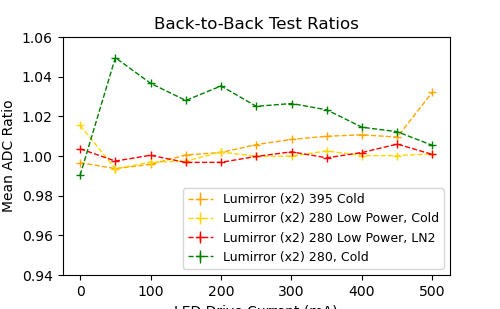

In [88]:
plt.close()
width = 5
fig,ax = plt.subplots(1,1,figsize=(width,width/((1+np.sqrt(5))/2)), sharex='col')
ax.errorbar(opticalpowers_395_lum2_colddry-0*xshift, means_395_lum2_colddry/means_395_lum2_colddry_1, yerr=0*stdevs_395_lum2_colddry,
            fmt='--', linewidth=1, marker="+", label="Lumirror (x2) 395 Cold", color="orange")

ax.errorbar(opticalpowers_395_lum2_colddry-0*xshift, means_280lp_lum2_colddry/means_280lp_lum2_colddry_1, yerr=0*stdevs_395_lum2_colddry,
            fmt='--', linewidth=1, marker="+", label="Lumirror (x2) 280 Low Power, Cold", color="gold")

ax.errorbar(opticalpowers_395_lum2_colddry-0*xshift, means_280lp_lum2_coldwet/means_280lp_lum2_coldwet_1, yerr=0*stdevs_395_lum2_colddry,
            fmt='--', linewidth=1,marker="+", label="Lumirror (x2) 280 Low Power, LN2", color="red")

ax.errorbar(opticalpowers_395_lum2_colddry-0*xshift, means_280_lum2_colddry/means_280_lum2_colddry_1, yerr=0*stdevs_395_lum2_colddry,
            fmt='--', linewidth=1,marker="+", label="Lumirror (x2) 280, Cold", color="green")
ax.legend(loc='lower right', fontsize=9)
ax.set_title("Back-to-Back Test Ratios")
ax.set_ylim(0.94,1.06)
ax.set_xlabel("LED Drive Current (mA)", size=10)
ax.set_ylabel("Mean ADC Ratio", size=10)
plt.show()

# conclusion: back-to-back tests where nothing went wrong are very consistent :)

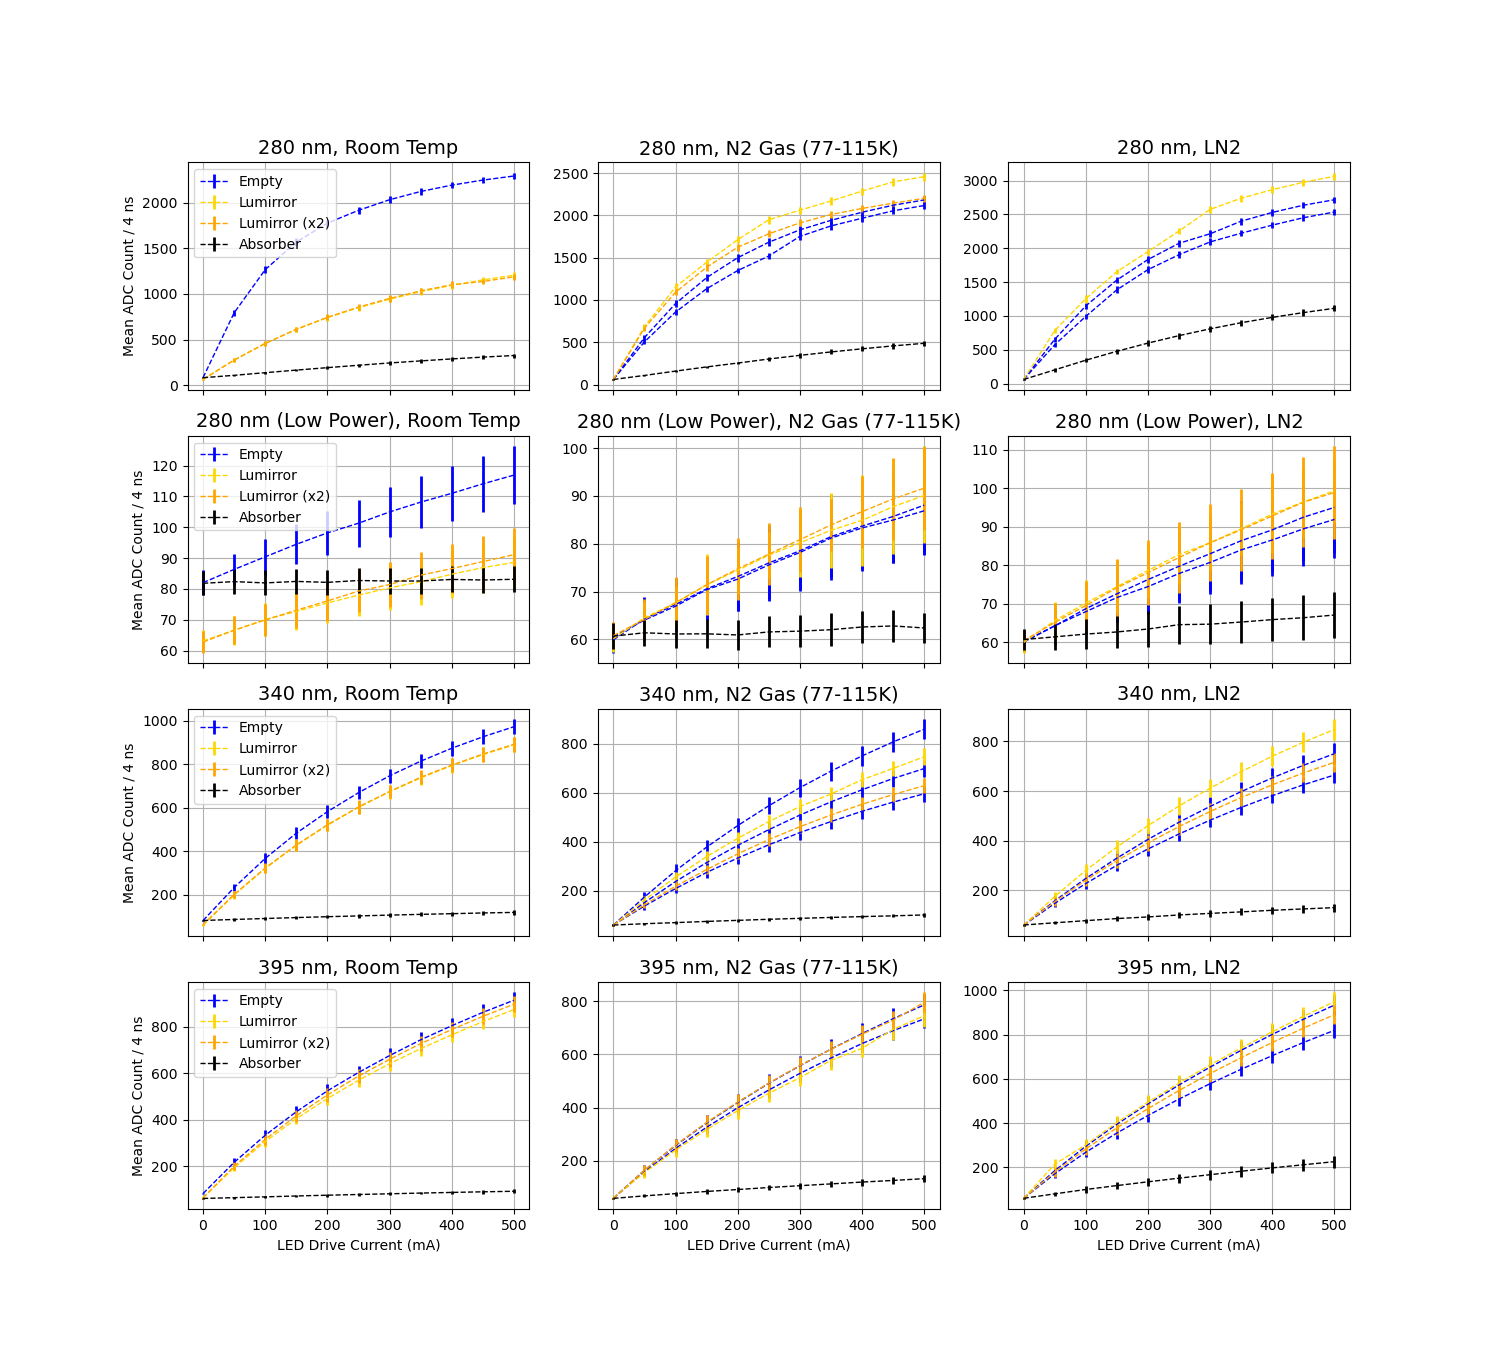

In [87]:
plt.close()
width = 15
fig,ax = plt.subplots(4,3,figsize=(width,4.4/3*width/((1+np.sqrt(5))/2)), sharex='col')

wavelengths = [280,280,340,395]
temps = ["Room Temp","N2 Gas (77-115K)", "LN2"]

#fig.title("REFLECT Sample Tests")


myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

xshift = 0.5
#280 HP
#warm
ax[0,0].errorbar(opticalpowers_280_empty_warm-0*xshift, means_280_empty_warm, yerr=stdevs_280_empty_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[0,0].errorbar(opticalpowers_280_lum_warm-0*xshift, means_280_lum_warm, yerr=stdevs_280_lum_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[0,0].errorbar(opticalpowers_280_lum2_warm-0*xshift, means_280_lum2_warm, yerr=stdevs_280_lum2_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[0,0].errorbar(opticalpowers_280_foil_warm-0*xshift, means_280_foil_warm, yerr=stdevs_280_foil_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Absorber", color="black")
#ax[0,0].errorbar(opticalpowers_280_foil_warm_1-0*xshift, means_280_foil_warm_1, yerr=stdevs_280_foil_warm_1,
#            fmt='--', linewidth=1, elinewidth=2, label="Absorber", color="black")

#cold
ax[0,1].errorbar(opticalpowers_280_empty_colddry-0*xshift, means_280_empty_colddry, yerr=stdevs_280_empty_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[0,1].errorbar(opticalpowers_280_empty_colddry_1-0*xshift, means_280_empty_colddry_1, yerr=stdevs_280_empty_colddry_1,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[0,1].errorbar(opticalpowers_280_lum_colddry-0*xshift, means_280_lum_colddry, yerr=stdevs_280_lum_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[0,1].errorbar(opticalpowers_280_lum2_colddry-0*xshift, means_280_lum2_colddry, yerr=stdevs_280_lum2_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
#ax[0,1].errorbar(opticalpowers_280_lum2_colddry_1-0*xshift, means_280_lum2_colddry_1, yerr=stdevs_280_lum2_colddry_1,
#            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="gold")
ax[0,1].errorbar(opticalpowers_280_foil_colddry-0*xshift, means_280_foil_colddry, yerr=stdevs_280_foil_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Absorber", color="black")

#LN2
ax[0,2].errorbar(opticalpowers_280_empty_coldwet-0*xshift, means_280_empty_coldwet, yerr=stdevs_280_empty_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[0,2].errorbar(opticalpowers_280_empty_coldwet_1-0*xshift, means_280_empty_coldwet_1, yerr=stdevs_280_empty_coldwet_1,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[0,2].errorbar(opticalpowers_280_lum_coldwet-0*xshift, means_280_lum_coldwet, yerr=stdevs_280_lum_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
###ax[0,2].errorbar(opticalpowers_280_lum2_coldwet_1-0*xshift, means_280_lum2_coldwet_1, yerr=stdevs_280_lum2_coldwet_1,
###            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[0,2].errorbar(opticalpowers_280_foil_coldwet-0*xshift, means_280_foil_coldwet, yerr=stdevs_280_foil_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="black")

#280 LP
#warm
ax[1,0].errorbar(opticalpowers_280lp_empty_warm-0*xshift, means_280lp_empty_warm, yerr=stdevs_280lp_empty_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[1,0].errorbar(opticalpowers_280lp_lum_warm-0*xshift, means_280lp_lum_warm, yerr=stdevs_280lp_lum_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[1,0].errorbar(opticalpowers_280lp_lum2_warm-0*xshift, means_280lp_lum2_warm, yerr=stdevs_280lp_lum2_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[1,0].errorbar(opticalpowers_280lp_foil_warm-0*xshift, means_280lp_foil_warm, yerr=stdevs_280lp_foil_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Absorber", color="black")

#cold
ax[1,1].errorbar(opticalpowers_280lp_empty_colddry-0*xshift, means_280lp_empty_colddry, yerr=stdevs_280lp_empty_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[1,1].errorbar(opticalpowers_280lp_empty_colddry_1-0*xshift, means_280lp_empty_colddry_1, yerr=stdevs_280lp_empty_colddry_1,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[1,1].errorbar(opticalpowers_280lp_lum_colddry-0*xshift, means_280lp_lum_colddry, yerr=stdevs_280lp_lum_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[1,1].errorbar(opticalpowers_280lp_lum2_colddry-0*xshift, means_280lp_lum2_colddry, yerr=stdevs_280lp_lum2_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
#ax[1,1].errorbar(opticalpowers_280lp_lum2_colddry_1-0*xshift, means_280lp_lum2_colddry_1, yerr=stdevs_280lp_lum2_colddry_1,
#            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="gold")
ax[1,1].errorbar(opticalpowers_280lp_foil_colddry-0*xshift, means_280lp_foil_colddry, yerr=stdevs_280lp_foil_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="black")

#LN2
ax[1,2].errorbar(opticalpowers_280lp_empty_coldwet-0*xshift, means_280lp_empty_coldwet, yerr=stdevs_280lp_empty_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[1,2].errorbar(opticalpowers_280lp_empty_coldwet_1-0*xshift, means_280lp_empty_coldwet_1, yerr=stdevs_280lp_empty_coldwet_1,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[1,2].errorbar(opticalpowers_280lp_lum_coldwet-0*xshift, means_280lp_lum_coldwet, yerr=stdevs_280lp_lum_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[1,2].errorbar(opticalpowers_280lp_lum2_coldwet-0*xshift, means_280lp_lum2_coldwet, yerr=stdevs_280lp_lum2_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
#ax[1,2].errorbar(opticalpowers_280lp_lum2_coldwet_1-0*xshift, means_280lp_lum2_coldwet_1, yerr=stdevs_280lp_lum2_coldwet_1,
#            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="gold")
ax[1,2].errorbar(opticalpowers_280lp_foil_coldwet-0*xshift, means_280lp_foil_coldwet, yerr=stdevs_280lp_foil_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="black")

#340
#warm
ax[2,0].errorbar(opticalpowers_340_empty_warm-0*xshift, means_340_empty_warm, yerr=stdevs_340_empty_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[2,0].errorbar(opticalpowers_340_lum_warm-0*xshift, means_340_lum_warm, yerr=stdevs_340_lum_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[2,0].errorbar(opticalpowers_340_lum2_warm-0*xshift, means_340_lum2_warm, yerr=stdevs_340_lum2_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[2,0].errorbar(opticalpowers_340_foil_warm-0*xshift, means_340_foil_warm, yerr=stdevs_340_foil_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Absorber", color="black")
#cold
ax[2,1].errorbar(opticalpowers_340_empty_colddry-0*xshift, means_340_empty_colddry, yerr=stdevs_340_empty_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[2,1].errorbar(opticalpowers_340_empty_colddry_1-0*xshift, means_340_empty_colddry_1, yerr=stdevs_340_empty_colddry_1,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[2,1].errorbar(opticalpowers_340_empty_colddry_2-0*xshift, means_340_empty_colddry_2, yerr=stdevs_340_empty_colddry_2,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[2,1].errorbar(opticalpowers_340_lum_colddry-0*xshift, means_340_lum_colddry, yerr=stdevs_340_lum_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[2,1].errorbar(opticalpowers_340_lum2_colddry-0*xshift, means_340_lum2_colddry, yerr=stdevs_340_lum2_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[2,1].errorbar(opticalpowers_340_foil_colddry-0*xshift, means_340_foil_colddry, yerr=stdevs_340_foil_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Absorber", color="black")
#LN2
ax[2,2].errorbar(opticalpowers_340_empty_coldwet-0*xshift, means_340_empty_coldwet, yerr=stdevs_340_empty_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[2,2].errorbar(opticalpowers_340_empty_coldwet_1-0*xshift, means_340_empty_coldwet_1, yerr=stdevs_340_empty_coldwet_1,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[2,2].errorbar(opticalpowers_340_lum_coldwet-0*xshift, means_340_lum_coldwet, yerr=stdevs_340_lum_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[2,2].errorbar(opticalpowers_340_lum2_coldwet-0*xshift, means_340_lum2_coldwet, yerr=stdevs_340_lum2_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
#ax[2,2].errorbar(opticalpowers_340_lum2_coldwet_1-0*xshift, means_340_lum2_coldwet_1, yerr=stdevs_340_lum2_coldwet_1,
#            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="gold")
ax[2,2].errorbar(opticalpowers_340_foil_coldwet-0*xshift, means_340_foil_coldwet, yerr=stdevs_340_foil_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Absorber", color="black")

#395
#warm
ax[3,0].errorbar(opticalpowers_395_empty_warm-0*xshift, means_395_empty_warm, yerr=stdevs_395_empty_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[3,0].errorbar(opticalpowers_395_lum_warm-0*xshift, means_395_lum_warm, yerr=stdevs_395_lum_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[3,0].errorbar(opticalpowers_395_lum2_warm-0*xshift, means_395_lum2_warm, yerr=stdevs_395_lum2_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[3,0].errorbar(opticalpowers_395_foil_warm-0*xshift, means_395_foil_warm, yerr=stdevs_395_foil_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Absorber", color="black")

#cold
ax[3,1].errorbar(opticalpowers_395_empty_colddry-0*xshift, means_395_empty_colddry, yerr=stdevs_395_empty_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[3,1].errorbar(opticalpowers_395_empty_colddry_1-0*xshift, means_395_empty_colddry_1, yerr=stdevs_395_empty_colddry_1,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[3,1].errorbar(opticalpowers_395_lum_colddry-0*xshift, means_395_lum_colddry, yerr=stdevs_395_lum_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[3,1].errorbar(opticalpowers_395_lum2_colddry-0*xshift, means_395_lum2_colddry, yerr=stdevs_395_lum2_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
#ax[3,1].errorbar(opticalpowers_395_lum2_colddry_1-0*xshift, means_395_lum2_colddry_1, yerr=stdevs_395_lum2_colddry_1,
#            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="gold")
ax[3,1].errorbar(opticalpowers_395_foil_colddry-0*xshift, means_395_foil_colddry, yerr=stdevs_395_foil_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="black")

#LN2
ax[3,2].errorbar(opticalpowers_395_empty_coldwet-0*xshift, means_395_empty_coldwet, yerr=stdevs_395_empty_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[3,2].errorbar(opticalpowers_395_empty_coldwet_1-0*xshift, means_395_empty_coldwet_1, yerr=stdevs_395_empty_coldwet_1,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[3,2].errorbar(opticalpowers_395_lum_coldwet-0*xshift, means_395_lum_coldwet, yerr=stdevs_395_lum_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[3,2].errorbar(opticalpowers_395_lum2_coldwet-0*xshift, means_395_lum2_coldwet, yerr=stdevs_395_lum2_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[3,2].errorbar(opticalpowers_395_foil_coldwet-0*xshift, means_395_foil_coldwet, yerr=stdevs_395_foil_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="black")

ax[0,0].legend(loc='upper left', fontsize=10)
ax[1,0].legend(loc='upper left', fontsize=10)
ax[2,0].legend(loc='upper left', fontsize=10)
ax[3,0].legend(loc='upper left', fontsize=10)
#ax[0,0].set_ylim(0,800)
for i in range(4):
    for j in range(3):
        ax[i,j].set_title(f"{wavelengths[i]} nm, {temps[j]}", size=14)
        if i==1: ax[i,j].set_title(f"{wavelengths[i]} nm (Low Power), {temps[j]}", size=14)
        ax[i,j].grid()
        if i==3: ax[i,j].set_xlabel("LED Drive Current (mA)", size=10)

#ax[3,0].set_xlabel("LED Drive Current (mA)", size=10)
#ax[3,1].set_xlabel("LED Drive Current (mA)", size=10)
#ax[3,2].set_xlabel("LED Drive Current (mA)", size=10)
ax[0,0].set_ylabel("Mean ADC Count / 4 ns", size=10)
ax[1,0].set_ylabel("Mean ADC Count / 4 ns", size=10)
ax[2,0].set_ylabel("Mean ADC Count / 4 ns", size=10)
ax[3,0].set_ylabel("Mean ADC Count / 4 ns", size=10)
plt.show()

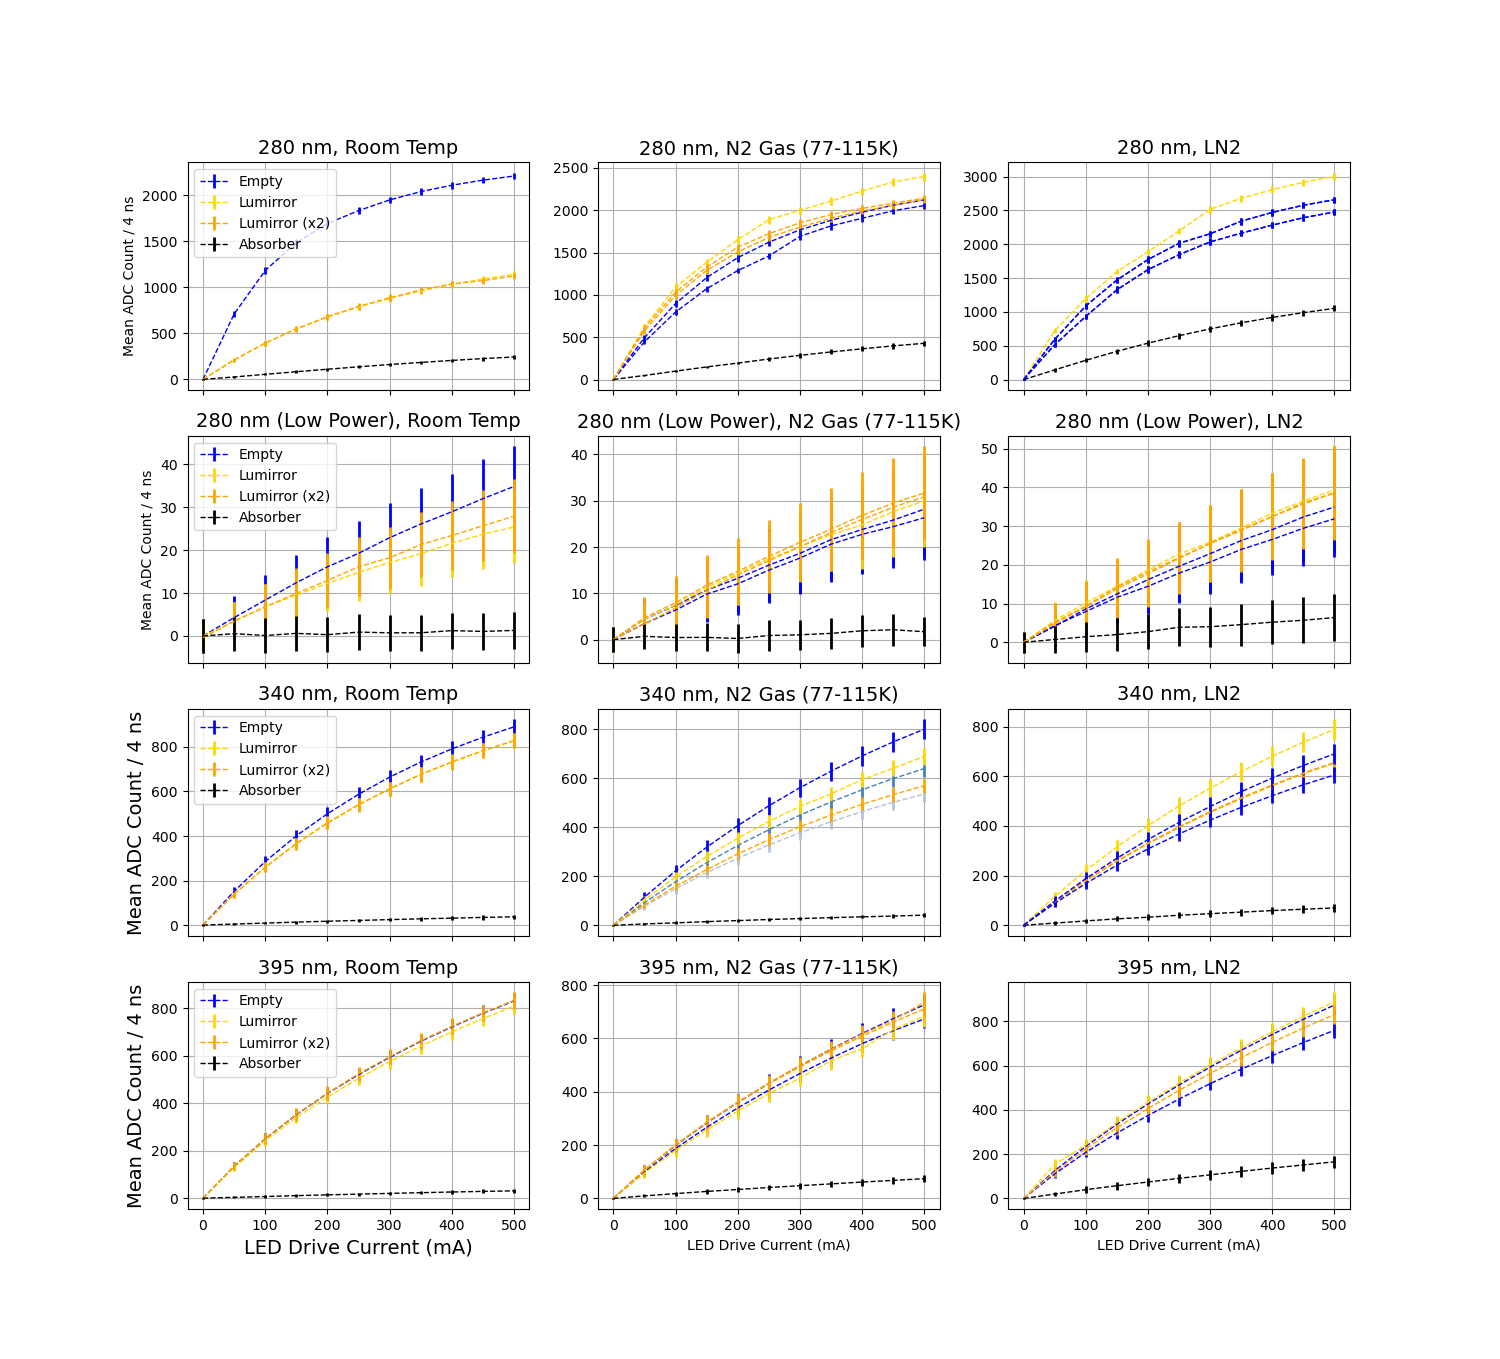

In [92]:
plt.close()
width = 15
fig,ax = plt.subplots(4,3,figsize=(width,4.4/3*width/((1+np.sqrt(5))/2)), sharex='col')

wavelengths = [280,280,340,395]
temps = ["Room Temp","N2 Gas (77-115K)", "LN2"]

#fig.title("REFLECT Sample Tests")


myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

xshift = 0.5
#280 HP
#warm
ax[0,0].errorbar(opticalpowers_280_empty_warm-0*xshift, means_280_empty_warm-means_280_empty_warm[0], yerr=stdevs_280_empty_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[0,0].errorbar(opticalpowers_280_lum_warm-0*xshift, means_280_lum_warm-means_280_lum_warm[0], yerr=stdevs_280_lum_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[0,0].errorbar(opticalpowers_280_lum2_warm-0*xshift, means_280_lum2_warm-means_280_lum2_warm[0], yerr=stdevs_280_lum2_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[0,0].errorbar(opticalpowers_280_foil_warm-0*xshift, means_280_foil_warm-means_280_foil_warm[0], yerr=stdevs_280_foil_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Absorber", color="black")
#ax[0,0].errorbar(opticalpowers_280_foil_warm_1-0*xshift, means_280_foil_warm_1-means_280_foil_warm_1[0], yerr=stdevs_280_foil_warm_1,
#            fmt='--', linewidth=1, elinewidth=2, label="Absorber", color="black")

#cold
ax[0,1].errorbar(opticalpowers_280_empty_colddry-0*xshift, means_280_empty_colddry-means_280_empty_colddry[0], yerr=stdevs_280_empty_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[0,1].errorbar(opticalpowers_280_empty_colddry_1-0*xshift, means_280_empty_colddry_1-means_280_empty_colddry_1[0], yerr=stdevs_280_empty_colddry_1,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[0,1].errorbar(opticalpowers_280_lum_colddry-0*xshift, means_280_lum_colddry-means_280_lum_colddry[0], yerr=stdevs_280_lum_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[0,1].errorbar(opticalpowers_280_lum2_colddry-0*xshift, means_280_lum2_colddry-means_280_lum2_colddry[0], yerr=stdevs_280_lum2_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[0,1].errorbar(opticalpowers_280_lum2_colddry_1-0*xshift, means_280_lum2_colddry_1-means_280_lum2_colddry_1[0], yerr=stdevs_280_lum2_colddry_1,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[0,1].errorbar(opticalpowers_280_foil_colddry-0*xshift, means_280_foil_colddry-means_280_foil_colddry[0], yerr=stdevs_280_foil_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Absorber", color="black")

#LN2
ax[0,2].errorbar(opticalpowers_280_empty_coldwet-0*xshift, means_280_empty_coldwet-means_280_empty_coldwet[0], yerr=stdevs_280_empty_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[0,2].errorbar(opticalpowers_280_empty_coldwet_1-0*xshift, means_280_empty_coldwet_1-means_280_empty_coldwet_1[0], yerr=stdevs_280_empty_coldwet_1,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[0,2].errorbar(opticalpowers_280_lum_coldwet-0*xshift, means_280_lum_coldwet-means_280_lum_coldwet[0],yerr=stdevs_280_lum_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
#ax[0,2].errorbar(opticalpowers_280_lum2_coldwet_1-0*xshift, means_280_lum2_coldwet_1, yerr=stdevs_280_lum2_coldwet_1,
#            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[0,2].errorbar(opticalpowers_280_foil_coldwet-0*xshift, means_280_foil_coldwet-means_280_foil_coldwet[0], yerr=stdevs_280_foil_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="black")
ax[0,2].errorbar(opticalpowers_280_empty_coldwet-0*xshift, means_280_empty_coldwet-means_280_empty_coldwet[0], yerr=stdevs_280_empty_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[0,2].errorbar(opticalpowers_280_empty_coldwet_1-0*xshift, means_280_empty_coldwet_1-means_280_empty_coldwet_1[0], yerr=stdevs_280_empty_coldwet_1,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")

#280 LP
#warm
ax[1,0].errorbar(opticalpowers_280lp_empty_warm-0*xshift, means_280lp_empty_warm-means_280lp_empty_warm[0], yerr=stdevs_280lp_empty_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[1,0].errorbar(opticalpowers_280lp_lum_warm-0*xshift, means_280lp_lum_warm-means_280lp_lum_warm[0], yerr=stdevs_280lp_lum_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[1,0].errorbar(opticalpowers_280lp_lum2_warm-0*xshift, means_280lp_lum2_warm-means_280lp_lum_warm[0], yerr=stdevs_280lp_lum2_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[1,0].errorbar(opticalpowers_280lp_foil_warm-0*xshift, means_280lp_foil_warm-means_280lp_foil_warm[0], yerr=stdevs_280lp_foil_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Absorber", color="black")

#cold
ax[1,1].errorbar(opticalpowers_280lp_empty_colddry-0*xshift, means_280lp_empty_colddry-means_280lp_empty_colddry[0], yerr=stdevs_280lp_empty_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[1,1].errorbar(opticalpowers_280lp_empty_colddry_1-0*xshift, means_280lp_empty_colddry_1-means_280lp_empty_colddry_1[0], yerr=stdevs_280lp_empty_colddry_1,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[1,1].errorbar(opticalpowers_280lp_lum_colddry-0*xshift, means_280lp_lum_colddry-means_280lp_lum_colddry[0], yerr=stdevs_280lp_lum_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[1,1].errorbar(opticalpowers_280lp_lum2_colddry-0*xshift, means_280lp_lum2_colddry-means_280lp_lum2_colddry[0], yerr=stdevs_280lp_lum2_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[1,1].errorbar(opticalpowers_280lp_lum2_colddry_1-0*xshift, means_280lp_lum2_colddry_1-means_280lp_lum2_colddry_1[0], yerr=stdevs_280lp_lum2_colddry_1,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[1,1].errorbar(opticalpowers_280lp_foil_colddry-0*xshift, means_280lp_foil_colddry-means_280lp_foil_colddry[0], yerr=stdevs_280lp_foil_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="black")

#LN2
ax[1,2].errorbar(opticalpowers_280lp_empty_coldwet-0*xshift, means_280lp_empty_coldwet-means_280lp_empty_coldwet[0], yerr=stdevs_280lp_empty_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[1,2].errorbar(opticalpowers_280lp_empty_coldwet_1-0*xshift, means_280lp_empty_coldwet_1-means_280lp_empty_coldwet_1[0], yerr=stdevs_280lp_empty_coldwet_1,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[1,2].errorbar(opticalpowers_280lp_lum_coldwet-0*xshift, means_280lp_lum_coldwet-means_280lp_lum_coldwet[0], yerr=stdevs_280lp_lum_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[1,2].errorbar(opticalpowers_280lp_lum2_coldwet-0*xshift, means_280lp_lum2_coldwet-means_280lp_lum2_coldwet[0], yerr=stdevs_280lp_lum2_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[1,2].errorbar(opticalpowers_280lp_lum2_coldwet_1-0*xshift, means_280lp_lum2_coldwet_1-means_280lp_lum2_coldwet_1[0], yerr=stdevs_280lp_lum2_coldwet_1,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[1,2].errorbar(opticalpowers_280lp_foil_coldwet-0*xshift, means_280lp_foil_coldwet-means_280lp_foil_coldwet[0], yerr=stdevs_280lp_foil_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="black")

#340
#warm
ax[2,0].errorbar(opticalpowers_340_empty_warm-0*xshift, means_340_empty_warm-means_340_empty_warm[0], yerr=stdevs_340_empty_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[2,0].errorbar(opticalpowers_340_lum_warm-0*xshift, means_340_lum_warm-means_340_lum_warm[0], yerr=stdevs_340_lum_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[2,0].errorbar(opticalpowers_340_lum2_warm-0*xshift, means_340_lum2_warm-means_340_lum2_warm[0], yerr=stdevs_340_lum2_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[2,0].errorbar(opticalpowers_340_foil_warm-0*xshift, means_340_foil_warm-means_340_foil_warm[0], yerr=stdevs_340_foil_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Absorber", color="black")
#cold
ax[2,1].errorbar(opticalpowers_340_empty_colddry-0*xshift, means_340_empty_colddry-means_340_empty_colddry[0], yerr=stdevs_340_empty_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[2,1].errorbar(opticalpowers_340_empty_colddry_1-0*xshift, means_340_empty_colddry_1-means_340_empty_colddry_1[0], yerr=stdevs_340_empty_colddry_1,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="steelblue")
ax[2,1].errorbar(opticalpowers_340_empty_colddry_2-0*xshift, means_340_empty_colddry_2-means_340_empty_colddry_2[0], yerr=stdevs_340_empty_colddry_2,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="lightsteelblue")
ax[2,1].errorbar(opticalpowers_340_lum_colddry-0*xshift, means_340_lum_colddry-means_340_lum_colddry[0], yerr=stdevs_340_lum_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[2,1].errorbar(opticalpowers_340_lum2_colddry-0*xshift, means_340_lum2_colddry-means_340_lum2_colddry[0], yerr=stdevs_340_lum2_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[2,1].errorbar(opticalpowers_340_foil_colddry-0*xshift, means_340_foil_colddry-means_340_foil_colddry[0], yerr=stdevs_340_foil_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Absorber", color="black")
#LN2
ax[2,2].errorbar(opticalpowers_340_lum_coldwet-0*xshift, means_340_lum_coldwet-means_340_lum_coldwet[0], yerr=stdevs_340_lum_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[2,2].errorbar(opticalpowers_340_lum2_coldwet-0*xshift, means_340_lum2_coldwet-means_340_lum2_coldwet[0], yerr=stdevs_340_lum2_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[2,2].errorbar(opticalpowers_340_lum2_coldwet_1-0*xshift, means_340_lum2_coldwet_1-means_340_lum2_coldwet_1[0], yerr=stdevs_340_lum2_coldwet_1,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[2,2].errorbar(opticalpowers_340_foil_coldwet-0*xshift, means_340_foil_coldwet-means_340_foil_coldwet[0], yerr=stdevs_340_foil_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Absorber", color="black")
ax[2,2].errorbar(opticalpowers_340_empty_coldwet-0*xshift, means_340_empty_coldwet-means_340_empty_coldwet[0], yerr=stdevs_340_empty_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[2,2].errorbar(opticalpowers_340_empty_coldwet_1-0*xshift, means_340_empty_coldwet_1-means_340_empty_coldwet_1[0], yerr=stdevs_340_empty_coldwet_1,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")

#395
#warm
ax[3,0].errorbar(opticalpowers_395_empty_warm-0*xshift, means_395_empty_warm-means_395_empty_warm[0], yerr=stdevs_395_empty_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[3,0].errorbar(opticalpowers_395_lum_warm-0*xshift, means_395_lum_warm-means_395_lum_warm[0], yerr=stdevs_395_lum_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[3,0].errorbar(opticalpowers_395_lum2_warm-0*xshift, means_395_lum2_warm-means_395_lum2_warm[0], yerr=stdevs_395_lum2_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[3,0].errorbar(opticalpowers_395_foil_warm-0*xshift, means_395_foil_warm-means_395_foil_warm[0], yerr=stdevs_395_foil_warm,
            fmt='--', linewidth=1, elinewidth=2, label="Absorber", color="black")

#cold
ax[3,1].errorbar(opticalpowers_395_empty_colddry-0*xshift, means_395_empty_colddry-means_395_empty_colddry[0], yerr=stdevs_395_empty_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[3,1].errorbar(opticalpowers_395_empty_colddry_1-0*xshift, means_395_empty_colddry_1-means_395_empty_colddry_1[0], yerr=stdevs_395_empty_colddry_1,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[3,1].errorbar(opticalpowers_395_lum_colddry-0*xshift, means_395_lum_colddry-means_395_lum_colddry[0], yerr=stdevs_395_lum_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[3,1].errorbar(opticalpowers_395_lum2_colddry-0*xshift, means_395_lum2_colddry-means_395_lum2_colddry[0], yerr=stdevs_395_lum2_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[3,1].errorbar(opticalpowers_395_lum2_colddry_1-0*xshift, means_395_lum2_colddry_1-means_395_lum2_colddry_1[0], yerr=stdevs_395_lum2_colddry_1,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[3,1].errorbar(opticalpowers_395_foil_colddry-0*xshift, means_395_foil_colddry-means_395_foil_colddry[0], yerr=stdevs_395_foil_colddry,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="black")

#LN2
ax[3,2].errorbar(opticalpowers_395_empty_coldwet-0*xshift, means_395_empty_coldwet-means_395_empty_coldwet[0], yerr=stdevs_395_empty_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[3,2].errorbar(opticalpowers_395_empty_coldwet_1-0*xshift, means_395_empty_coldwet_1-means_395_empty_coldwet_1[0], yerr=stdevs_395_empty_coldwet_1,
            fmt='--', linewidth=1, elinewidth=2, label="Empty", color="Blue")
ax[3,2].errorbar(opticalpowers_395_lum_coldwet-0*xshift, means_395_lum_coldwet-means_395_lum_coldwet[0], yerr=stdevs_395_lum_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror", color="gold")
ax[3,2].errorbar(opticalpowers_395_lum2_coldwet-0*xshift, means_395_lum2_coldwet-means_395_lum2_coldwet[0], yerr=stdevs_395_lum2_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="orange")
ax[3,2].errorbar(opticalpowers_395_foil_coldwet-0*xshift, means_395_foil_coldwet-means_395_foil_coldwet[0], yerr=stdevs_395_foil_coldwet,
            fmt='--', linewidth=1, elinewidth=2, label="Lumirror (x2)", color="black")


ax[0,0].legend(loc='upper left', fontsize=10)
ax[3,0].legend(loc='upper left', fontsize=10)
ax[1,0].legend(loc='upper left', fontsize=10)
ax[2,0].legend(loc='upper left', fontsize=10)
#ax[0,0].set_ylim(0,800)
for i in range(4):
    for j in range(3):
        ax[i,j].set_title(f"{wavelengths[i]} nm, {temps[j]}", size=14)
        if i==1: ax[i,j].set_title(f"{wavelengths[i]} nm (Low Power), {temps[j]}", size=14)
        ax[i,j].grid()
        #if i!=0: ax[i,j].set_xlabel("LED Drive Current (mA)", size=10)

ax[3,0].set_xlabel("LED Drive Current (mA)", size=14)
ax[3,1].set_xlabel("LED Drive Current (mA)", size=10)
ax[3,2].set_xlabel("LED Drive Current (mA)", size=10)
ax[0,0].set_ylabel("Mean ADC Count / 4 ns", size=10)
ax[1,0].set_ylabel("Mean ADC Count / 4 ns", size=10)
ax[2,0].set_ylabel("Mean ADC Count / 4 ns", size=14)
ax[3,0].set_ylabel("Mean ADC Count / 4 ns", size=14)
#ax[2,0].set_title("340 nm LED, Air (295K)",size=16)
#ax[3,0].set_title("340 nm LED, N2 gas (~110K)",size=16)
plt.show()

### 340 nm

In [22]:
tic()
inputfile=uproot.open("s521_l340_lum_warm.root")
verbose = False
opticalpowers_340_lum_warm = np.array([])
labels_340_lum_warm = []
ADCcounts_340_lum_warm = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_340_lum_warm = []
means_340_lum_warm = np.array([])
stdevs_340_lum_warm = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_340_lum_warm = np.append(opticalpowers_340_lum_warm, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_340_lum_warm = np.append(opticalpowers_340_lum_warm, float(inputfile[key].title[-10:-5]))
    labels_340_lum_warm.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_340_lum_warm.append(inputfile[key].values())
    means_340_lum_warm = np.append(means_340_lum_warm, sum(Probabilities_340_lum_warm[-1]*ADCcounts_340_lum_warm))
    stdevs_340_lum_warm = np.append(stdevs_340_lum_warm, np.sqrt(sum(Probabilities_340_lum_warm[-1]*(ADCcounts_340_lum_warm-means_340_lum_warm[-1])**2)))

    if (verbose): 
        print("mean: ",means_340_lum_warm[-1], ", st.dev: ",stdevs_340_lum_warm[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 340 nm, Lumirror, warm", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_340_lum_warm)):
            ax.errorbar(ADCcounts_340_lum_warm, Probabilities_340_lum_warm[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_340_lum_warm[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1000)
        plt.grid()
        plt.show()
        
tocms()

Elapsed time is 78.078 milliseconds.


In [23]:
tic()
inputfile=uproot.open("s521_l340_lum_coldwet.root")
verbose = False
opticalpowers_340_lum_coldwet = np.array([])
labels_340_lum_coldwet = []
ADCcounts_340_lum_coldwet = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_340_lum_coldwet = []
means_340_lum_coldwet = np.array([])
stdevs_340_lum_coldwet = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_340_lum_coldwet = np.append(opticalpowers_340_lum_coldwet, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_340_lum_coldwet = np.append(opticalpowers_340_lum_coldwet, float(inputfile[key].title[-10:-5]))
    labels_340_lum_coldwet.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_340_lum_coldwet.append(inputfile[key].values())
    means_340_lum_coldwet = np.append(means_340_lum_coldwet, sum(Probabilities_340_lum_coldwet[-1]*ADCcounts_340_lum_coldwet))
    stdevs_340_lum_coldwet = np.append(stdevs_340_lum_coldwet, np.sqrt(sum(Probabilities_340_lum_coldwet[-1]*(ADCcounts_340_lum_coldwet-means_340_lum_coldwet[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_340_lum_coldwet[-1], ", st.dev: ",stdevs_340_lum_coldwet[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 340 nm, Lumirror, LN2", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_340_lum_coldwet)):
            ax.errorbar(ADCcounts_340_lum_coldwet, Probabilities_340_lum_coldwet[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_340_lum_coldwet[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1000)
        plt.grid()
        plt.show()
    
tocms()



Elapsed time is 105.164 milliseconds.


In [24]:
tic()
inputfile=uproot.open("s521_l340_empty_colddry.root")
verbose = False
opticalpowers_340_empty_colddry = np.array([])
labels_340_empty_colddry = []
ADCcounts_340_empty_colddry = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_340_empty_colddry = []
means_340_empty_colddry = np.array([])
stdevs_340_empty_colddry = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_340_empty_colddry = np.append(opticalpowers_340_empty_colddry, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_340_empty_colddry = np.append(opticalpowers_340_empty_colddry, float(inputfile[key].title[-10:-5]))
    labels_340_empty_colddry.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_340_empty_colddry.append(inputfile[key].values())
    means_340_empty_colddry = np.append(means_340_empty_colddry, sum(Probabilities_340_empty_colddry[-1]*ADCcounts_340_empty_colddry))
    stdevs_340_empty_colddry = np.append(stdevs_340_empty_colddry, np.sqrt(sum(Probabilities_340_empty_colddry[-1]*(ADCcounts_340_empty_colddry-means_340_empty_colddry[-1])**2)))
    
    if (verbose):
        print("mean: ",means_340_empty_colddry[-1], ", st.dev: ",stdevs_340_empty_colddry[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 340 nm, Empty, Cold", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_340_empty_colddry)):
            ax.errorbar(ADCcounts_340_empty_colddry, Probabilities_340_empty_colddry[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_340_empty_colddry[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1000)
        plt.grid()
        plt.show()
    
tocms()

Elapsed time is 72.251 milliseconds.


In [25]:
tic()
inputfile=uproot.open("s521_l340_lum_colddry.root")
verbose = False
opticalpowers_340_lum_colddry = np.array([])
labels_340_lum_colddry = []
ADCcounts_340_lum_colddry = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_340_lum_colddry = []
means_340_lum_colddry = np.array([])
stdevs_340_lum_colddry = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_340_lum_colddry = np.append(opticalpowers_340_lum_colddry, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_340_lum_colddry = np.append(opticalpowers_340_lum_colddry, float(inputfile[key].title[-10:-5]))
    labels_340_lum_colddry.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_340_lum_colddry.append(inputfile[key].values())
    means_340_lum_colddry = np.append(means_340_lum_colddry, sum(Probabilities_340_lum_colddry[-1]*ADCcounts_340_lum_colddry))
    stdevs_340_lum_colddry = np.append(stdevs_340_lum_colddry, np.sqrt(sum(Probabilities_340_lum_colddry[-1]*(ADCcounts_340_lum_colddry-means_340_lum_colddry[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_340_lum_colddry[-1], ", st.dev: ",stdevs_340_lum_colddry[-1])
        
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 340 nm, Lumirror, Cold", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_340_lum_colddry)):
            ax.errorbar(ADCcounts_340_lum_colddry, Probabilities_340_lum_colddry[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_340_lum_colddry[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1000)
        plt.grid()
        plt.show()
tocms()



Elapsed time is 65.892 milliseconds.


In [26]:
tic()
inputfile=uproot.open("s521_l340_lum2_warm.root")
verbose = False
opticalpowers_340_lum2_warm = np.array([])
labels_340_lum2_warm = []
ADCcounts_340_lum2_warm = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_340_lum2_warm = []
means_340_lum2_warm = np.array([])
stdevs_340_lum2_warm = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_340_lum2_warm = np.append(opticalpowers_340_lum2_warm, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_340_lum2_warm = np.append(opticalpowers_340_lum2_warm, float(inputfile[key].title[-10:-5]))
    labels_340_lum2_warm.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_340_lum2_warm.append(inputfile[key].values())
    means_340_lum2_warm = np.append(means_340_lum2_warm, sum(Probabilities_340_lum2_warm[-1]*ADCcounts_340_lum2_warm))
    stdevs_340_lum2_warm = np.append(stdevs_340_lum2_warm, np.sqrt(sum(Probabilities_340_lum2_warm[-1]*(ADCcounts_340_lum2_warm-means_340_lum2_warm[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_340_lum2_warm[-1], ", st.dev: ",stdevs_340_lum2_warm[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 340 nm, Lumirror (x2), Warm", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_340_lum2_warm)):
            ax.errorbar(ADCcounts_340_lum2_warm, Probabilities_340_lum2_warm[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_340_lum2_warm[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1000)
        plt.grid()
        plt.show()
tocms()



Elapsed time is 65.728 milliseconds.


In [27]:
tic()
inputfile=uproot.open("s521_l340_foil_coldwet.root")
verbose = False
opticalpowers_340_foil_coldwet = np.array([])
labels_340_foil_coldwet = []
ADCcounts_340_foil_coldwet = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_340_foil_coldwet = []
means_340_foil_coldwet = np.array([])
stdevs_340_foil_coldwet = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_340_foil_coldwet = np.append(opticalpowers_340_foil_coldwet, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_340_foil_coldwet = np.append(opticalpowers_340_foil_coldwet, float(inputfile[key].title[-10:-5]))
    labels_340_foil_coldwet.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_340_foil_coldwet.append(inputfile[key].values())
    means_340_foil_coldwet = np.append(means_340_foil_coldwet, sum(Probabilities_340_foil_coldwet[-1]*ADCcounts_340_foil_coldwet))
    stdevs_340_foil_coldwet = np.append(stdevs_340_foil_coldwet, np.sqrt(sum(Probabilities_340_foil_coldwet[-1]*(ADCcounts_340_foil_coldwet-means_340_foil_coldwet[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_340_foil_coldwet[-1], ", st.dev: ",stdevs_340_foil_coldwet[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 340 nm, Foil, LN2", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_340_foil_coldwet)):
            ax.errorbar(ADCcounts_340_foil_coldwet, Probabilities_340_foil_coldwet[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_340_foil_coldwet[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,200)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 58.021 milliseconds.


In [28]:
tic()
inputfile=uproot.open("s521_l340_foil_colddry.root")
verbose = False
opticalpowers_340_foil_colddry = np.array([])
labels_340_foil_colddry = []
ADCcounts_340_foil_colddry = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_340_foil_colddry = []
means_340_foil_colddry = np.array([])
stdevs_340_foil_colddry = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_340_foil_colddry = np.append(opticalpowers_340_foil_colddry, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_340_foil_colddry = np.append(opticalpowers_340_foil_colddry, float(inputfile[key].title[-10:-5]))
    labels_340_foil_colddry.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_340_foil_colddry.append(inputfile[key].values())
    means_340_foil_colddry = np.append(means_340_foil_colddry, sum(Probabilities_340_foil_colddry[-1]*ADCcounts_340_foil_colddry))
    stdevs_340_foil_colddry = np.append(stdevs_340_foil_colddry, np.sqrt(sum(Probabilities_340_foil_colddry[-1]*(ADCcounts_340_foil_colddry-means_340_foil_colddry[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_340_foil_colddry[-1], ", st.dev: ",stdevs_340_foil_colddry[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 340 nm, Foil, Cold", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_340_foil_colddry)):
            ax.errorbar(ADCcounts_340_foil_colddry, Probabilities_340_foil_colddry[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_340_foil_colddry[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,200)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 55.354 milliseconds.


In [29]:
tic()
inputfile=uproot.open("s521_l340_foil_colddry.root")
verbose = False
opticalpowers_340_foil_colddry = np.array([])
labels_340_foil_colddry = []
ADCcounts_340_foil_colddry = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_340_foil_colddry = []
means_340_foil_colddry = np.array([])
stdevs_340_foil_colddry = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_340_foil_colddry = np.append(opticalpowers_340_foil_colddry, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_340_foil_colddry = np.append(opticalpowers_340_foil_colddry, float(inputfile[key].title[-10:-5]))
    labels_340_foil_colddry.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_340_foil_colddry.append(inputfile[key].values())
    means_340_foil_colddry = np.append(means_340_foil_colddry, sum(Probabilities_340_foil_colddry[-1]*ADCcounts_340_foil_colddry))
    stdevs_340_foil_colddry = np.append(stdevs_340_foil_colddry, np.sqrt(sum(Probabilities_340_foil_colddry[-1]*(ADCcounts_340_foil_colddry-means_340_foil_colddry[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_340_foil_colddry[-1], ", st.dev: ",stdevs_340_foil_colddry[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 340 nm, Empty, Cold", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_340_foil_colddry)):
            ax.errorbar(ADCcounts_340_foil_colddry, Probabilities_340_foil_colddry[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_340_foil_colddry[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,200)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 47.266 milliseconds.


In [30]:
tic()
inputfile=uproot.open("s521_l340_foil_warm.root")
verbose = False
opticalpowers_340_foil_warm = np.array([])
labels_340_foil_warm = []
ADCcounts_340_foil_warm = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_340_foil_warm = []
means_340_foil_warm = np.array([])
stdevs_340_foil_warm = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_340_foil_warm = np.append(opticalpowers_340_foil_warm, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_340_foil_warm = np.append(opticalpowers_340_foil_warm, float(inputfile[key].title[-10:-5]))
    labels_340_foil_warm.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_340_foil_warm.append(inputfile[key].values())
    means_340_foil_warm = np.append(means_340_foil_warm, sum(Probabilities_340_foil_warm[-1]*ADCcounts_340_foil_warm))
    stdevs_340_foil_warm = np.append(stdevs_340_foil_warm, np.sqrt(sum(Probabilities_340_foil_warm[-1]*(ADCcounts_340_foil_warm-means_340_foil_warm[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_340_foil_warm[-1], ", st.dev: ",stdevs_340_foil_warm[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 340 nm, Foil, Warm", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_340_foil_warm)):
            ax.errorbar(ADCcounts_340_foil_warm, Probabilities_340_foil_warm[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_340_foil_warm[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,200)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 54.053 milliseconds.


In [31]:
tic()
inputfile=uproot.open("s521_l340_empty_warm.root")
verbose = False
opticalpowers_340_empty_warm = np.array([])
labels_340_empty_warm = []
ADCcounts_340_empty_warm = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_340_empty_warm = []
means_340_empty_warm = np.array([])
stdevs_340_empty_warm = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_340_empty_warm = np.append(opticalpowers_340_empty_warm, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_340_empty_warm = np.append(opticalpowers_340_empty_warm, float(inputfile[key].title[-10:-5]))
    labels_340_empty_warm.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_340_empty_warm.append(inputfile[key].values())
    means_340_empty_warm = np.append(means_340_empty_warm, sum(Probabilities_340_empty_warm[-1]*ADCcounts_340_empty_warm))
    stdevs_340_empty_warm = np.append(stdevs_340_empty_warm, np.sqrt(sum(Probabilities_340_empty_warm[-1]*(ADCcounts_340_empty_warm-means_340_empty_warm[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_340_empty_warm[-1], ", st.dev: ",stdevs_340_empty_warm[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 340 nm, Empty, Warm", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_340_empty_warm)):
            ax.errorbar(ADCcounts_340_empty_warm, Probabilities_340_empty_warm[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_340_empty_warm[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,200)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 58.830 milliseconds.


In [32]:
tic()
inputfile=uproot.open("s521_l340_lum2_colddry.root")
verbose = False
opticalpowers_340_lum2_colddry = np.array([])
labels_340_lum2_colddry = []
ADCcounts_340_lum2_colddry = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_340_lum2_colddry = []
means_340_lum2_colddry = np.array([])
stdevs_340_lum2_colddry = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_340_lum2_colddry = np.append(opticalpowers_340_lum2_colddry, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_340_lum2_colddry = np.append(opticalpowers_340_lum2_colddry, float(inputfile[key].title[-10:-5]))
    labels_340_lum2_colddry.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_340_lum2_colddry.append(inputfile[key].values())
    means_340_lum2_colddry = np.append(means_340_lum2_colddry, sum(Probabilities_340_lum2_colddry[-1]*ADCcounts_340_lum2_colddry))
    stdevs_340_lum2_colddry = np.append(stdevs_340_lum2_colddry, np.sqrt(sum(Probabilities_340_lum2_colddry[-1]*(ADCcounts_340_lum2_colddry-means_340_lum2_colddry[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_340_lum2_colddry[-1], ", st.dev: ",stdevs_340_lum2_colddry[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 340 nm, Lumirror (x2), Cold", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_340_lum2_colddry)):
            ax.errorbar(ADCcounts_340_lum2_colddry, Probabilities_340_lum2_colddry[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_340_lum2_colddry[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,200)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 71.869 milliseconds.


In [33]:
tic()
inputfile=uproot.open("s521_l340_lum2_coldwet.root")
verbose = False
opticalpowers_340_lum2_coldwet = np.array([])
labels_340_lum2_coldwet = []
ADCcounts_340_lum2_coldwet = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_340_lum2_coldwet = []
means_340_lum2_coldwet = np.array([])
stdevs_340_lum2_coldwet = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_340_lum2_coldwet = np.append(opticalpowers_340_lum2_coldwet, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_340_lum2_coldwet = np.append(opticalpowers_340_lum2_coldwet, float(inputfile[key].title[-10:-5]))
    labels_340_lum2_coldwet.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_340_lum2_coldwet.append(inputfile[key].values())
    means_340_lum2_coldwet = np.append(means_340_lum2_coldwet, sum(Probabilities_340_lum2_coldwet[-1]*ADCcounts_340_lum2_coldwet))
    stdevs_340_lum2_coldwet = np.append(stdevs_340_lum2_coldwet, np.sqrt(sum(Probabilities_340_lum2_coldwet[-1]*(ADCcounts_340_lum2_coldwet-means_340_lum2_coldwet[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_340_lum2_coldwet[-1], ", st.dev: ",stdevs_340_lum2_coldwet[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 340 nm, Lumirror (x2), LN2", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_340_lum2_coldwet)):
            ax.errorbar(ADCcounts_340_lum2_coldwet, Probabilities_340_lum2_coldwet[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_340_lum2_coldwet[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,200)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 170.237 milliseconds.


In [34]:
tic()
inputfile=uproot.open("s521_l340_empty_coldwet.root")
verbose = False
opticalpowers_340_empty_coldwet = np.array([])
labels_340_empty_coldwet = []
ADCcounts_340_empty_coldwet = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_340_empty_coldwet = []
means_340_empty_coldwet = np.array([])
stdevs_340_empty_coldwet = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_340_empty_coldwet = np.append(opticalpowers_340_empty_coldwet, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_340_empty_coldwet = np.append(opticalpowers_340_empty_coldwet, float(inputfile[key].title[-10:-5]))
    labels_340_empty_coldwet.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_340_empty_coldwet.append(inputfile[key].values())
    means_340_empty_coldwet = np.append(means_340_empty_coldwet, sum(Probabilities_340_empty_coldwet[-1]*ADCcounts_340_empty_coldwet))
    stdevs_340_empty_coldwet = np.append(stdevs_340_empty_coldwet, np.sqrt(sum(Probabilities_340_empty_coldwet[-1]*(ADCcounts_340_empty_coldwet-means_340_empty_coldwet[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_340_empty_coldwet[-1], ", st.dev: ",stdevs_340_empty_coldwet[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 340 nm, Empty, LN2", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_340_empty_coldwet)):
            ax.errorbar(ADCcounts_340_empty_coldwet, Probabilities_340_empty_coldwet[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_340_empty_coldwet[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,200)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 52.312 milliseconds.


In [35]:
tic()
inputfile=uproot.open("s521_l340_empty_coldwet_1.root")
verbose = False
opticalpowers_340_empty_coldwet_1 = np.array([])
labels_340_empty_coldwet_1 = []
ADCcounts_340_empty_coldwet_1 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_340_empty_coldwet_1 = []
means_340_empty_coldwet_1 = np.array([])
stdevs_340_empty_coldwet_1 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_340_empty_coldwet_1 = np.append(opticalpowers_340_empty_coldwet_1, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_340_empty_coldwet_1 = np.append(opticalpowers_340_empty_coldwet_1, float(inputfile[key].title[-10:-5]))
    labels_340_empty_coldwet_1.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_340_empty_coldwet_1.append(inputfile[key].values())
    means_340_empty_coldwet_1 = np.append(means_340_empty_coldwet_1, sum(Probabilities_340_empty_coldwet_1[-1]*ADCcounts_340_empty_coldwet_1))
    stdevs_340_empty_coldwet_1 = np.append(stdevs_340_empty_coldwet_1, np.sqrt(sum(Probabilities_340_empty_coldwet_1[-1]*(ADCcounts_340_empty_coldwet_1-means_340_empty_coldwet_1[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_340_empty_coldwet_1[-1], ", st.dev: ",stdevs_340_empty_coldwet_1[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 340 nm, Empty, LN2 Redo 1", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_340_empty_coldwet_1)):
            ax.errorbar(ADCcounts_340_empty_coldwet_1, Probabilities_340_empty_coldwet_1[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_340_empty_coldwet_1[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,200)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 58.598 milliseconds.


In [36]:
tic()
inputfile=uproot.open("s521_l340_empty_colddry_1.root")
verbose = False
opticalpowers_340_empty_colddry_1 = np.array([])
labels_340_empty_colddry_1 = []
ADCcounts_340_empty_colddry_1 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_340_empty_colddry_1 = []
means_340_empty_colddry_1 = np.array([])
stdevs_340_empty_colddry_1 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_340_empty_colddry_1 = np.append(opticalpowers_340_empty_colddry_1, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_340_empty_colddry_1 = np.append(opticalpowers_340_empty_colddry_1, float(inputfile[key].title[-10:-5]))
    labels_340_empty_colddry_1.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_340_empty_colddry_1.append(inputfile[key].values())
    means_340_empty_colddry_1 = np.append(means_340_empty_colddry_1, sum(Probabilities_340_empty_colddry_1[-1]*ADCcounts_340_empty_colddry_1))
    stdevs_340_empty_colddry_1 = np.append(stdevs_340_empty_colddry_1, np.sqrt(sum(Probabilities_340_empty_colddry_1[-1]*(ADCcounts_340_empty_colddry_1-means_340_empty_colddry_1[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_340_empty_colddry_1[-1], ", st.dev: ",stdevs_340_empty_colddry_1[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 340 nm, Empty, Cold Redo 1", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_340_empty_colddry_1)):
            ax.errorbar(ADCcounts_340_empty_colddry_1, Probabilities_340_empty_colddry_1[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_340_empty_colddry_1[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,200)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 56.678 milliseconds.


In [37]:
tic()
inputfile=uproot.open("s521_l340_empty_colddry_2.root")
verbose = False
opticalpowers_340_empty_colddry_2 = np.array([])
labels_340_empty_colddry_2 = []
ADCcounts_340_empty_colddry_2 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_340_empty_colddry_2 = []
means_340_empty_colddry_2 = np.array([])
stdevs_340_empty_colddry_2 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_340_empty_colddry_2 = np.append(opticalpowers_340_empty_colddry_2, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_340_empty_colddry_2 = np.append(opticalpowers_340_empty_colddry_2, float(inputfile[key].title[-10:-5]))
    labels_340_empty_colddry_2.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_340_empty_colddry_2.append(inputfile[key].values())
    means_340_empty_colddry_2 = np.append(means_340_empty_colddry_2, sum(Probabilities_340_empty_colddry_2[-1]*ADCcounts_340_empty_colddry_2))
    stdevs_340_empty_colddry_2 = np.append(stdevs_340_empty_colddry_2, np.sqrt(sum(Probabilities_340_empty_colddry_2[-1]*(ADCcounts_340_empty_colddry_2-means_340_empty_colddry_2[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_340_empty_colddry_2[-1], ", st.dev: ",stdevs_340_empty_colddry_2[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 340 nm, Empty, Cold Redo 2", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_340_empty_colddry_2)):
            ax.errorbar(ADCcounts_340_empty_colddry_2, Probabilities_340_empty_colddry_2[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_340_empty_colddry_2[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,200)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 50.454 milliseconds.


In [38]:
tic()
inputfile=uproot.open("s521_l340_lum2_coldwet_1.root")
verbose = False
opticalpowers_340_lum2_coldwet_1 = np.array([])
labels_340_lum2_coldwet_1 = []
ADCcounts_340_lum2_coldwet_1 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_340_lum2_coldwet_1 = []
means_340_lum2_coldwet_1 = np.array([])
stdevs_340_lum2_coldwet_1 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_340_lum2_coldwet_1 = np.append(opticalpowers_340_lum2_coldwet_1, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_340_lum2_coldwet_1 = np.append(opticalpowers_340_lum2_coldwet_1, float(inputfile[key].title[-10:-5]))
    labels_340_lum2_coldwet_1.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_340_lum2_coldwet_1.append(inputfile[key].values())
    means_340_lum2_coldwet_1 = np.append(means_340_lum2_coldwet_1, sum(Probabilities_340_lum2_coldwet_1[-1]*ADCcounts_340_lum2_coldwet_1))
    stdevs_340_lum2_coldwet_1 = np.append(stdevs_340_lum2_coldwet_1, np.sqrt(sum(Probabilities_340_lum2_coldwet_1[-1]*(ADCcounts_340_lum2_coldwet_1-means_340_lum2_coldwet_1[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_340_lum2_coldwet_1[-1], ", st.dev: ",stdevs_340_lum2_coldwet_1[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 340 nm, Lumirror (x2), LN2 Redo 1", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_340_lum2_coldwet_1)):
            ax.errorbar(ADCcounts_340_lum2_coldwet_1, Probabilities_340_lum2_coldwet_1[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_340_lum2_coldwet_1[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,200)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 55.296 milliseconds.


### 280 nm

In [39]:
tic()
inputfile=uproot.open("s521_l280_lum2_warm.root")
verbose = False
opticalpowers_280_lum2_warm = np.array([])
labels_280_lum2_warm = []
ADCcounts_280_lum2_warm = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280_lum2_warm = []
means_280_lum2_warm = np.array([])
stdevs_280_lum2_warm = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280_lum2_warm = np.append(opticalpowers_280_lum2_warm, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280_lum2_warm = np.append(opticalpowers_280_lum2_warm, float(inputfile[key].title[-10:-5]))
    labels_280_lum2_warm.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280_lum2_warm.append(inputfile[key].values())
    means_280_lum2_warm = np.append(means_280_lum2_warm, sum(Probabilities_280_lum2_warm[-1]*ADCcounts_280_lum2_warm))
    stdevs_280_lum2_warm = np.append(stdevs_280_lum2_warm, np.sqrt(sum(Probabilities_280_lum2_warm[-1]*(ADCcounts_280_lum2_warm-means_280_lum2_warm[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_280_lum2_warm[-1], ", st.dev: ",stdevs_280_lum2_warm[-1])
        
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 280 nm, Lumirror (x2), warm", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_280_lum2_warm)):
            ax.errorbar(ADCcounts_280_lum2_warm, Probabilities_280_lum2_warm[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_280_lum2_warm[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1500)
        plt.grid()
        plt.show()
tocms()



Elapsed time is 56.831 milliseconds.


In [40]:
tic()
inputfile=uproot.open("s521_l280_lum_warm.root")
verbose = False
opticalpowers_280_lum_warm = np.array([])
labels_280_lum_warm = []
ADCcounts_280_lum_warm = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280_lum_warm = []
means_280_lum_warm = np.array([])
stdevs_280_lum_warm = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280_lum_warm = np.append(opticalpowers_280_lum_warm, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280_lum_warm = np.append(opticalpowers_280_lum_warm, float(inputfile[key].title[-10:-5]))
    labels_280_lum_warm.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280_lum_warm.append(inputfile[key].values())
    means_280_lum_warm = np.append(means_280_lum_warm, sum(Probabilities_280_lum_warm[-1]*ADCcounts_280_lum_warm))
    stdevs_280_lum_warm = np.append(stdevs_280_lum_warm, np.sqrt(sum(Probabilities_280_lum_warm[-1]*(ADCcounts_280_lum_warm-means_280_lum_warm[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_280_lum_warm[-1], ", st.dev: ",stdevs_280_lum_warm[-1])
        
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 280 nm, Lumirror, warm", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_280_lum_warm)):
            ax.errorbar(ADCcounts_280_lum_warm, Probabilities_280_lum_warm[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_280_lum_warm[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1500)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 58.611 milliseconds.


In [41]:
tic()
inputfile=uproot.open("s521_l280_lum_colddry.root")
verbose = False
opticalpowers_280_lum_colddry = np.array([])
labels_280_lum_colddry = []
ADCcounts_280_lum_colddry = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280_lum_colddry = []
means_280_lum_colddry = np.array([])
stdevs_280_lum_colddry = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280_lum_colddry = np.append(opticalpowers_280_lum_colddry, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280_lum_colddry = np.append(opticalpowers_280_lum_colddry, float(inputfile[key].title[-10:-5]))
    labels_280_lum_colddry.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280_lum_colddry.append(inputfile[key].values())
    means_280_lum_colddry = np.append(means_280_lum_colddry, sum(Probabilities_280_lum_colddry[-1]*ADCcounts_280_lum_colddry))
    stdevs_280_lum_colddry = np.append(stdevs_280_lum_colddry, np.sqrt(sum(Probabilities_280_lum_colddry[-1]*(ADCcounts_280_lum_colddry-means_280_lum_colddry[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_280_lum_colddry[-1], ", st.dev: ",stdevs_280_lum_colddry[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 280 nm, Lumirror, Cold", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_280_lum_colddry)):
            ax.errorbar(ADCcounts_280_lum_colddry, Probabilities_280_lum_colddry[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_280_lum_colddry[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,3000)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 72.280 milliseconds.


In [42]:
tic()
inputfile=uproot.open("s521_l280_lum_coldwet.root")
verbose = False
opticalpowers_280_lum_coldwet = np.array([])
labels_280_lum_coldwet = []
ADCcounts_280_lum_coldwet = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280_lum_coldwet = []
means_280_lum_coldwet = np.array([])
stdevs_280_lum_coldwet = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280_lum_coldwet = np.append(opticalpowers_280_lum_coldwet, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280_lum_coldwet = np.append(opticalpowers_280_lum_coldwet, float(inputfile[key].title[-10:-5]))
    labels_280_lum_coldwet.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280_lum_coldwet.append(inputfile[key].values())
    means_280_lum_coldwet = np.append(means_280_lum_coldwet, sum(Probabilities_280_lum_coldwet[-1]*ADCcounts_280_lum_coldwet))
    stdevs_280_lum_coldwet = np.append(stdevs_280_lum_coldwet, np.sqrt(sum(Probabilities_280_lum_coldwet[-1]*(ADCcounts_280_lum_coldwet-means_280_lum_coldwet[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_280_lum_coldwet[-1], ", st.dev: ",stdevs_280_lum_coldwet[-1])
        
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 280 nm, Lumirror, LN2", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_280_lum_coldwet)):
            ax.errorbar(ADCcounts_280_lum_coldwet, Probabilities_280_lum_coldwet[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_280_lum_coldwet[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,3500)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 85.024 milliseconds.


In [43]:
tic()
inputfile=uproot.open("s521_l280_foil_coldwet.root")
verbose = False
opticalpowers_280_foil_coldwet = np.array([])
labels_280_foil_coldwet = []
ADCcounts_280_foil_coldwet = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280_foil_coldwet = []
means_280_foil_coldwet = np.array([])
stdevs_280_foil_coldwet = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280_foil_coldwet = np.append(opticalpowers_280_foil_coldwet, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280_foil_coldwet = np.append(opticalpowers_280_foil_coldwet, float(inputfile[key].title[-10:-5]))
    labels_280_foil_coldwet.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280_foil_coldwet.append(inputfile[key].values())
    means_280_foil_coldwet = np.append(means_280_foil_coldwet, sum(Probabilities_280_foil_coldwet[-1]*ADCcounts_280_foil_coldwet))
    stdevs_280_foil_coldwet = np.append(stdevs_280_foil_coldwet, np.sqrt(sum(Probabilities_280_foil_coldwet[-1]*(ADCcounts_280_foil_coldwet-means_280_foil_coldwet[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_280_foil_coldwet[-1], ", st.dev: ",stdevs_280_foil_coldwet[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 280 nm, Foil, LN2", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_280_foil_coldwet)):
            ax.errorbar(ADCcounts_280_foil_coldwet, Probabilities_280_foil_coldwet[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_280_foil_coldwet[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1500)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 58.957 milliseconds.


In [44]:
tic()
inputfile=uproot.open("s521_l280_foil_colddry.root")
verbose = False
opticalpowers_280_foil_colddry = np.array([])
labels_280_foil_colddry = []
ADCcounts_280_foil_colddry = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280_foil_colddry = []
means_280_foil_colddry = np.array([])
stdevs_280_foil_colddry = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280_foil_colddry = np.append(opticalpowers_280_foil_colddry, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280_foil_colddry = np.append(opticalpowers_280_foil_colddry, float(inputfile[key].title[-10:-5]))
    labels_280_foil_colddry.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280_foil_colddry.append(inputfile[key].values())
    means_280_foil_colddry = np.append(means_280_foil_colddry, sum(Probabilities_280_foil_colddry[-1]*ADCcounts_280_foil_colddry))
    stdevs_280_foil_colddry = np.append(stdevs_280_foil_colddry, np.sqrt(sum(Probabilities_280_foil_colddry[-1]*(ADCcounts_280_foil_colddry-means_280_foil_colddry[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_280_foil_colddry[-1], ", st.dev: ",stdevs_280_foil_colddry[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 280 nm, Foil, Cold", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_280_foil_colddry)):
            ax.errorbar(ADCcounts_280_foil_colddry, Probabilities_280_foil_colddry[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_280_foil_colddry[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1500)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 64.363 milliseconds.


In [45]:
tic()
inputfile=uproot.open("s521_l280_foil_warm.root")
verbose = False
opticalpowers_280_foil_warm = np.array([])
labels_280_foil_warm = []
ADCcounts_280_foil_warm = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280_foil_warm = []
means_280_foil_warm = np.array([])
stdevs_280_foil_warm = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280_foil_warm = np.append(opticalpowers_280_foil_warm, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280_foil_warm = np.append(opticalpowers_280_foil_warm, float(inputfile[key].title[-10:-5]))
    labels_280_foil_warm.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280_foil_warm.append(inputfile[key].values())
    means_280_foil_warm = np.append(means_280_foil_warm, sum(Probabilities_280_foil_warm[-1]*ADCcounts_280_foil_warm))
    stdevs_280_foil_warm = np.append(stdevs_280_foil_warm, np.sqrt(sum(Probabilities_280_foil_warm[-1]*(ADCcounts_280_foil_warm-means_280_foil_warm[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_280_foil_warm[-1], ", st.dev: ",stdevs_280_foil_warm[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 280 nm, Foil, Warm", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_280_foil_warm)):
            ax.errorbar(ADCcounts_280_foil_warm, Probabilities_280_foil_warm[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_280_foil_warm[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1500)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 59.439 milliseconds.


In [46]:
tic()
inputfile=uproot.open("s521_l280_empty_warm.root")
verbose = False
opticalpowers_280_empty_warm = np.array([])
labels_280_empty_warm = []
ADCcounts_280_empty_warm = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280_empty_warm = []
means_280_empty_warm = np.array([])
stdevs_280_empty_warm = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280_empty_warm = np.append(opticalpowers_280_empty_warm, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280_empty_warm = np.append(opticalpowers_280_empty_warm, float(inputfile[key].title[-10:-5]))
    labels_280_empty_warm.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280_empty_warm.append(inputfile[key].values())
    means_280_empty_warm = np.append(means_280_empty_warm, sum(Probabilities_280_empty_warm[-1]*ADCcounts_280_empty_warm))
    stdevs_280_empty_warm = np.append(stdevs_280_empty_warm, np.sqrt(sum(Probabilities_280_empty_warm[-1]*(ADCcounts_280_empty_warm-means_280_empty_warm[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_280_empty_warm[-1], ", st.dev: ",stdevs_280_empty_warm[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 280 nm, Empty, Warm", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_280_empty_warm)):
            ax.errorbar(ADCcounts_280_empty_warm, Probabilities_280_empty_warm[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_280_empty_warm[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1500)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 56.584 milliseconds.


In [47]:
tic()
inputfile=uproot.open("s521_l280_foil_warm_1.root")
verbose = False
opticalpowers_280_foil_warm_1 = np.array([])
labels_280_foil_warm_1 = []
ADCcounts_280_foil_warm_1 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280_foil_warm_1 = []
means_280_foil_warm_1 = np.array([])
stdevs_280_foil_warm_1 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280_foil_warm_1 = np.append(opticalpowers_280_foil_warm_1, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280_foil_warm_1 = np.append(opticalpowers_280_foil_warm_1, float(inputfile[key].title[-10:-5]))
    labels_280_foil_warm_1.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280_foil_warm_1.append(inputfile[key].values())
    means_280_foil_warm_1 = np.append(means_280_foil_warm_1, sum(Probabilities_280_foil_warm_1[-1]*ADCcounts_280_foil_warm_1))
    stdevs_280_foil_warm_1 = np.append(stdevs_280_foil_warm_1, np.sqrt(sum(Probabilities_280_foil_warm_1[-1]*(ADCcounts_280_foil_warm_1-means_280_foil_warm_1[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_280_foil_warm_1[-1], ", st.dev: ",stdevs_280_foil_warm_1[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 280 nm, Foil, Warm", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_280_foil_warm_1)):
            ax.errorbar(ADCcounts_280_foil_warm_1, Probabilities_280_foil_warm_1[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_280_foil_warm_1[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1500)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 64.494 milliseconds.


In [48]:
tic()
inputfile=uproot.open("s521_l280_empty_colddry.root")
verbose = False
opticalpowers_280_empty_colddry = np.array([])
labels_280_empty_colddry = []
ADCcounts_280_empty_colddry = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280_empty_colddry = []
means_280_empty_colddry = np.array([])
stdevs_280_empty_colddry = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280_empty_colddry = np.append(opticalpowers_280_empty_colddry, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280_empty_colddry = np.append(opticalpowers_280_empty_colddry, float(inputfile[key].title[-10:-5]))
    labels_280_empty_colddry.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280_empty_colddry.append(inputfile[key].values())
    means_280_empty_colddry = np.append(means_280_empty_colddry, sum(Probabilities_280_empty_colddry[-1]*ADCcounts_280_empty_colddry))
    stdevs_280_empty_colddry = np.append(stdevs_280_empty_colddry, np.sqrt(sum(Probabilities_280_empty_colddry[-1]*(ADCcounts_280_empty_colddry-means_280_empty_colddry[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_280_empty_colddry[-1], ", st.dev: ",stdevs_280_empty_colddry[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 280 nm, Empty, Cold", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_280_empty_colddry)):
            ax.errorbar(ADCcounts_280_empty_colddry, Probabilities_280_empty_colddry[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_280_empty_colddry[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1500)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 71.528 milliseconds.


In [49]:
tic()
inputfile=uproot.open("s521_l280_lum2_colddry.root")
verbose = False
opticalpowers_280_lum2_colddry = np.array([])
labels_280_lum2_colddry = []
ADCcounts_280_lum2_colddry = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280_lum2_colddry = []
means_280_lum2_colddry = np.array([])
stdevs_280_lum2_colddry = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280_lum2_colddry = np.append(opticalpowers_280_lum2_colddry, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280_lum2_colddry = np.append(opticalpowers_280_lum2_colddry, float(inputfile[key].title[-10:-5]))
    labels_280_lum2_colddry.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280_lum2_colddry.append(inputfile[key].values())
    means_280_lum2_colddry = np.append(means_280_lum2_colddry, sum(Probabilities_280_lum2_colddry[-1]*ADCcounts_280_lum2_colddry))
    stdevs_280_lum2_colddry = np.append(stdevs_280_lum2_colddry, np.sqrt(sum(Probabilities_280_lum2_colddry[-1]*(ADCcounts_280_lum2_colddry-means_280_lum2_colddry[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_280_lum2_colddry[-1], ", st.dev: ",stdevs_280_lum2_colddry[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 280 nm, Lumirror (x2), Cold", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_280_lum2_colddry)):
            ax.errorbar(ADCcounts_280_lum2_colddry, Probabilities_280_lum2_colddry[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_280_lum2_colddry[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1500)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 65.468 milliseconds.


In [50]:
tic()
inputfile=uproot.open("s521_l280_lum2_colddry_1.root")
verbose = False
opticalpowers_280_lum2_colddry_1 = np.array([])
labels_280_lum2_colddry_1 = []
ADCcounts_280_lum2_colddry_1 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280_lum2_colddry_1 = []
means_280_lum2_colddry_1 = np.array([])
stdevs_280_lum2_colddry_1 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280_lum2_colddry_1 = np.append(opticalpowers_280_lum2_colddry_1, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280_lum2_colddry_1 = np.append(opticalpowers_280_lum2_colddry_1, float(inputfile[key].title[-10:-5]))
    labels_280_lum2_colddry_1.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280_lum2_colddry_1.append(inputfile[key].values())
    means_280_lum2_colddry_1 = np.append(means_280_lum2_colddry_1, sum(Probabilities_280_lum2_colddry_1[-1]*ADCcounts_280_lum2_colddry_1))
    stdevs_280_lum2_colddry_1 = np.append(stdevs_280_lum2_colddry_1, np.sqrt(sum(Probabilities_280_lum2_colddry_1[-1]*(ADCcounts_280_lum2_colddry_1-means_280_lum2_colddry_1[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_280_lum2_colddry_1[-1], ", st.dev: ",stdevs_280_lum2_colddry_1[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 280 nm, Lumirror (x2), Cold", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_280_lum2_colddry_1)):
            ax.errorbar(ADCcounts_280_lum2_colddry_1, Probabilities_280_lum2_colddry_1[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_280_lum2_colddry_1[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1500)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 62.900 milliseconds.


In [51]:
tic()
inputfile=uproot.open("s521_l280_empty_colddry_1.root")
verbose = False
opticalpowers_280_empty_colddry_1 = np.array([])
labels_280_empty_colddry_1 = []
ADCcounts_280_empty_colddry_1 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280_empty_colddry_1 = []
means_280_empty_colddry_1 = np.array([])
stdevs_280_empty_colddry_1 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280_empty_colddry_1 = np.append(opticalpowers_280_empty_colddry_1, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280_empty_colddry_1 = np.append(opticalpowers_280_empty_colddry_1, float(inputfile[key].title[-10:-5]))
    labels_280_empty_colddry_1.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280_empty_colddry_1.append(inputfile[key].values())
    means_280_empty_colddry_1 = np.append(means_280_empty_colddry_1, sum(Probabilities_280_empty_colddry_1[-1]*ADCcounts_280_empty_colddry_1))
    stdevs_280_empty_colddry_1 = np.append(stdevs_280_empty_colddry_1, np.sqrt(sum(Probabilities_280_empty_colddry_1[-1]*(ADCcounts_280_empty_colddry_1-means_280_empty_colddry_1[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_280_empty_colddry_1[-1], ", st.dev: ",stdevs_280_empty_colddry_1[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 280 nm, Lumirror (x2), Cold", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_280_empty_colddry_1)):
            ax.errorbar(ADCcounts_280_empty_colddry_1, Probabilities_280_empty_colddry_1[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_280_empty_colddry_1[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1500)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 60.425 milliseconds.


In [52]:
tic()
inputfile=uproot.open("s521_l280_empty_coldwet.root")
verbose = False
opticalpowers_280_empty_coldwet = np.array([])
labels_280_empty_coldwet = []
ADCcounts_280_empty_coldwet = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280_empty_coldwet = []
means_280_empty_coldwet = np.array([])
stdevs_280_empty_coldwet = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280_empty_coldwet = np.append(opticalpowers_280_empty_coldwet, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280_empty_coldwet = np.append(opticalpowers_280_empty_coldwet, float(inputfile[key].title[-10:-5]))
    labels_280_empty_coldwet.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280_empty_coldwet.append(inputfile[key].values())
    means_280_empty_coldwet = np.append(means_280_empty_coldwet, sum(Probabilities_280_empty_coldwet[-1]*ADCcounts_280_empty_coldwet))
    stdevs_280_empty_coldwet = np.append(stdevs_280_empty_coldwet, np.sqrt(sum(Probabilities_280_empty_coldwet[-1]*(ADCcounts_280_empty_coldwet-means_280_empty_coldwet[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_280_empty_coldwet[-1], ", st.dev: ",stdevs_280_empty_coldwet[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 280 nm, Empty, LN2", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_280_empty_coldwet)):
            ax.errorbar(ADCcounts_280_empty_coldwet, Probabilities_280_empty_coldwet[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_280_empty_coldwet[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1500)
        plt.grid()
        plt.show()
tocms()

Elapsed time is 58.015 milliseconds.


mean:  2536.148550648095 , st.dev:  47.72807033196545


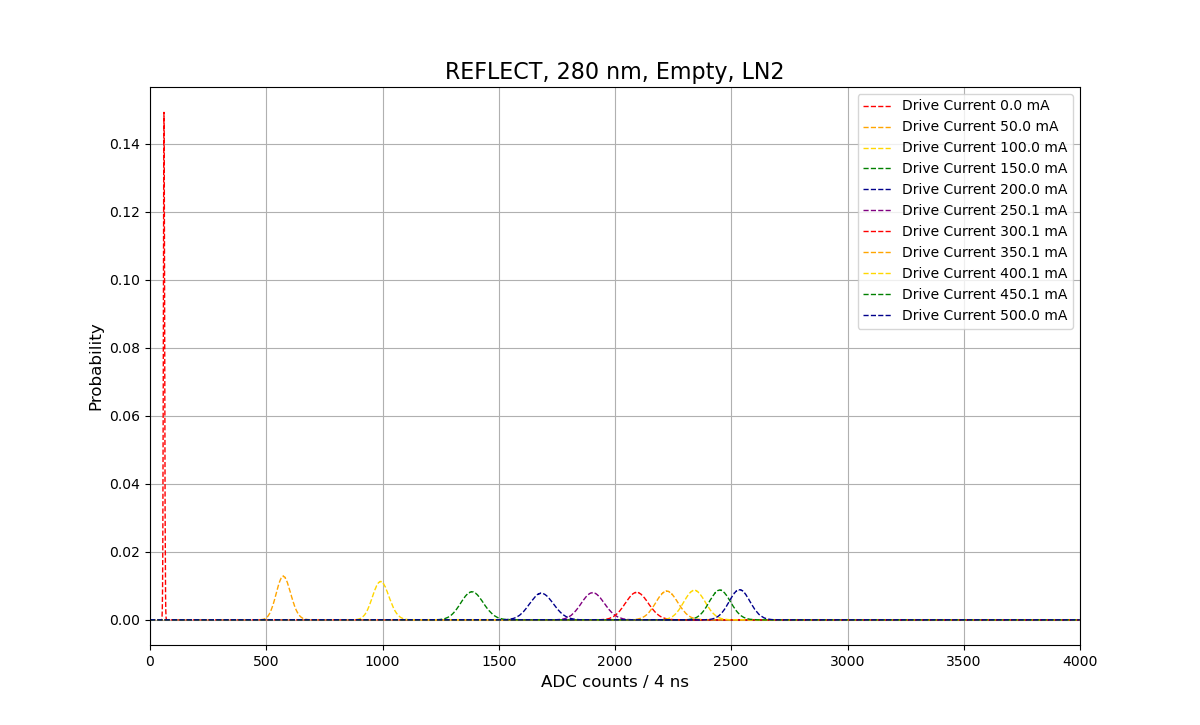

Elapsed time is 304.707 milliseconds.


In [53]:
tic()
inputfile=uproot.open("s521_l280_empty_coldwet_1.root")
verbose = True
opticalpowers_280_empty_coldwet_1 = np.array([])
labels_280_empty_coldwet_1 = []
ADCcounts_280_empty_coldwet_1 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280_empty_coldwet_1 = []
means_280_empty_coldwet_1 = np.array([])
stdevs_280_empty_coldwet_1 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280_empty_coldwet_1 = np.append(opticalpowers_280_empty_coldwet_1, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280_empty_coldwet_1 = np.append(opticalpowers_280_empty_coldwet_1, float(inputfile[key].title[-10:-5]))
    labels_280_empty_coldwet_1.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280_empty_coldwet_1.append(inputfile[key].values())
    means_280_empty_coldwet_1 = np.append(means_280_empty_coldwet_1, sum(Probabilities_280_empty_coldwet_1[-1]*ADCcounts_280_empty_coldwet_1))
    stdevs_280_empty_coldwet_1 = np.append(stdevs_280_empty_coldwet_1, np.sqrt(sum(Probabilities_280_empty_coldwet_1[-1]*(ADCcounts_280_empty_coldwet_1-means_280_empty_coldwet_1[-1])**2)))
    
if (verbose): 
    print("mean: ",means_280_empty_coldwet_1[-1], ", st.dev: ",stdevs_280_empty_coldwet_1[-1])
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 280 nm, Empty, LN2", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_280_empty_coldwet_1)):
        ax.errorbar(ADCcounts_280_empty_coldwet_1, Probabilities_280_empty_coldwet_1[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_280_empty_coldwet_1[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,4000)
    plt.grid()
    plt.show()
tocms()

mean:  732.9411726268901 , st.dev:  34.360615186684065


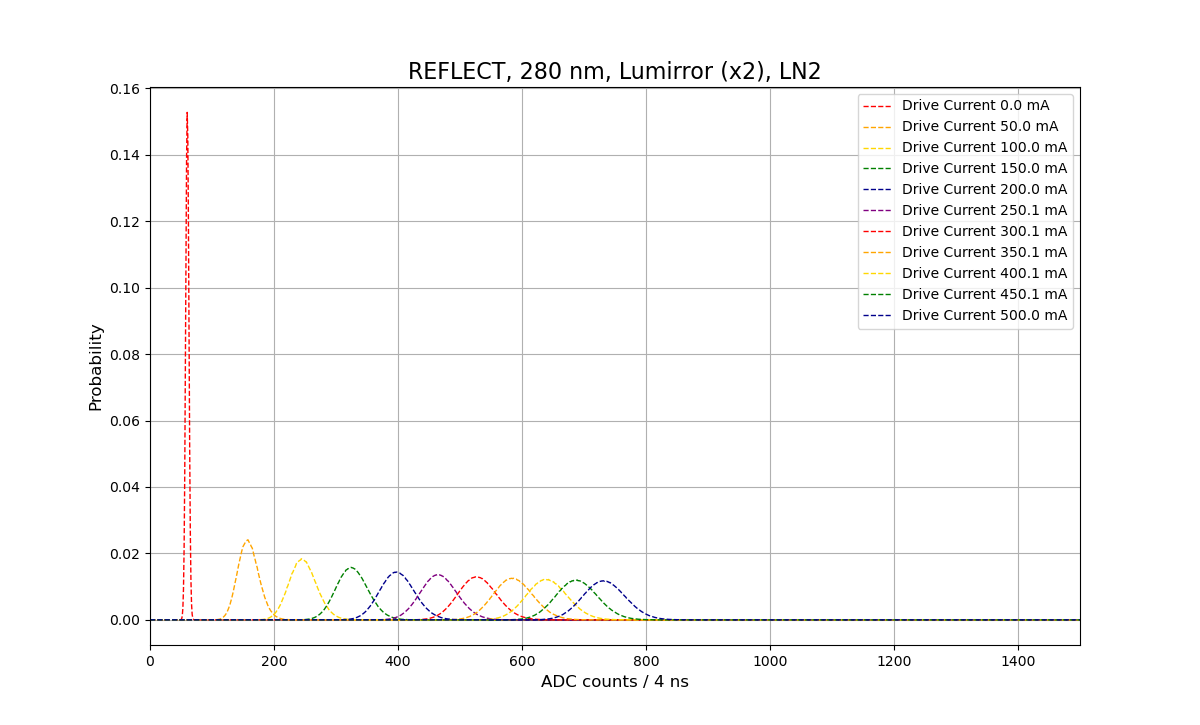

Elapsed time is 331.880 milliseconds.


In [54]:
tic()
inputfile=uproot.open("s521_l280_lum2_coldwet_1.root")
verbose = True
opticalpowers_280_lum2_coldwet_1 = np.array([])
labels_280_lum2_coldwet_1 = []
ADCcounts_280_lum2_coldwet_1 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280_lum2_coldwet_1 = []
means_280_lum2_coldwet_1 = np.array([])
stdevs_280_lum2_coldwet_1 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280_lum2_coldwet_1 = np.append(opticalpowers_280_lum2_coldwet_1, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280_lum2_coldwet_1 = np.append(opticalpowers_280_lum2_coldwet_1, float(inputfile[key].title[-10:-5]))
    labels_280_lum2_coldwet_1.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280_lum2_coldwet_1.append(inputfile[key].values())
    means_280_lum2_coldwet_1 = np.append(means_280_lum2_coldwet_1, sum(Probabilities_280_lum2_coldwet_1[-1]*ADCcounts_280_lum2_coldwet_1))
    stdevs_280_lum2_coldwet_1 = np.append(stdevs_280_lum2_coldwet_1, np.sqrt(sum(Probabilities_280_lum2_coldwet_1[-1]*(ADCcounts_280_lum2_coldwet_1-means_280_lum2_coldwet_1[-1])**2)))
    
if (verbose): 
    print("mean: ",means_280_lum2_coldwet_1[-1], ", st.dev: ",stdevs_280_lum2_coldwet_1[-1])
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 280 nm, Lumirror (x2), LN2", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_280_lum2_coldwet_1)):
        ax.errorbar(ADCcounts_280_lum2_coldwet_1, Probabilities_280_lum2_coldwet_1[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_280_lum2_coldwet_1[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,1500)
    plt.grid()
    plt.show()
tocms()

mean:  nan , st.dev:  nan


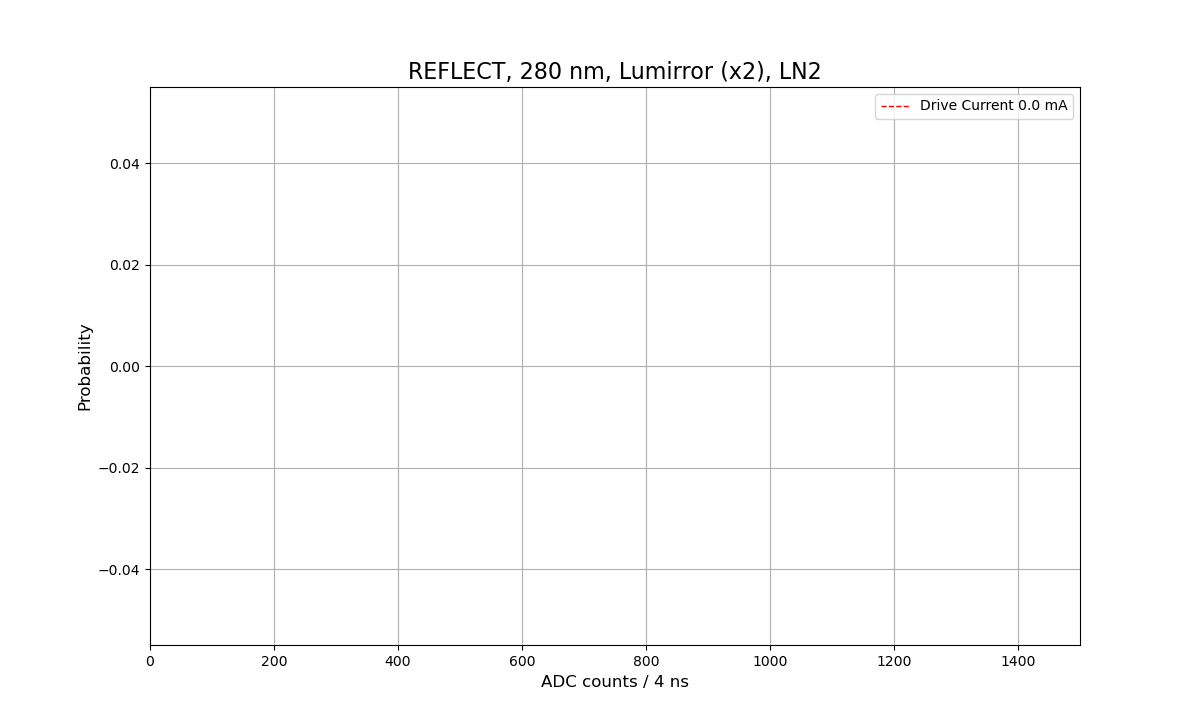

mean:  nan , st.dev:  nan


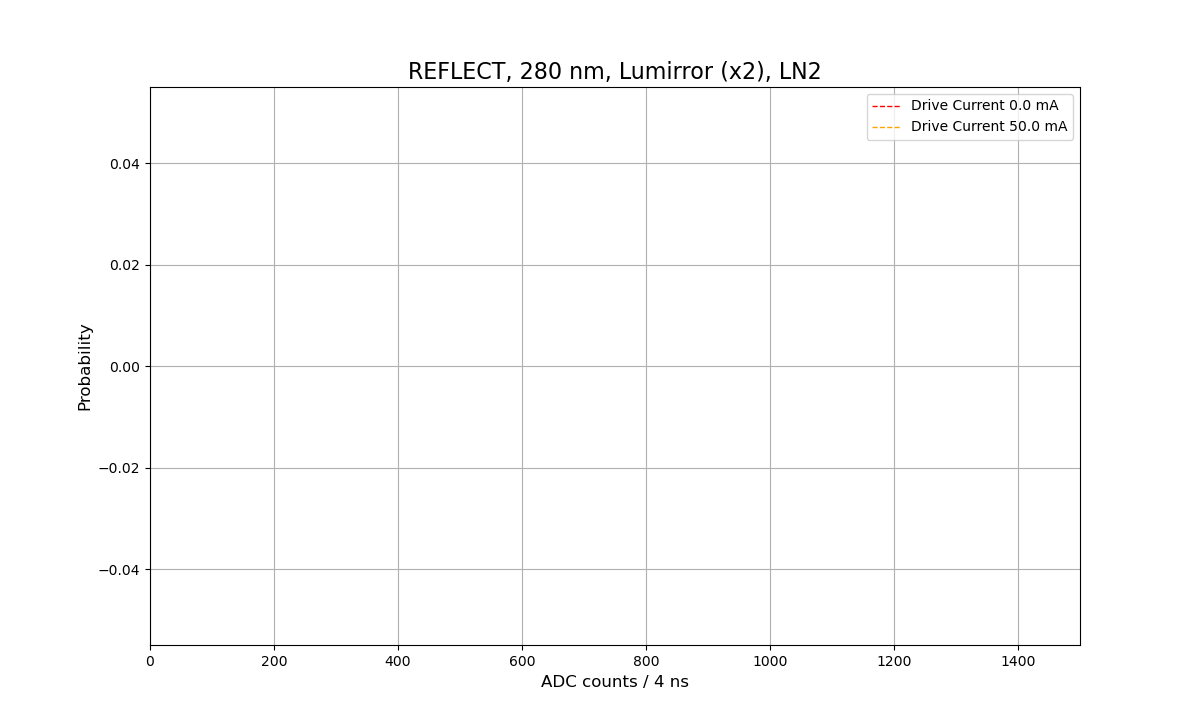

mean:  nan , st.dev:  nan


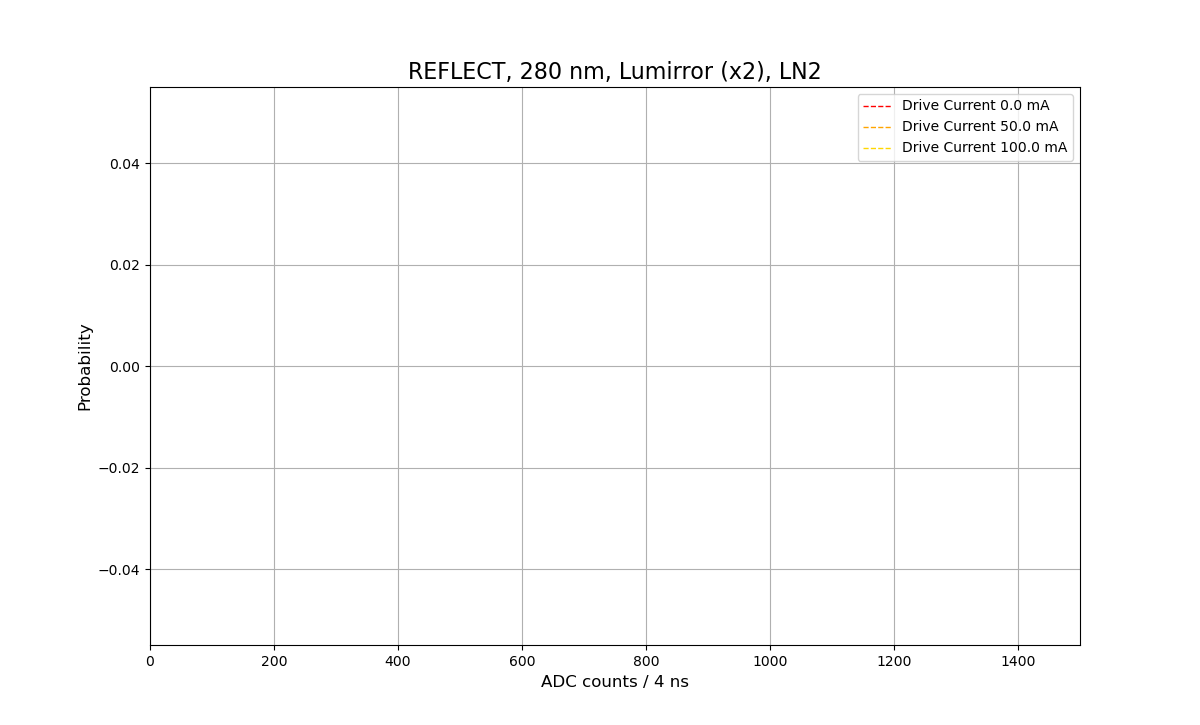

mean:  nan , st.dev:  nan


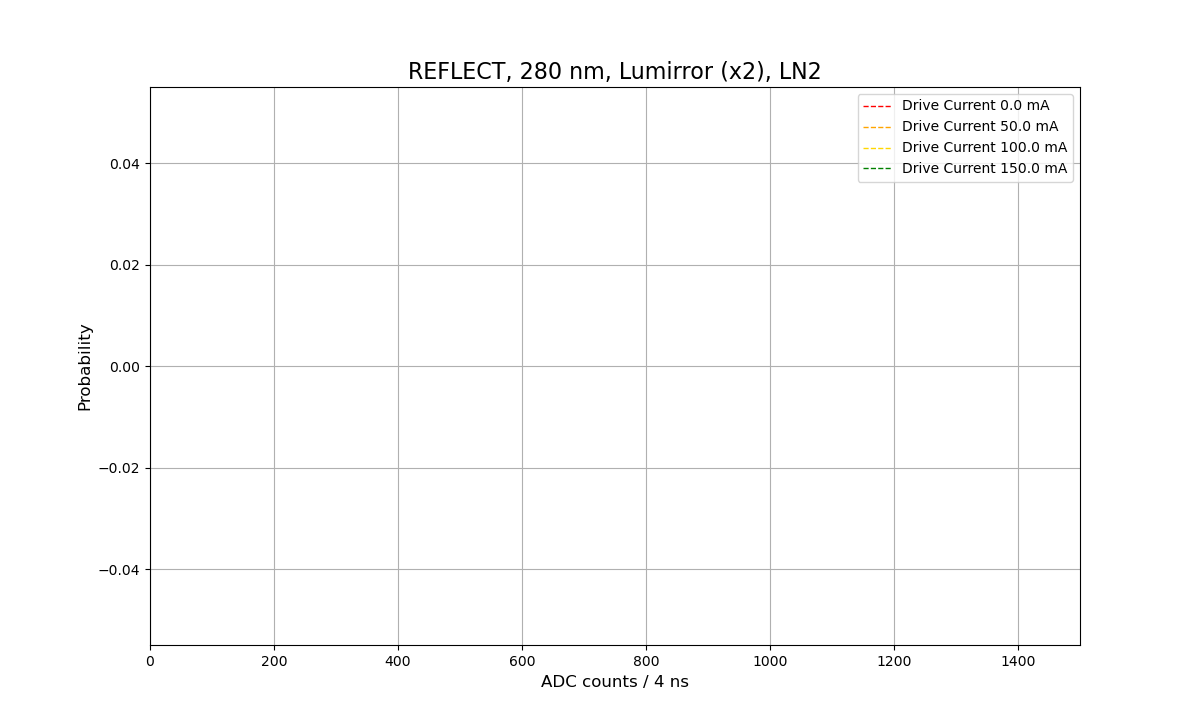

mean:  nan , st.dev:  nan


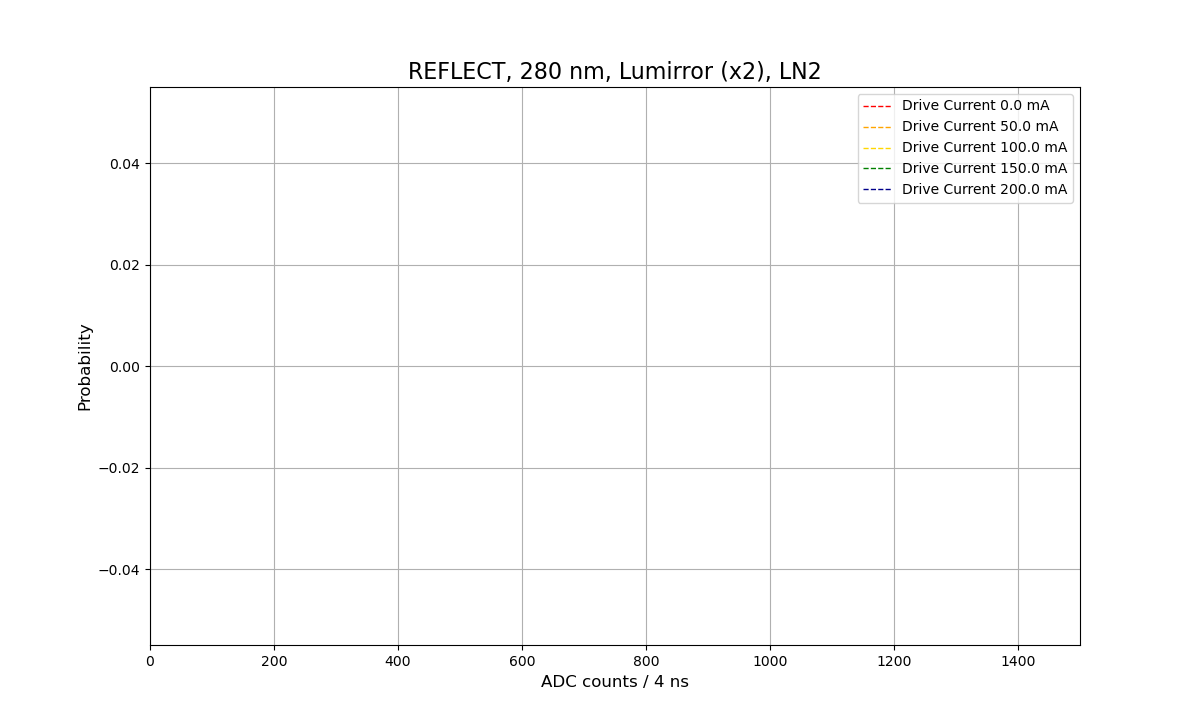

mean:  nan , st.dev:  nan


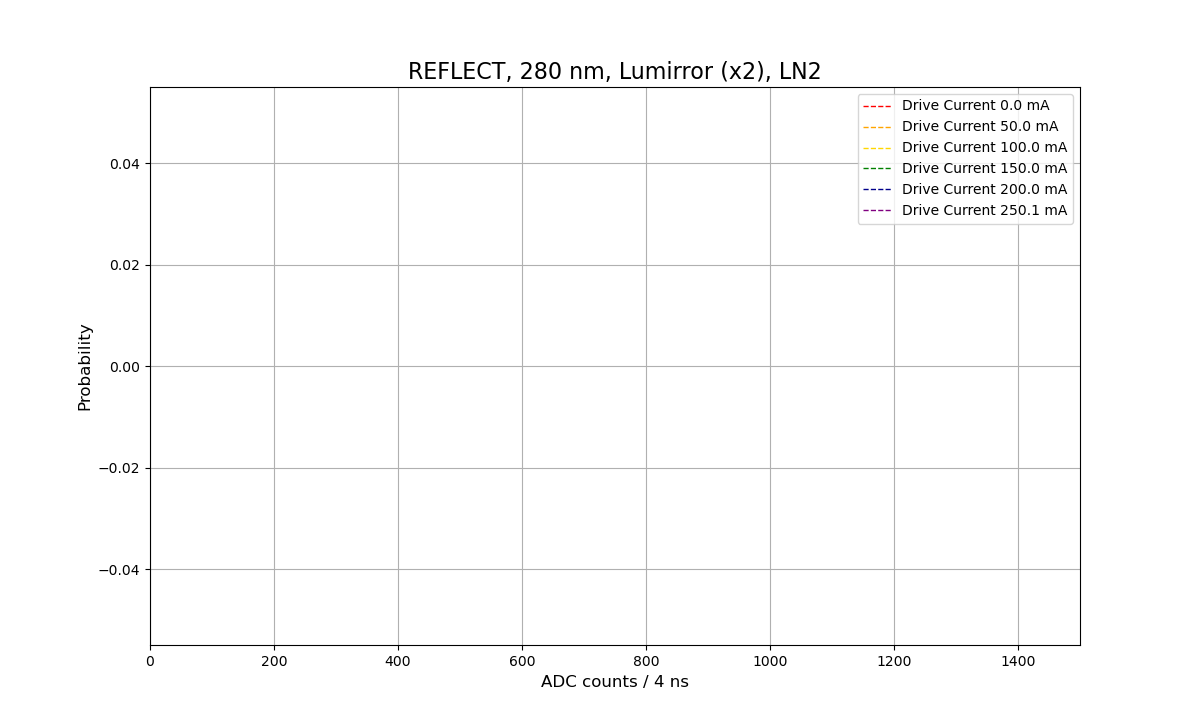

mean:  nan , st.dev:  nan


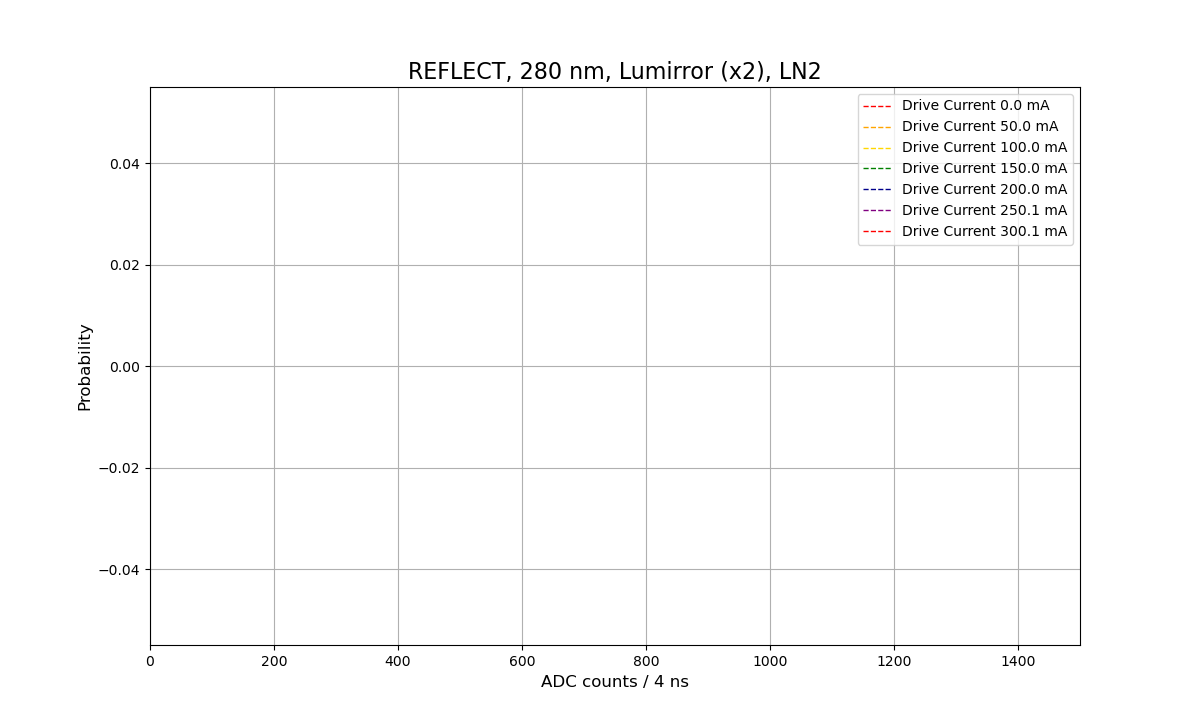

mean:  nan , st.dev:  nan


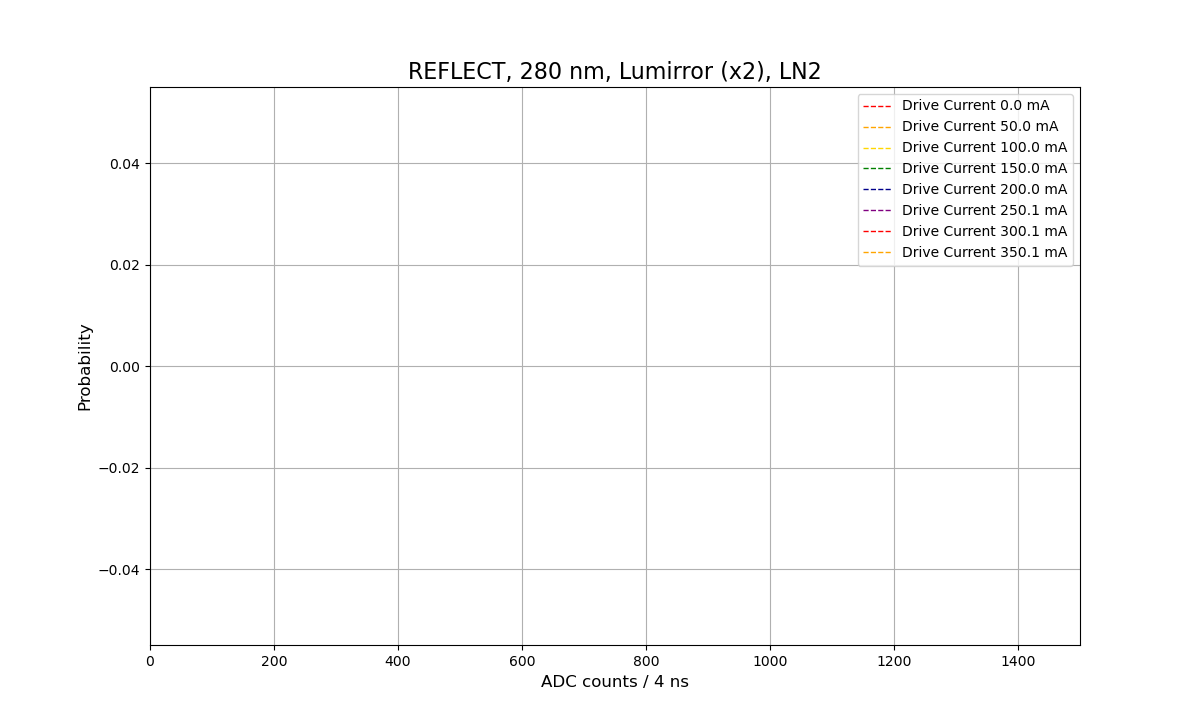

mean:  nan , st.dev:  nan


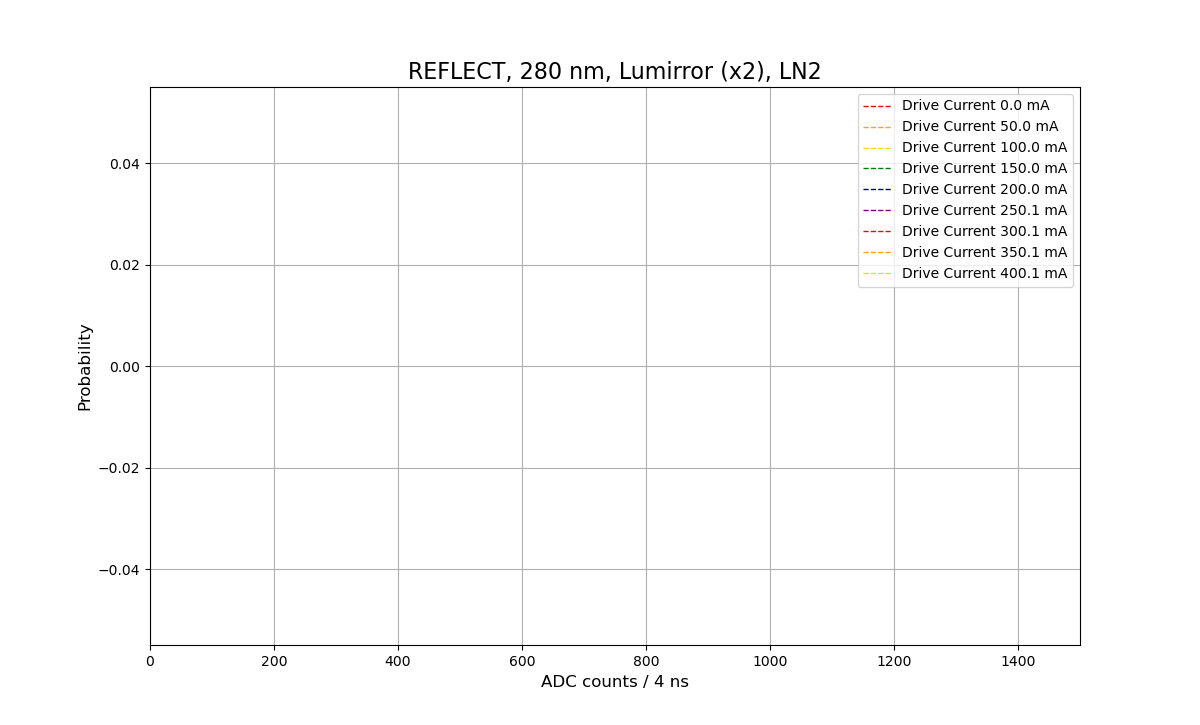

mean:  nan , st.dev:  nan


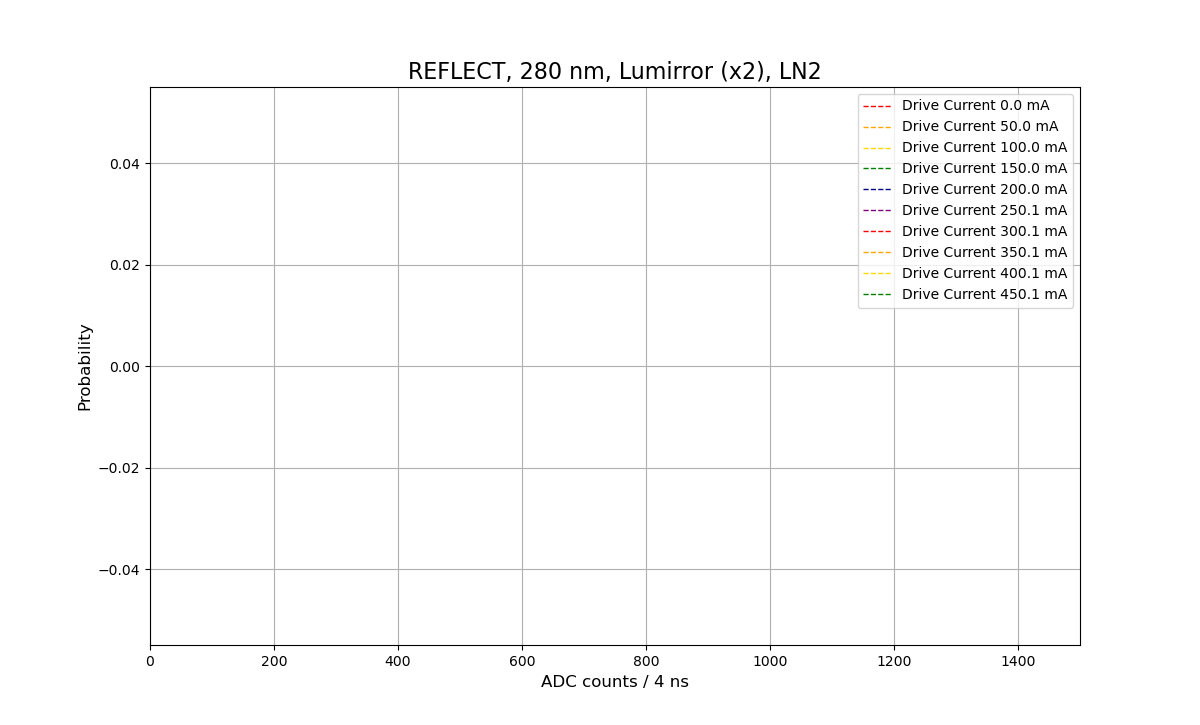

mean:  nan , st.dev:  nan


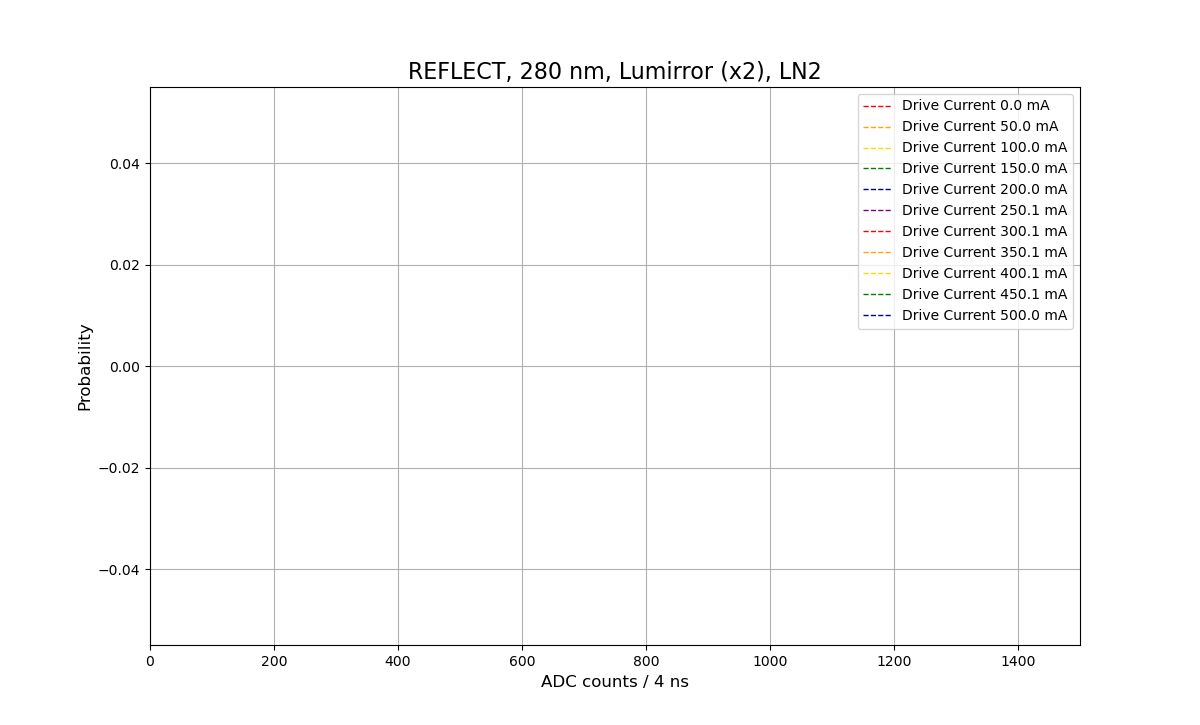

Elapsed time is 3136.679 milliseconds.


In [55]:
tic()
inputfile=uproot.open("s521_l280_lum2_coldwet.root")
verbose = True
opticalpowers_280_lum2_coldwet = np.array([])
labels_280_lum2_coldwet = []
ADCcounts_280_lum2_coldwet = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280_lum2_coldwet = []
means_280_lum2_coldwet = np.array([])
stdevs_280_lum2_coldwet = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280_lum2_coldwet = np.append(opticalpowers_280_lum2_coldwet, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280_lum2_coldwet = np.append(opticalpowers_280_lum2_coldwet, float(inputfile[key].title[-10:-5]))
    labels_280_lum2_coldwet.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280_lum2_coldwet.append(inputfile[key].values())
    means_280_lum2_coldwet = np.append(means_280_lum2_coldwet, sum(Probabilities_280_lum2_coldwet[-1]*ADCcounts_280_lum2_coldwet))
    stdevs_280_lum2_coldwet = np.append(stdevs_280_lum2_coldwet, np.sqrt(sum(Probabilities_280_lum2_coldwet[-1]*(ADCcounts_280_lum2_coldwet-means_280_lum2_coldwet[-1])**2)))
    
    if (verbose): 
        print("mean: ",means_280_lum2_coldwet[-1], ", st.dev: ",stdevs_280_lum2_coldwet[-1])
        plt.close()
        fig,ax = plt.subplots(1,1,figsize=(12,7.25))

        ax.set_title("REFLECT, 280 nm, Lumirror (x2), LN2", size=16)
        ax.set_xlabel("ADC counts / 4 ns", size=12)
        ax.set_ylabel("Probability", size=12)

        myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

        for graphnum in range(len(Probabilities_280_lum2_coldwet)):
            ax.errorbar(ADCcounts_280_lum2_coldwet, Probabilities_280_lum2_coldwet[graphnum], #yerr=DarkWarmData[:,2]*2,
                        fmt='--', linewidth=1, elinewidth=2, label=labels_280_lum2_coldwet[graphnum], color=myrainbow[graphnum%6])

        ax.legend(loc='upper right')
        ax.set_xlim(0,1500)
        plt.grid()
        plt.show()
tocms()

### 280 nm LP

In [56]:
tic()
inputfile=uproot.open("s521_l280lp_lum_warm.root")
verbose = False
opticalpowers_280lp_lum_warm = np.array([])
labels_280lp_lum_warm = []
ADCcounts_280lp_lum_warm = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280lp_lum_warm = []
means_280lp_lum_warm = np.array([])
stdevs_280lp_lum_warm = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280lp_lum_warm = np.append(opticalpowers_280lp_lum_warm, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280lp_lum_warm = np.append(opticalpowers_280lp_lum_warm, float(inputfile[key].title[-10:-5]))
    labels_280lp_lum_warm.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280lp_lum_warm.append(inputfile[key].values())
    means_280lp_lum_warm = np.append(means_280lp_lum_warm, sum(Probabilities_280lp_lum_warm[-1]*ADCcounts_280lp_lum_warm))
    stdevs_280lp_lum_warm = np.append(stdevs_280lp_lum_warm, np.sqrt(sum(Probabilities_280lp_lum_warm[-1]*(ADCcounts_280lp_lum_warm-means_280lp_lum_warm[-1])**2)))
    
    if (verbose): print("mean: ",means_280lp_lum_warm[-1], ", st.dev: ",stdevs_280lp_lum_warm[-1])
tocms()
if (verbose):
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 280 nm Low Power, Lumirror, warm", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_280lp_lum_warm)):
        ax.errorbar(ADCcounts_280lp_lum_warm, Probabilities_280lp_lum_warm[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_280lp_lum_warm[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,1500)
    plt.grid()
    plt.show()

Elapsed time is 206.726 milliseconds.


In [57]:
tic()
inputfile=uproot.open("s521_l280lp_lum2_warm.root")
verbose = False
opticalpowers_280lp_lum2_warm = np.array([])
labels_280lp_lum2_warm = []
ADCcounts_280lp_lum2_warm = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280lp_lum2_warm = []
means_280lp_lum2_warm = np.array([])
stdevs_280lp_lum2_warm = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280lp_lum2_warm = np.append(opticalpowers_280lp_lum2_warm, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280lp_lum2_warm = np.append(opticalpowers_280lp_lum2_warm, float(inputfile[key].title[-10:-5]))
    labels_280lp_lum2_warm.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280lp_lum2_warm.append(inputfile[key].values())
    means_280lp_lum2_warm = np.append(means_280lp_lum2_warm, sum(Probabilities_280lp_lum2_warm[-1]*ADCcounts_280lp_lum2_warm))
    stdevs_280lp_lum2_warm = np.append(stdevs_280lp_lum2_warm, np.sqrt(sum(Probabilities_280lp_lum2_warm[-1]*(ADCcounts_280lp_lum2_warm-means_280lp_lum2_warm[-1])**2)))
    
    if (verbose): print("mean: ",means_280lp_lum2_warm[-1], ", st.dev: ",stdevs_280lp_lum2_warm[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 280 nm Low Power, Lumirror (x2), warm", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_280lp_lum2_warm)):
        ax.errorbar(ADCcounts_280lp_lum2_warm, Probabilities_280lp_lum2_warm[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_280lp_lum2_warm[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,200)
    plt.grid()
    plt.show()

Elapsed time is 50.284 milliseconds.


In [58]:
tic()
inputfile=uproot.open("s521_l280lp_lum_coldwet.root")
verbose = False
opticalpowers_280lp_lum_coldwet = np.array([])
labels_280lp_lum_coldwet = []
ADCcounts_280lp_lum_coldwet = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280lp_lum_coldwet = []
means_280lp_lum_coldwet = np.array([])
stdevs_280lp_lum_coldwet = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280lp_lum_coldwet = np.append(opticalpowers_280lp_lum_coldwet, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280lp_lum_coldwet = np.append(opticalpowers_280lp_lum_coldwet, float(inputfile[key].title[-10:-5]))
    labels_280lp_lum_coldwet.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280lp_lum_coldwet.append(inputfile[key].values())
    means_280lp_lum_coldwet = np.append(means_280lp_lum_coldwet, sum(Probabilities_280lp_lum_coldwet[-1]*ADCcounts_280lp_lum_coldwet))
    stdevs_280lp_lum_coldwet = np.append(stdevs_280lp_lum_coldwet, np.sqrt(sum(Probabilities_280lp_lum_coldwet[-1]*(ADCcounts_280lp_lum_coldwet-means_280lp_lum_coldwet[-1])**2)))
    
    if (verbose): print("mean: ",means_280lp_lum_coldwet[-1], ", st.dev: ",stdevs_280lp_lum_coldwet[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 280 nm Low Power, Lumirror, LN2", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_280lp_lum_coldwet)):
        ax.errorbar(ADCcounts_280lp_lum_coldwet, Probabilities_280lp_lum_coldwet[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_280lp_lum_coldwet[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,200)
    plt.grid()
    plt.show()

Elapsed time is 52.807 milliseconds.


In [59]:
tic()
inputfile=uproot.open("s521_l280lp_lum_colddry.root")
verbose = False
opticalpowers_280lp_lum_colddry = np.array([])
labels_280lp_lum_colddry = []
ADCcounts_280lp_lum_colddry = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280lp_lum_colddry = []
means_280lp_lum_colddry = np.array([])
stdevs_280lp_lum_colddry = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280lp_lum_colddry = np.append(opticalpowers_280lp_lum_colddry, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280lp_lum_colddry = np.append(opticalpowers_280lp_lum_colddry, float(inputfile[key].title[-10:-5]))
    labels_280lp_lum_colddry.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280lp_lum_colddry.append(inputfile[key].values())
    means_280lp_lum_colddry = np.append(means_280lp_lum_colddry, sum(Probabilities_280lp_lum_colddry[-1]*ADCcounts_280lp_lum_colddry))
    stdevs_280lp_lum_colddry = np.append(stdevs_280lp_lum_colddry, np.sqrt(sum(Probabilities_280lp_lum_colddry[-1]*(ADCcounts_280lp_lum_colddry-means_280lp_lum_colddry[-1])**2)))
    
    if (verbose): print("mean: ",means_280lp_lum_colddry[-1], ", st.dev: ",stdevs_280lp_lum_colddry[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 280 nm Low Power, Lumirror, Cold", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_280lp_lum_colddry)):
        ax.errorbar(ADCcounts_280lp_lum_colddry, Probabilities_280lp_lum_colddry[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_280lp_lum_colddry[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,200)
    plt.grid()
    plt.show()

Elapsed time is 64.662 milliseconds.


In [60]:
tic()
inputfile=uproot.open("s521_l280lp_foil_coldwet.root")
verbose = False
opticalpowers_280lp_foil_coldwet = np.array([])
labels_280lp_foil_coldwet = []
ADCcounts_280lp_foil_coldwet = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280lp_foil_coldwet = []
means_280lp_foil_coldwet = np.array([])
stdevs_280lp_foil_coldwet = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280lp_foil_coldwet = np.append(opticalpowers_280lp_foil_coldwet, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280lp_foil_coldwet = np.append(opticalpowers_280lp_foil_coldwet, float(inputfile[key].title[-10:-5]))
    labels_280lp_foil_coldwet.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280lp_foil_coldwet.append(inputfile[key].values())
    means_280lp_foil_coldwet = np.append(means_280lp_foil_coldwet, sum(Probabilities_280lp_foil_coldwet[-1]*ADCcounts_280lp_foil_coldwet))
    stdevs_280lp_foil_coldwet = np.append(stdevs_280lp_foil_coldwet, np.sqrt(sum(Probabilities_280lp_foil_coldwet[-1]*(ADCcounts_280lp_foil_coldwet-means_280lp_foil_coldwet[-1])**2)))
    
    if (verbose): print("mean: ",means_280lp_foil_coldwet[-1], ", st.dev: ",stdevs_280lp_foil_coldwet[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 280 nm Low Power, Foil, LN2", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_280lp_foil_coldwet)):
        ax.errorbar(ADCcounts_280lp_foil_coldwet, Probabilities_280lp_foil_coldwet[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_280lp_foil_coldwet[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,200)
    plt.grid()
    plt.show()

Elapsed time is 67.266 milliseconds.


In [61]:
tic()
inputfile=uproot.open("s521_l280lp_foil_colddry.root")
verbose = False
opticalpowers_280lp_foil_colddry = np.array([])
labels_280lp_foil_colddry = []
ADCcounts_280lp_foil_colddry = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280lp_foil_colddry = []
means_280lp_foil_colddry = np.array([])
stdevs_280lp_foil_colddry = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280lp_foil_colddry = np.append(opticalpowers_280lp_foil_colddry, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280lp_foil_colddry = np.append(opticalpowers_280lp_foil_colddry, float(inputfile[key].title[-10:-5]))
    labels_280lp_foil_colddry.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280lp_foil_colddry.append(inputfile[key].values())
    means_280lp_foil_colddry = np.append(means_280lp_foil_colddry, sum(Probabilities_280lp_foil_colddry[-1]*ADCcounts_280lp_foil_colddry))
    stdevs_280lp_foil_colddry = np.append(stdevs_280lp_foil_colddry, np.sqrt(sum(Probabilities_280lp_foil_colddry[-1]*(ADCcounts_280lp_foil_colddry-means_280lp_foil_colddry[-1])**2)))
    
    if (verbose): print("mean: ",means_280lp_foil_colddry[-1], ", st.dev: ",stdevs_280lp_foil_colddry[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 280 nm Low Power, Foil, Cold", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_280lp_foil_colddry)):
        ax.errorbar(ADCcounts_280lp_foil_colddry, Probabilities_280lp_foil_colddry[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_280lp_foil_colddry[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,200)
    plt.grid()
    plt.show()

Elapsed time is 57.431 milliseconds.


In [62]:
tic()
inputfile=uproot.open("s521_l280lp_foil_warm.root")
verbose = False
opticalpowers_280lp_foil_warm = np.array([])
labels_280lp_foil_warm = []
ADCcounts_280lp_foil_warm = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280lp_foil_warm = []
means_280lp_foil_warm = np.array([])
stdevs_280lp_foil_warm = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280lp_foil_warm = np.append(opticalpowers_280lp_foil_warm, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280lp_foil_warm = np.append(opticalpowers_280lp_foil_warm, float(inputfile[key].title[-10:-5]))
    labels_280lp_foil_warm.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280lp_foil_warm.append(inputfile[key].values())
    means_280lp_foil_warm = np.append(means_280lp_foil_warm, sum(Probabilities_280lp_foil_warm[-1]*ADCcounts_280lp_foil_warm))
    stdevs_280lp_foil_warm = np.append(stdevs_280lp_foil_warm, np.sqrt(sum(Probabilities_280lp_foil_warm[-1]*(ADCcounts_280lp_foil_warm-means_280lp_foil_warm[-1])**2)))
    
    if (verbose): print("mean: ",means_280lp_foil_warm[-1], ", st.dev: ",stdevs_280lp_foil_warm[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 280 nm Low Power, Foil, Warm", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_280lp_foil_warm)):
        ax.errorbar(ADCcounts_280lp_foil_warm, Probabilities_280lp_foil_warm[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_280lp_foil_warm[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,200)
    plt.grid()
    plt.show()

Elapsed time is 57.897 milliseconds.


In [63]:
tic()
inputfile=uproot.open("s521_l280lp_empty_warm.root")
verbose = False
opticalpowers_280lp_empty_warm = np.array([])
labels_280lp_empty_warm = []
ADCcounts_280lp_empty_warm = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280lp_empty_warm = []
means_280lp_empty_warm = np.array([])
stdevs_280lp_empty_warm = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280lp_empty_warm = np.append(opticalpowers_280lp_empty_warm, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280lp_empty_warm = np.append(opticalpowers_280lp_empty_warm, float(inputfile[key].title[-10:-5]))
    labels_280lp_empty_warm.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280lp_empty_warm.append(inputfile[key].values())
    means_280lp_empty_warm = np.append(means_280lp_empty_warm, sum(Probabilities_280lp_empty_warm[-1]*ADCcounts_280lp_empty_warm))
    stdevs_280lp_empty_warm = np.append(stdevs_280lp_empty_warm, np.sqrt(sum(Probabilities_280lp_empty_warm[-1]*(ADCcounts_280lp_empty_warm-means_280lp_empty_warm[-1])**2)))
    
    if (verbose): print("mean: ",means_280lp_empty_warm[-1], ", st.dev: ",stdevs_280lp_empty_warm[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 280 nm Low Power, Empty, Warm", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_280lp_empty_warm)):
        ax.errorbar(ADCcounts_280lp_empty_warm, Probabilities_280lp_empty_warm[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_280lp_empty_warm[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,200)
    plt.grid()
    plt.show()

Elapsed time is 55.663 milliseconds.


In [64]:
tic()
inputfile=uproot.open("s521_l280lp_empty_colddry.root")
verbose = False
opticalpowers_280lp_empty_colddry = np.array([])
labels_280lp_empty_colddry = []
ADCcounts_280lp_empty_colddry = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280lp_empty_colddry = []
means_280lp_empty_colddry = np.array([])
stdevs_280lp_empty_colddry = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280lp_empty_colddry = np.append(opticalpowers_280lp_empty_colddry, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280lp_empty_colddry = np.append(opticalpowers_280lp_empty_colddry, float(inputfile[key].title[-10:-5]))
    labels_280lp_empty_colddry.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280lp_empty_colddry.append(inputfile[key].values())
    means_280lp_empty_colddry = np.append(means_280lp_empty_colddry, sum(Probabilities_280lp_empty_colddry[-1]*ADCcounts_280lp_empty_colddry))
    stdevs_280lp_empty_colddry = np.append(stdevs_280lp_empty_colddry, np.sqrt(sum(Probabilities_280lp_empty_colddry[-1]*(ADCcounts_280lp_empty_colddry-means_280lp_empty_colddry[-1])**2)))
    
    if (verbose): print("mean: ",means_280lp_empty_colddry[-1], ", st.dev: ",stdevs_280lp_empty_colddry[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 280 nm Low Power, Empty, Cold", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_280lp_empty_colddry)):
        ax.errorbar(ADCcounts_280lp_empty_colddry, Probabilities_280lp_empty_colddry[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_280lp_empty_colddry[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,200)
    plt.grid()
    plt.show()

Elapsed time is 60.956 milliseconds.


mean:  60.78706379803732 , st.dev:  2.7444096355793257
mean:  64.19630440146832 , st.dev:  4.3072165832250064
mean:  67.63266646624945 , st.dev:  5.4587635883275425
mean:  71.41454997033475 , st.dev:  6.037309189188659
mean:  74.75208884890093 , st.dev:  6.548134753952792
mean:  77.82105682679206 , st.dev:  6.514677928229822
mean:  80.8486685951909 , st.dev:  6.743056761439443
mean:  83.93245841126804 , st.dev:  5.439229930900851
mean:  86.71359428749457 , st.dev:  7.513388523374805
mean:  89.37003411701988 , st.dev:  8.592399418674946
mean:  91.62029170777166 , st.dev:  8.83268420505788
Elapsed time is 72.835 milliseconds.


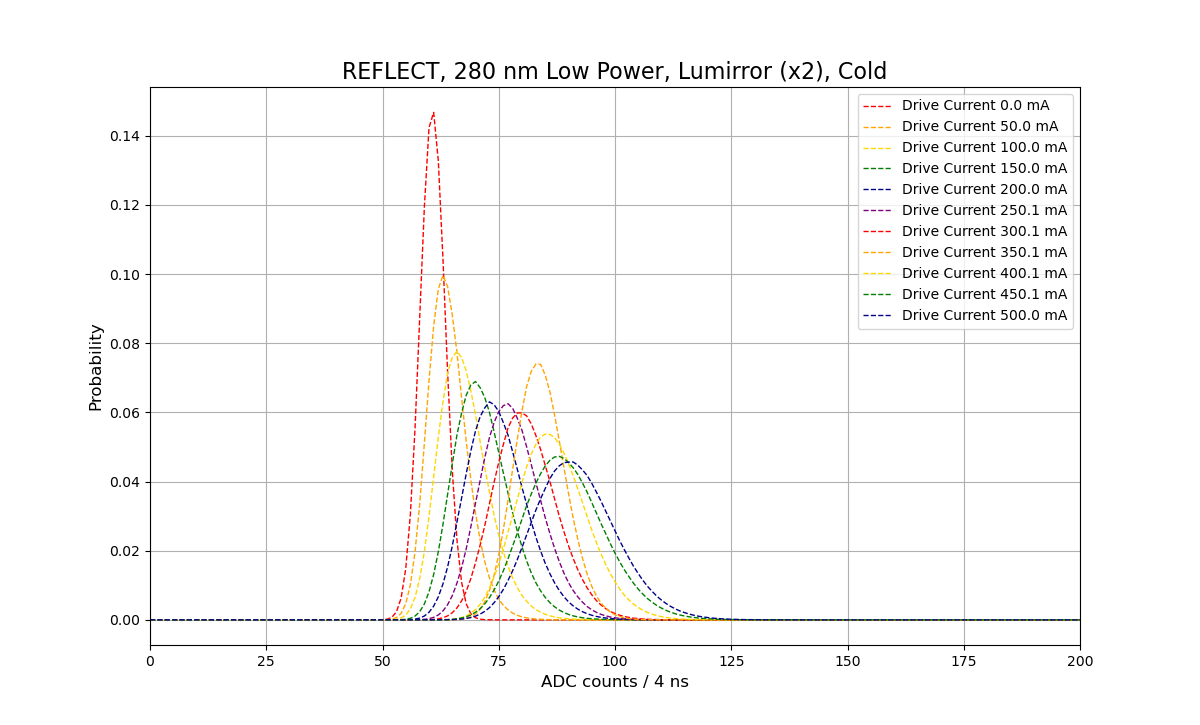

In [65]:
tic()
inputfile=uproot.open("s521_l280lp_lum2_colddry.root")
verbose = True
opticalpowers_280lp_lum2_colddry = np.array([])
labels_280lp_lum2_colddry = []
ADCcounts_280lp_lum2_colddry = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280lp_lum2_colddry = []
means_280lp_lum2_colddry = np.array([])
stdevs_280lp_lum2_colddry = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280lp_lum2_colddry = np.append(opticalpowers_280lp_lum2_colddry, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280lp_lum2_colddry = np.append(opticalpowers_280lp_lum2_colddry, float(inputfile[key].title[-10:-5]))
    labels_280lp_lum2_colddry.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280lp_lum2_colddry.append(inputfile[key].values())
    means_280lp_lum2_colddry = np.append(means_280lp_lum2_colddry, sum(Probabilities_280lp_lum2_colddry[-1]*ADCcounts_280lp_lum2_colddry))
    stdevs_280lp_lum2_colddry = np.append(stdevs_280lp_lum2_colddry, np.sqrt(sum(Probabilities_280lp_lum2_colddry[-1]*(ADCcounts_280lp_lum2_colddry-means_280lp_lum2_colddry[-1])**2)))
    
    if (verbose): print("mean: ",means_280lp_lum2_colddry[-1], ", st.dev: ",stdevs_280lp_lum2_colddry[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 280 nm Low Power, Lumirror (x2), Cold", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_280lp_lum2_colddry)):
        ax.errorbar(ADCcounts_280lp_lum2_colddry, Probabilities_280lp_lum2_colddry[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_280lp_lum2_colddry[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,200)
    plt.grid()
    plt.show()

In [66]:
tic()
inputfile=uproot.open("s521_l280lp_lum2_coldwet.root")
verbose = False
opticalpowers_280lp_lum2_coldwet = np.array([])
labels_280lp_lum2_coldwet = []
ADCcounts_280lp_lum2_coldwet = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280lp_lum2_coldwet = []
means_280lp_lum2_coldwet = np.array([])
stdevs_280lp_lum2_coldwet = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280lp_lum2_coldwet = np.append(opticalpowers_280lp_lum2_coldwet, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280lp_lum2_coldwet = np.append(opticalpowers_280lp_lum2_coldwet, float(inputfile[key].title[-10:-5]))
    labels_280lp_lum2_coldwet.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280lp_lum2_coldwet.append(inputfile[key].values())
    means_280lp_lum2_coldwet = np.append(means_280lp_lum2_coldwet, sum(Probabilities_280lp_lum2_coldwet[-1]*ADCcounts_280lp_lum2_coldwet))
    stdevs_280lp_lum2_coldwet = np.append(stdevs_280lp_lum2_coldwet, np.sqrt(sum(Probabilities_280lp_lum2_coldwet[-1]*(ADCcounts_280lp_lum2_coldwet-means_280lp_lum2_coldwet[-1])**2)))
    
    if (verbose): print("mean: ",means_280lp_lum2_coldwet[-1], ", st.dev: ",stdevs_280lp_lum2_coldwet[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 280 nm Low Power, Lumirror (x2), LN2", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_280lp_lum2_coldwet)):
        ax.errorbar(ADCcounts_280lp_lum2_coldwet, Probabilities_280lp_lum2_coldwet[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_280lp_lum2_coldwet[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,200)
    plt.grid()
    plt.show()

Elapsed time is 59.187 milliseconds.


In [67]:
tic()
inputfile=uproot.open("s521_l280lp_empty_coldwet.root")
verbose = False
opticalpowers_280lp_empty_coldwet = np.array([])
labels_280lp_empty_coldwet = []
ADCcounts_280lp_empty_coldwet = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280lp_empty_coldwet = []
means_280lp_empty_coldwet = np.array([])
stdevs_280lp_empty_coldwet = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280lp_empty_coldwet = np.append(opticalpowers_280lp_empty_coldwet, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280lp_empty_coldwet = np.append(opticalpowers_280lp_empty_coldwet, float(inputfile[key].title[-10:-5]))
    labels_280lp_empty_coldwet.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280lp_empty_coldwet.append(inputfile[key].values())
    means_280lp_empty_coldwet = np.append(means_280lp_empty_coldwet, sum(Probabilities_280lp_empty_coldwet[-1]*ADCcounts_280lp_empty_coldwet))
    stdevs_280lp_empty_coldwet = np.append(stdevs_280lp_empty_coldwet, np.sqrt(sum(Probabilities_280lp_empty_coldwet[-1]*(ADCcounts_280lp_empty_coldwet-means_280lp_empty_coldwet[-1])**2)))
    
    if (verbose): print("mean: ",means_280lp_empty_coldwet[-1], ", st.dev: ",stdevs_280lp_empty_coldwet[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 280 nm Low Power, Empty, LN2", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_280lp_empty_coldwet)):
        ax.errorbar(ADCcounts_280lp_empty_coldwet, Probabilities_280lp_empty_coldwet[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_280lp_empty_coldwet[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,200)
    plt.grid()
    plt.show()

Elapsed time is 66.447 milliseconds.


In [68]:
tic()
inputfile=uproot.open("s521_l280lp_empty_coldwet_1.root")
verbose = False
opticalpowers_280lp_empty_coldwet_1 = np.array([])
labels_280lp_empty_coldwet_1 = []
ADCcounts_280lp_empty_coldwet_1 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280lp_empty_coldwet_1 = []
means_280lp_empty_coldwet_1 = np.array([])
stdevs_280lp_empty_coldwet_1 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280lp_empty_coldwet_1 = np.append(opticalpowers_280lp_empty_coldwet_1, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280lp_empty_coldwet_1 = np.append(opticalpowers_280lp_empty_coldwet_1, float(inputfile[key].title[-10:-5]))
    labels_280lp_empty_coldwet_1.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280lp_empty_coldwet_1.append(inputfile[key].values())
    means_280lp_empty_coldwet_1 = np.append(means_280lp_empty_coldwet_1, sum(Probabilities_280lp_empty_coldwet_1[-1]*ADCcounts_280lp_empty_coldwet_1))
    stdevs_280lp_empty_coldwet_1 = np.append(stdevs_280lp_empty_coldwet_1, np.sqrt(sum(Probabilities_280lp_empty_coldwet_1[-1]*(ADCcounts_280lp_empty_coldwet_1-means_280lp_empty_coldwet_1[-1])**2)))
    
    if (verbose): print("mean: ",means_280lp_empty_coldwet_1[-1], ", st.dev: ",stdevs_280lp_empty_coldwet_1[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 280 nm Low Power, Empty, LN2", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_280lp_empty_coldwet_1)):
        ax.errorbar(ADCcounts_280lp_empty_coldwet_1, Probabilities_280lp_empty_coldwet_1[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_280lp_empty_coldwet_1[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,200)
    plt.grid()
    plt.show()

Elapsed time is 68.768 milliseconds.


In [69]:
tic()
inputfile=uproot.open("s521_l280lp_lum2_coldwet_1.root")
verbose = False
opticalpowers_280lp_lum2_coldwet_1 = np.array([])
labels_280lp_lum2_coldwet_1 = []
ADCcounts_280lp_lum2_coldwet_1 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280lp_lum2_coldwet_1 = []
means_280lp_lum2_coldwet_1 = np.array([])
stdevs_280lp_lum2_coldwet_1 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280lp_lum2_coldwet_1 = np.append(opticalpowers_280lp_lum2_coldwet_1, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280lp_lum2_coldwet_1 = np.append(opticalpowers_280lp_lum2_coldwet_1, float(inputfile[key].title[-10:-5]))
    labels_280lp_lum2_coldwet_1.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280lp_lum2_coldwet_1.append(inputfile[key].values())
    means_280lp_lum2_coldwet_1 = np.append(means_280lp_lum2_coldwet_1, sum(Probabilities_280lp_lum2_coldwet_1[-1]*ADCcounts_280lp_lum2_coldwet_1))
    stdevs_280lp_lum2_coldwet_1 = np.append(stdevs_280lp_lum2_coldwet_1, np.sqrt(sum(Probabilities_280lp_lum2_coldwet_1[-1]*(ADCcounts_280lp_lum2_coldwet_1-means_280lp_lum2_coldwet_1[-1])**2)))
    
    if (verbose): print("mean: ",means_280lp_lum2_coldwet_1[-1], ", st.dev: ",stdevs_280lp_lum2_coldwet_1[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 280 nm Low Power, Lumirror (x2), LN2", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_280lp_lum2_coldwet_1)):
        ax.errorbar(ADCcounts_280lp_lum2_coldwet_1, Probabilities_280lp_lum2_coldwet_1[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_280lp_lum2_coldwet_1[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,200)
    plt.grid()
    plt.show()

Elapsed time is 62.829 milliseconds.


mean:  59.862113846200884 , st.dev:  2.69543280363456
mean:  64.61103047218396 , st.dev:  4.5030165452539945
mean:  67.84292347226501 , st.dev:  5.659741116905225
mean:  71.60108047438267 , st.dev:  6.557038347112447
mean:  74.59959524363653 , st.dev:  7.305986583958171
mean:  77.83239210330791 , st.dev:  7.936766218288242
mean:  80.85335656731051 , st.dev:  8.482816167490236
mean:  83.7157741448353 , st.dev:  8.982643224545079
mean:  86.69196209154379 , st.dev:  9.42496469944719
mean:  89.35123033707342 , st.dev:  9.80030940793076
mean:  91.51828561303651 , st.dev:  10.165813700227119
Elapsed time is 66.737 milliseconds.


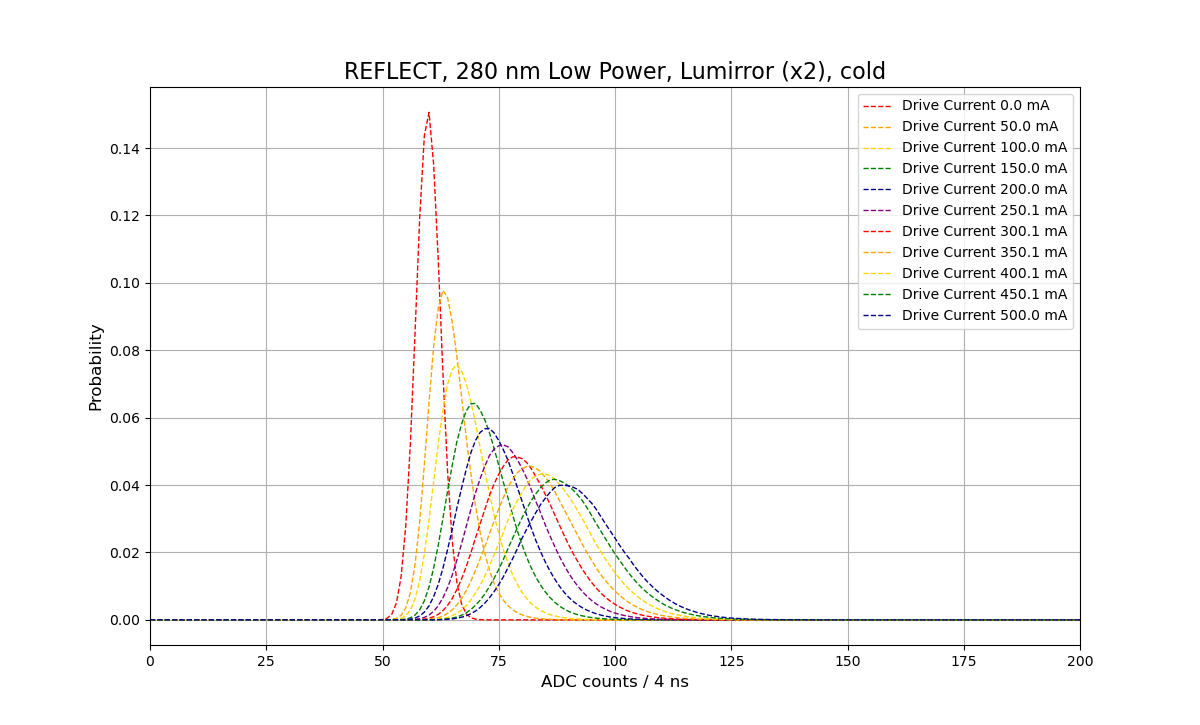

In [70]:
tic()
inputfile=uproot.open("s521_l280lp_lum2_colddry_1.root")
verbose = True
opticalpowers_280lp_lum2_colddry_1 = np.array([])
labels_280lp_lum2_colddry_1 = []
ADCcounts_280lp_lum2_colddry_1 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280lp_lum2_colddry_1 = []
means_280lp_lum2_colddry_1 = np.array([])
stdevs_280lp_lum2_colddry_1 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280lp_lum2_colddry_1 = np.append(opticalpowers_280lp_lum2_colddry_1, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280lp_lum2_colddry_1 = np.append(opticalpowers_280lp_lum2_colddry_1, float(inputfile[key].title[-10:-5]))
    labels_280lp_lum2_colddry_1.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280lp_lum2_colddry_1.append(inputfile[key].values())
    means_280lp_lum2_colddry_1 = np.append(means_280lp_lum2_colddry_1, sum(Probabilities_280lp_lum2_colddry_1[-1]*ADCcounts_280lp_lum2_colddry_1))
    stdevs_280lp_lum2_colddry_1 = np.append(stdevs_280lp_lum2_colddry_1, np.sqrt(sum(Probabilities_280lp_lum2_colddry_1[-1]*(ADCcounts_280lp_lum2_colddry_1-means_280lp_lum2_colddry_1[-1])**2)))
    
    if (verbose): print("mean: ",means_280lp_lum2_colddry_1[-1], ", st.dev: ",stdevs_280lp_lum2_colddry_1[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 280 nm Low Power, Lumirror (x2), cold", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_280lp_lum2_colddry_1)):
        ax.errorbar(ADCcounts_280lp_lum2_colddry_1, Probabilities_280lp_lum2_colddry_1[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_280lp_lum2_colddry_1[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,200)
    plt.grid()
    plt.show()

In [71]:
tic()
inputfile=uproot.open("s521_l280lp_empty_colddry_1.root")
verbose = False
opticalpowers_280lp_empty_colddry_1 = np.array([])
labels_280lp_empty_colddry_1 = []
ADCcounts_280lp_empty_colddry_1 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_280lp_empty_colddry_1 = []
means_280lp_empty_colddry_1 = np.array([])
stdevs_280lp_empty_colddry_1 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_280lp_empty_colddry_1 = np.append(opticalpowers_280lp_empty_colddry_1, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_280lp_empty_colddry_1 = np.append(opticalpowers_280lp_empty_colddry_1, float(inputfile[key].title[-10:-5]))
    labels_280lp_empty_colddry_1.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_280lp_empty_colddry_1.append(inputfile[key].values())
    means_280lp_empty_colddry_1 = np.append(means_280lp_empty_colddry_1, sum(Probabilities_280lp_empty_colddry_1[-1]*ADCcounts_280lp_empty_colddry_1))
    stdevs_280lp_empty_colddry_1 = np.append(stdevs_280lp_empty_colddry_1, np.sqrt(sum(Probabilities_280lp_empty_colddry_1[-1]*(ADCcounts_280lp_empty_colddry_1-means_280lp_empty_colddry_1[-1])**2)))
    
    if (verbose): print("mean: ",means_280lp_empty_colddry_1[-1], ", st.dev: ",stdevs_280lp_empty_colddry_1[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 280 nm Low Power, Lumirror (x2), cold", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_280lp_empty_colddry_1)):
        ax.errorbar(ADCcounts_280lp_empty_colddry_1, Probabilities_280lp_empty_colddry_1[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_280lp_empty_colddry_1[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,200)
    plt.grid()
    plt.show()

Elapsed time is 58.038 milliseconds.


### 395 nm

In [72]:
tic()
inputfile=uproot.open("s521_l395_lum2_warm.root")
verbose = False
opticalpowers_395_lum2_warm = np.array([])
labels_395_lum2_warm = []
ADCcounts_395_lum2_warm = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_395_lum2_warm = []
means_395_lum2_warm = np.array([])
stdevs_395_lum2_warm = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_395_lum2_warm = np.append(opticalpowers_395_lum2_warm, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_395_lum2_warm = np.append(opticalpowers_395_lum2_warm, float(inputfile[key].title[-10:-5]))
    labels_395_lum2_warm.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_395_lum2_warm.append(inputfile[key].values())
    means_395_lum2_warm = np.append(means_395_lum2_warm, sum(Probabilities_395_lum2_warm[-1]*ADCcounts_395_lum2_warm))
    stdevs_395_lum2_warm = np.append(stdevs_395_lum2_warm, np.sqrt(sum(Probabilities_395_lum2_warm[-1]*(ADCcounts_395_lum2_warm-means_395_lum2_warm[-1])**2)))
    
    if (verbose): print("mean: ",means_395_lum2_warm[-1], ", st.dev: ",stdevs_395_lum2_warm[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 395 nm, Lumirror (x2), warm", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_395_lum2_warm)):
        ax.errorbar(ADCcounts_395_lum2_warm, Probabilities_395_lum2_warm[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_395_lum2_warm[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,1500)
    plt.grid()
    plt.show()

Elapsed time is 62.093 milliseconds.


In [73]:
tic()
inputfile=uproot.open("s521_l395_lum_warm.root")
verbose = False
opticalpowers_395_lum_warm = np.array([])
labels_395_lum_warm = []
ADCcounts_395_lum_warm = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_395_lum_warm = []
means_395_lum_warm = np.array([])
stdevs_395_lum_warm = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_395_lum_warm = np.append(opticalpowers_395_lum_warm, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_395_lum_warm = np.append(opticalpowers_395_lum_warm, float(inputfile[key].title[-10:-5]))
    labels_395_lum_warm.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_395_lum_warm.append(inputfile[key].values())
    means_395_lum_warm = np.append(means_395_lum_warm, sum(Probabilities_395_lum_warm[-1]*ADCcounts_395_lum_warm))
    stdevs_395_lum_warm = np.append(stdevs_395_lum_warm, np.sqrt(sum(Probabilities_395_lum_warm[-1]*(ADCcounts_395_lum_warm-means_395_lum_warm[-1])**2)))
    
    if (verbose): print("mean: ",means_395_lum_warm[-1], ", st.dev: ",stdevs_395_lum_warm[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 395 nm, Lumirror, warm", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_395_lum_warm)):
        ax.errorbar(ADCcounts_395_lum_warm, Probabilities_395_lum_warm[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_395_lum_warm[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,1500)
    plt.grid()
    plt.show()

Elapsed time is 56.855 milliseconds.


In [74]:
tic()
inputfile=uproot.open("s521_l395_lum_colddry.root")
verbose = False
opticalpowers_395_lum_colddry = np.array([])
labels_395_lum_colddry = []
ADCcounts_395_lum_colddry = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_395_lum_colddry = []
means_395_lum_colddry = np.array([])
stdevs_395_lum_colddry = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_395_lum_colddry = np.append(opticalpowers_395_lum_colddry, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_395_lum_colddry = np.append(opticalpowers_395_lum_colddry, float(inputfile[key].title[-10:-5]))
    labels_395_lum_colddry.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_395_lum_colddry.append(inputfile[key].values())
    means_395_lum_colddry = np.append(means_395_lum_colddry, sum(Probabilities_395_lum_colddry[-1]*ADCcounts_395_lum_colddry))
    stdevs_395_lum_colddry = np.append(stdevs_395_lum_colddry, np.sqrt(sum(Probabilities_395_lum_colddry[-1]*(ADCcounts_395_lum_colddry-means_395_lum_colddry[-1])**2)))
    
    if (verbose): print("mean: ",means_395_lum_colddry[-1], ", st.dev: ",stdevs_395_lum_colddry[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 395 nm, Lumirror, Cold", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_395_lum_colddry)):
        ax.errorbar(ADCcounts_395_lum_colddry, Probabilities_395_lum_colddry[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_395_lum_colddry[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,1500)
    plt.grid()
    plt.show()

Elapsed time is 71.343 milliseconds.


In [75]:
tic()
inputfile=uproot.open("s521_l395_lum_coldwet.root")
verbose = False
opticalpowers_395_lum_coldwet = np.array([])
labels_395_lum_coldwet = []
ADCcounts_395_lum_coldwet = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_395_lum_coldwet = []
means_395_lum_coldwet = np.array([])
stdevs_395_lum_coldwet = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_395_lum_coldwet = np.append(opticalpowers_395_lum_coldwet, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_395_lum_coldwet = np.append(opticalpowers_395_lum_coldwet, float(inputfile[key].title[-10:-5]))
    labels_395_lum_coldwet.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_395_lum_coldwet.append(inputfile[key].values())
    means_395_lum_coldwet = np.append(means_395_lum_coldwet, sum(Probabilities_395_lum_coldwet[-1]*ADCcounts_395_lum_coldwet))
    stdevs_395_lum_coldwet = np.append(stdevs_395_lum_coldwet, np.sqrt(sum(Probabilities_395_lum_coldwet[-1]*(ADCcounts_395_lum_coldwet-means_395_lum_coldwet[-1])**2)))
    
    if (verbose): print("mean: ",means_395_lum_coldwet[-1], ", st.dev: ",stdevs_395_lum_coldwet[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 395 nm, Lumirror, LN2", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_395_lum_coldwet)):
        ax.errorbar(ADCcounts_395_lum_coldwet, Probabilities_395_lum_coldwet[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_395_lum_coldwet[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,1500)
    plt.grid()
    plt.show()

Elapsed time is 56.782 milliseconds.


In [76]:
tic()
inputfile=uproot.open("s521_l395_foil_coldwet.root")
verbose = False
opticalpowers_395_foil_coldwet = np.array([])
labels_395_foil_coldwet = []
ADCcounts_395_foil_coldwet = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_395_foil_coldwet = []
means_395_foil_coldwet = np.array([])
stdevs_395_foil_coldwet = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_395_foil_coldwet = np.append(opticalpowers_395_foil_coldwet, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_395_foil_coldwet = np.append(opticalpowers_395_foil_coldwet, float(inputfile[key].title[-10:-5]))
    labels_395_foil_coldwet.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_395_foil_coldwet.append(inputfile[key].values())
    means_395_foil_coldwet = np.append(means_395_foil_coldwet, sum(Probabilities_395_foil_coldwet[-1]*ADCcounts_395_foil_coldwet))
    stdevs_395_foil_coldwet = np.append(stdevs_395_foil_coldwet, np.sqrt(sum(Probabilities_395_foil_coldwet[-1]*(ADCcounts_395_foil_coldwet-means_395_foil_coldwet[-1])**2)))
    
    if (verbose): print("mean: ",means_395_foil_coldwet[-1], ", st.dev: ",stdevs_395_foil_coldwet[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 395 nm, Foil, LN2", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_395_foil_coldwet)):
        ax.errorbar(ADCcounts_395_foil_coldwet, Probabilities_395_foil_coldwet[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_395_foil_coldwet[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,1500)
    plt.grid()
    plt.show()

Elapsed time is 70.867 milliseconds.


In [77]:
tic()
inputfile=uproot.open("s521_l395_foil_colddry.root")
verbose = False
opticalpowers_395_foil_colddry = np.array([])
labels_395_foil_colddry = []
ADCcounts_395_foil_colddry = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_395_foil_colddry = []
means_395_foil_colddry = np.array([])
stdevs_395_foil_colddry = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_395_foil_colddry = np.append(opticalpowers_395_foil_colddry, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_395_foil_colddry = np.append(opticalpowers_395_foil_colddry, float(inputfile[key].title[-10:-5]))
    labels_395_foil_colddry.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_395_foil_colddry.append(inputfile[key].values())
    means_395_foil_colddry = np.append(means_395_foil_colddry, sum(Probabilities_395_foil_colddry[-1]*ADCcounts_395_foil_colddry))
    stdevs_395_foil_colddry = np.append(stdevs_395_foil_colddry, np.sqrt(sum(Probabilities_395_foil_colddry[-1]*(ADCcounts_395_foil_colddry-means_395_foil_colddry[-1])**2)))
    
    if (verbose): print("mean: ",means_395_foil_colddry[-1], ", st.dev: ",stdevs_395_foil_colddry[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 395 nm, Foil, Cold", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_395_foil_colddry)):
        ax.errorbar(ADCcounts_395_foil_colddry, Probabilities_395_foil_colddry[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_395_foil_colddry[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,1500)
    plt.grid()
    plt.show()

Elapsed time is 57.336 milliseconds.


In [78]:
tic()
inputfile=uproot.open("s521_l395_foil_warm.root")
verbose = False
opticalpowers_395_foil_warm = np.array([])
labels_395_foil_warm = []
ADCcounts_395_foil_warm = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_395_foil_warm = []
means_395_foil_warm = np.array([])
stdevs_395_foil_warm = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_395_foil_warm = np.append(opticalpowers_395_foil_warm, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_395_foil_warm = np.append(opticalpowers_395_foil_warm, float(inputfile[key].title[-10:-5]))
    labels_395_foil_warm.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_395_foil_warm.append(inputfile[key].values())
    means_395_foil_warm = np.append(means_395_foil_warm, sum(Probabilities_395_foil_warm[-1]*ADCcounts_395_foil_warm))
    stdevs_395_foil_warm = np.append(stdevs_395_foil_warm, np.sqrt(sum(Probabilities_395_foil_warm[-1]*(ADCcounts_395_foil_warm-means_395_foil_warm[-1])**2)))
    
    if (verbose): print("mean: ",means_395_foil_warm[-1], ", st.dev: ",stdevs_395_foil_warm[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 395 nm, Foil, Warm", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_395_foil_warm)):
        ax.errorbar(ADCcounts_395_foil_warm, Probabilities_395_foil_warm[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_395_foil_warm[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,1500)
    plt.grid()
    plt.show()

Elapsed time is 58.003 milliseconds.


In [79]:
tic()
inputfile=uproot.open("s521_l395_empty_warm.root")
verbose = False
opticalpowers_395_empty_warm = np.array([])
labels_395_empty_warm = []
ADCcounts_395_empty_warm = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_395_empty_warm = []
means_395_empty_warm = np.array([])
stdevs_395_empty_warm = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_395_empty_warm = np.append(opticalpowers_395_empty_warm, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_395_empty_warm = np.append(opticalpowers_395_empty_warm, float(inputfile[key].title[-10:-5]))
    labels_395_empty_warm.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_395_empty_warm.append(inputfile[key].values())
    means_395_empty_warm = np.append(means_395_empty_warm, sum(Probabilities_395_empty_warm[-1]*ADCcounts_395_empty_warm))
    stdevs_395_empty_warm = np.append(stdevs_395_empty_warm, np.sqrt(sum(Probabilities_395_empty_warm[-1]*(ADCcounts_395_empty_warm-means_395_empty_warm[-1])**2)))
    
    if (verbose): print("mean: ",means_395_empty_warm[-1], ", st.dev: ",stdevs_395_empty_warm[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 395 nm, Empty, Warm", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_395_empty_warm)):
        ax.errorbar(ADCcounts_395_empty_warm, Probabilities_395_empty_warm[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_395_empty_warm[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,1500)
    plt.grid()
    plt.show()

Elapsed time is 63.634 milliseconds.


In [80]:
tic()
inputfile=uproot.open("s521_l395_empty_colddry.root")
verbose = False
opticalpowers_395_empty_colddry = np.array([])
labels_395_empty_colddry = []
ADCcounts_395_empty_colddry = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_395_empty_colddry = []
means_395_empty_colddry = np.array([])
stdevs_395_empty_colddry = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_395_empty_colddry = np.append(opticalpowers_395_empty_colddry, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_395_empty_colddry = np.append(opticalpowers_395_empty_colddry, float(inputfile[key].title[-10:-5]))
    labels_395_empty_colddry.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_395_empty_colddry.append(inputfile[key].values())
    means_395_empty_colddry = np.append(means_395_empty_colddry, sum(Probabilities_395_empty_colddry[-1]*ADCcounts_395_empty_colddry))
    stdevs_395_empty_colddry = np.append(stdevs_395_empty_colddry, np.sqrt(sum(Probabilities_395_empty_colddry[-1]*(ADCcounts_395_empty_colddry-means_395_empty_colddry[-1])**2)))
    
    if (verbose): print("mean: ",means_395_empty_colddry[-1], ", st.dev: ",stdevs_395_empty_colddry[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 395 nm, Empty, Cold", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_395_empty_colddry)):
        ax.errorbar(ADCcounts_395_empty_colddry, Probabilities_395_empty_colddry[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_395_empty_colddry[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,1500)
    plt.grid()
    plt.show()

Elapsed time is 60.049 milliseconds.


In [81]:
tic()
inputfile=uproot.open("s521_l395_empty_coldwet.root")
verbose = False
opticalpowers_395_empty_coldwet = np.array([])
labels_395_empty_coldwet = []
ADCcounts_395_empty_coldwet = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_395_empty_coldwet = []
means_395_empty_coldwet = np.array([])
stdevs_395_empty_coldwet = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_395_empty_coldwet = np.append(opticalpowers_395_empty_coldwet, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_395_empty_coldwet = np.append(opticalpowers_395_empty_coldwet, float(inputfile[key].title[-10:-5]))
    labels_395_empty_coldwet.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_395_empty_coldwet.append(inputfile[key].values())
    means_395_empty_coldwet = np.append(means_395_empty_coldwet, sum(Probabilities_395_empty_coldwet[-1]*ADCcounts_395_empty_coldwet))
    stdevs_395_empty_coldwet = np.append(stdevs_395_empty_coldwet, np.sqrt(sum(Probabilities_395_empty_coldwet[-1]*(ADCcounts_395_empty_coldwet-means_395_empty_coldwet[-1])**2)))
    
    if (verbose): print("mean: ",means_395_empty_coldwet[-1], ", st.dev: ",stdevs_395_empty_coldwet[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 395 nm, Empty, LN2", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_395_empty_coldwet)):
        ax.errorbar(ADCcounts_395_empty_coldwet, Probabilities_395_empty_coldwet[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_395_empty_coldwet[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,1500)
    plt.grid()
    plt.show()

Elapsed time is 52.677 milliseconds.


In [82]:
tic()
inputfile=uproot.open("s521_l395_lum2_coldwet.root")
verbose = False
opticalpowers_395_lum2_coldwet = np.array([])
labels_395_lum2_coldwet = []
ADCcounts_395_lum2_coldwet = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_395_lum2_coldwet = []
means_395_lum2_coldwet = np.array([])
stdevs_395_lum2_coldwet = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_395_lum2_coldwet = np.append(opticalpowers_395_lum2_coldwet, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_395_lum2_coldwet = np.append(opticalpowers_395_lum2_coldwet, float(inputfile[key].title[-10:-5]))
    labels_395_lum2_coldwet.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_395_lum2_coldwet.append(inputfile[key].values())
    means_395_lum2_coldwet = np.append(means_395_lum2_coldwet, sum(Probabilities_395_lum2_coldwet[-1]*ADCcounts_395_lum2_coldwet))
    stdevs_395_lum2_coldwet = np.append(stdevs_395_lum2_coldwet, np.sqrt(sum(Probabilities_395_lum2_coldwet[-1]*(ADCcounts_395_lum2_coldwet-means_395_lum2_coldwet[-1])**2)))
    
    if (verbose): print("mean: ",means_395_lum2_coldwet[-1], ", st.dev: ",stdevs_395_lum2_coldwet[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 395 nm, Lumirror (x2), LN2", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_395_lum2_coldwet)):
        ax.errorbar(ADCcounts_395_lum2_coldwet, Probabilities_395_lum2_coldwet[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_395_lum2_coldwet[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,1500)
    plt.grid()
    plt.show()

Elapsed time is 58.694 milliseconds.


In [83]:
tic()
inputfile=uproot.open("s521_l395_lum2_colddry.root")
verbose = False
opticalpowers_395_lum2_colddry = np.array([])
labels_395_lum2_colddry = []
ADCcounts_395_lum2_colddry = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_395_lum2_colddry = []
means_395_lum2_colddry = np.array([])
stdevs_395_lum2_colddry = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_395_lum2_colddry = np.append(opticalpowers_395_lum2_colddry, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_395_lum2_colddry = np.append(opticalpowers_395_lum2_colddry, float(inputfile[key].title[-10:-5]))
    labels_395_lum2_colddry.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_395_lum2_colddry.append(inputfile[key].values())
    means_395_lum2_colddry = np.append(means_395_lum2_colddry, sum(Probabilities_395_lum2_colddry[-1]*ADCcounts_395_lum2_colddry))
    stdevs_395_lum2_colddry = np.append(stdevs_395_lum2_colddry, np.sqrt(sum(Probabilities_395_lum2_colddry[-1]*(ADCcounts_395_lum2_colddry-means_395_lum2_colddry[-1])**2)))
    
    if (verbose): print("mean: ",means_395_lum2_colddry[-1], ", st.dev: ",stdevs_395_lum2_colddry[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 395 nm, Empty, LN2", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_395_lum2_colddry)):
        ax.errorbar(ADCcounts_395_lum2_colddry, Probabilities_395_lum2_colddry[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_395_lum2_colddry[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,1500)
    plt.grid()
    plt.show()

Elapsed time is 65.652 milliseconds.


In [84]:
tic()
inputfile=uproot.open("s521_l395_lum2_colddry_1.root")
verbose = False
opticalpowers_395_lum2_colddry_1 = np.array([])
labels_395_lum2_colddry_1 = []
ADCcounts_395_lum2_colddry_1 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_395_lum2_colddry_1 = []
means_395_lum2_colddry_1 = np.array([])
stdevs_395_lum2_colddry_1 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_395_lum2_colddry_1 = np.append(opticalpowers_395_lum2_colddry_1, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_395_lum2_colddry_1 = np.append(opticalpowers_395_lum2_colddry_1, float(inputfile[key].title[-10:-5]))
    labels_395_lum2_colddry_1.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_395_lum2_colddry_1.append(inputfile[key].values())
    means_395_lum2_colddry_1 = np.append(means_395_lum2_colddry_1, sum(Probabilities_395_lum2_colddry_1[-1]*ADCcounts_395_lum2_colddry_1))
    stdevs_395_lum2_colddry_1 = np.append(stdevs_395_lum2_colddry_1, np.sqrt(sum(Probabilities_395_lum2_colddry_1[-1]*(ADCcounts_395_lum2_colddry_1-means_395_lum2_colddry_1[-1])**2)))
    
    if (verbose): print("mean: ",means_395_lum2_colddry_1[-1], ", st.dev: ",stdevs_395_lum2_colddry_1[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 395 nm, Lumirror (x2), Cold", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_395_lum2_colddry_1)):
        ax.errorbar(ADCcounts_395_lum2_colddry_1, Probabilities_395_lum2_colddry_1[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_395_lum2_colddry_1[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,1500)
    plt.grid()
    plt.show()

Elapsed time is 58.090 milliseconds.


In [85]:
tic()
inputfile=uproot.open("s521_l395_empty_colddry_1.root")
verbose = False
opticalpowers_395_empty_colddry_1 = np.array([])
labels_395_empty_colddry_1 = []
ADCcounts_395_empty_colddry_1 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_395_empty_colddry_1 = []
means_395_empty_colddry_1 = np.array([])
stdevs_395_empty_colddry_1 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_395_empty_colddry_1 = np.append(opticalpowers_395_empty_colddry_1, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_395_empty_colddry_1 = np.append(opticalpowers_395_empty_colddry_1, float(inputfile[key].title[-10:-5]))
    labels_395_empty_colddry_1.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_395_empty_colddry_1.append(inputfile[key].values())
    means_395_empty_colddry_1 = np.append(means_395_empty_colddry_1, sum(Probabilities_395_empty_colddry_1[-1]*ADCcounts_395_empty_colddry_1))
    stdevs_395_empty_colddry_1 = np.append(stdevs_395_empty_colddry_1, np.sqrt(sum(Probabilities_395_empty_colddry_1[-1]*(ADCcounts_395_empty_colddry_1-means_395_empty_colddry_1[-1])**2)))
    
    if (verbose): print("mean: ",means_395_empty_colddry_1[-1], ", st.dev: ",stdevs_395_empty_colddry_1[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 395 nm, Empty, Cold", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_395_empty_colddry_1)):
        ax.errorbar(ADCcounts_395_empty_colddry_1, Probabilities_395_empty_colddry_1[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_395_empty_colddry_1[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,1500)
    plt.grid()
    plt.show()

Elapsed time is 62.181 milliseconds.


In [86]:
tic()
inputfile=uproot.open("s521_l395_empty_coldwet_1.root")
verbose = False
opticalpowers_395_empty_coldwet_1 = np.array([])
labels_395_empty_coldwet_1 = []
ADCcounts_395_empty_coldwet_1 = inputfile[inputfile.keys()[1]].axis(0).edges()[:-1]
Probabilities_395_empty_coldwet_1 = []
means_395_empty_coldwet_1 = np.array([])
stdevs_395_empty_coldwet_1 = np.array([])
for key in inputfile.keys()[1:-1]:
    #print(inputfile[key].title[-10:-5])
    if key==inputfile.keys()[1]: opticalpowers_395_empty_coldwet_1 = np.append(opticalpowers_395_empty_coldwet_1, float(inputfile[key].title[-8:-5]))
    else: opticalpowers_395_empty_coldwet_1 = np.append(opticalpowers_395_empty_coldwet_1, float(inputfile[key].title[-10:-5]))
    labels_395_empty_coldwet_1.append(inputfile[key].title[19:-5]+" mA")
    Probabilities_395_empty_coldwet_1.append(inputfile[key].values())
    means_395_empty_coldwet_1 = np.append(means_395_empty_coldwet_1, sum(Probabilities_395_empty_coldwet_1[-1]*ADCcounts_395_empty_coldwet_1))
    stdevs_395_empty_coldwet_1 = np.append(stdevs_395_empty_coldwet_1, np.sqrt(sum(Probabilities_395_empty_coldwet_1[-1]*(ADCcounts_395_empty_coldwet_1-means_395_empty_coldwet_1[-1])**2)))
    
    if (verbose): print("mean: ",means_395_empty_coldwet_1[-1], ", st.dev: ",stdevs_395_empty_coldwet_1[-1])
tocms()
if (verbose): 
    plt.close()
    fig,ax = plt.subplots(1,1,figsize=(12,7.25))

    ax.set_title("REFLECT, 395 nm, Empty, Cold", size=16)
    ax.set_xlabel("ADC counts / 4 ns", size=12)
    ax.set_ylabel("Probability", size=12)

    myrainbow = ["red", "orange", "gold", "green", "darkblue", "purple"]

    for graphnum in range(len(Probabilities_395_empty_coldwet_1)):
        ax.errorbar(ADCcounts_395_empty_coldwet_1, Probabilities_395_empty_coldwet_1[graphnum], #yerr=DarkWarmData[:,2]*2,
                    fmt='--', linewidth=1, elinewidth=2, label=labels_395_empty_coldwet_1[graphnum], color=myrainbow[graphnum%6])

    ax.legend(loc='upper right')
    ax.set_xlim(0,1500)
    plt.grid()
    plt.show()

Elapsed time is 60.627 milliseconds.
